In [6]:

import h5py
import numpy as np
from PIL import Image
import os

# Chemin du dossier contenant les sous-dossiers "chats" et "chiens"
dossier_images = "datasetImg/testset"  # Remplacez par le chemin de votre dossier
output_file = "testset.hdf5"

# Initialiser les listes pour stocker les données et les labels
images = []
labels = []

# Définir les labels en fonction des sous-dossiers
label_mapping = {
    "chats": 0,  # Label 0 pour les chats
    "chiens": 1  # Label 1 pour les chiens
}

# Parcourir les sous-dossiers ("chats" et "chiens")
for sous_dossier, label in label_mapping.items():
    chemin_sous_dossier = os.path.join(dossier_images, sous_dossier)
    if not os.path.isdir(chemin_sous_dossier):
        print(f"Le sous-dossier '{sous_dossier}' est introuvable. Ignoré.")
        continue

    for fichier in os.listdir(chemin_sous_dossier):
        if fichier.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Vérifier les extensions d'image
            chemin_image = os.path.join(chemin_sous_dossier, fichier)
            try:
                # Charger l'image
                image = Image.open(chemin_image).convert("L")  # Conversion en niveaux de gris
                image = image.resize((64, 64))  # Redimensionner à 64x64
                image_array = np.array(image, dtype=np.uint8)

                # Ajouter l'image et le label aux datasets
                images.append(image_array)
                labels.append(label)
            except Exception as e:
                print(f"Erreur lors du traitement de l'image {fichier}: {e}")

# Convertir les listes en tableaux numpy
X_test = np.array(images, dtype=np.uint8)  # Shape: (n, 64, 64)
Y_test = np.array(labels, dtype=np.int64).reshape(-1, 1)  # Shape: (n, 1)

# Créer le fichier HDF5 et enregistrer les datasets
with h5py.File(output_file, "w") as hdf5_file:
    hdf5_file.create_dataset("X_test", data=X_test, dtype="uint8")
    hdf5_file.create_dataset("Y_test", data=Y_test, dtype="int64")

print(f"Fichier HDF5 '{output_file}' créé avec succès.")

Fichier HDF5 'testset.hdf5' créé avec succès.


In [7]:
import h5py

def display_hdf5_content(file_path):
    try:
        with h5py.File(file_path, 'r') as hdf:
            print(f"Contenu du fichier HDF5 : {file_path}")
            print("-" * 50)
            def print_structure(name, obj):
                if isinstance(obj, h5py.Dataset):
                    print(f"Dataset : {name} | Shape : {obj.shape} | Dtype : {obj.dtype}")
                elif isinstance(obj, h5py.Group):
                    print(f"Groupe : {name}")
            hdf.visititems(print_structure)
            print("-" * 50)
    except Exception as e:
        print(f"Erreur lors de l'ouverture du fichier HDF5 : {e}")

# Exemple d'utilisation
file_path = 'testset.hdf5'  # Remplacez par le chemin de votre fichier
display_hdf5_content(file_path)


Contenu du fichier HDF5 : testset.hdf5
--------------------------------------------------
Dataset : X_test | Shape : (236, 64, 64) | Dtype : uint8
Dataset : Y_test | Shape : (236, 1) | Dtype : int64
--------------------------------------------------


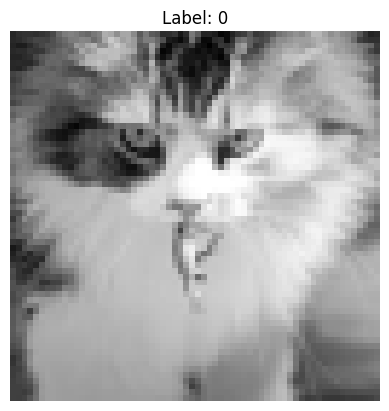

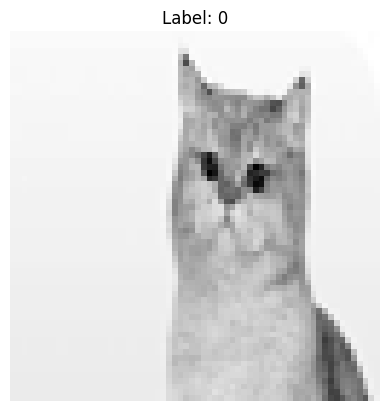

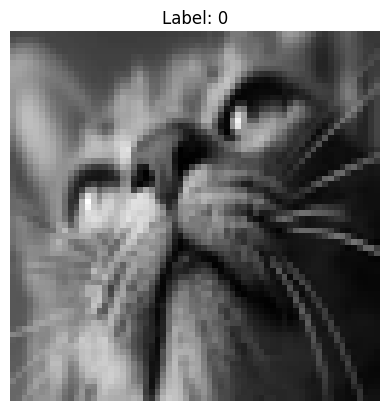

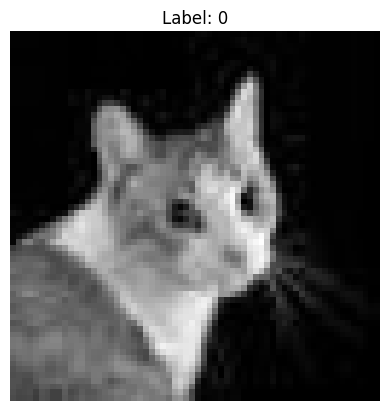

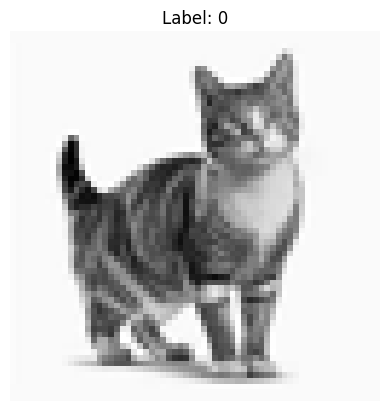

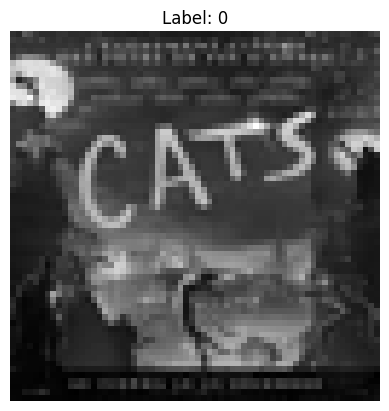

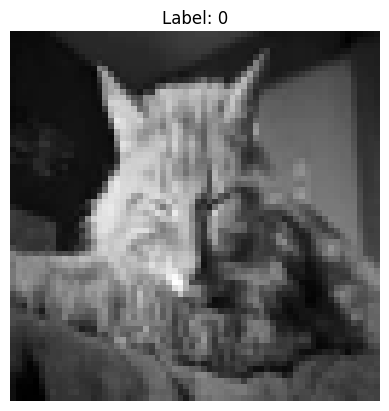

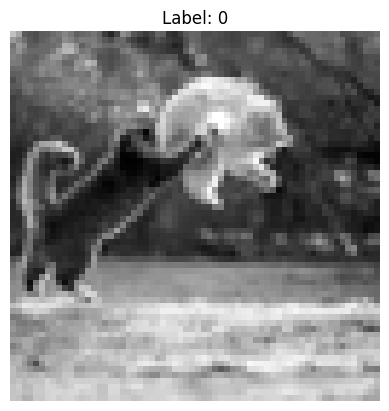

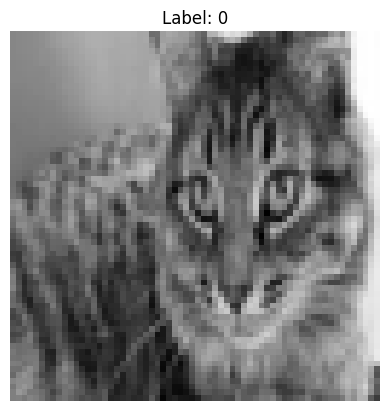

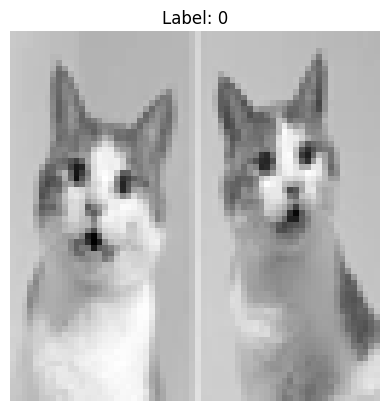

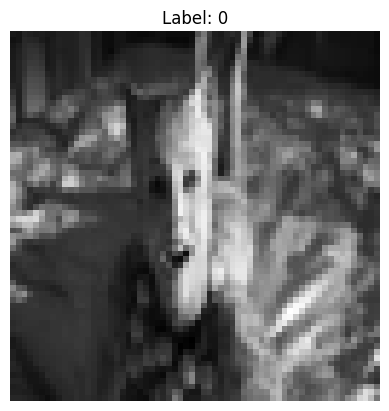

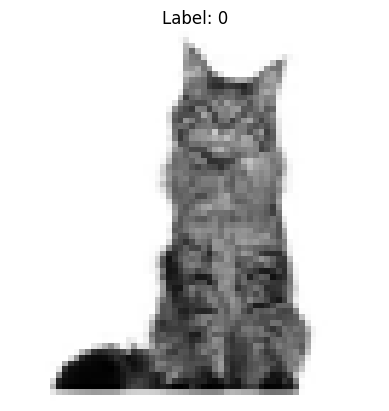

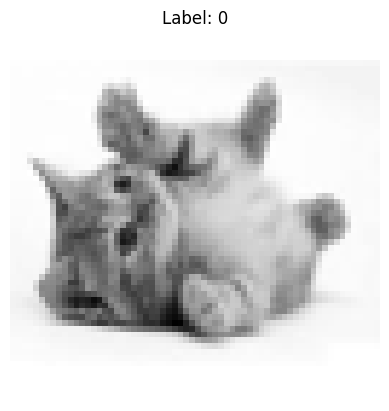

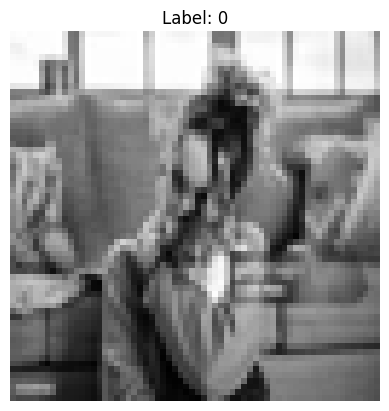

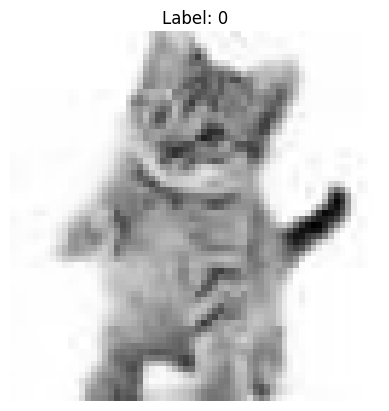

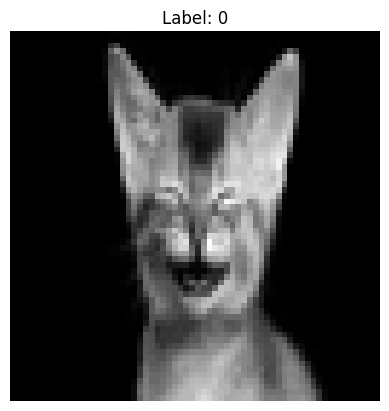

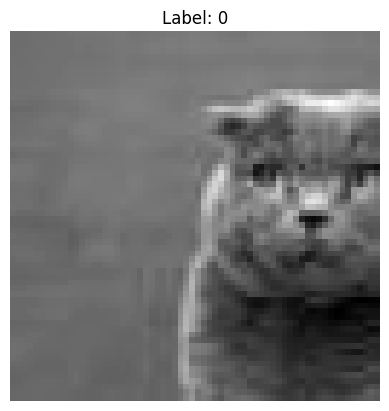

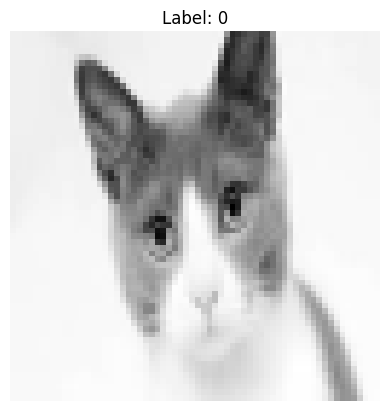

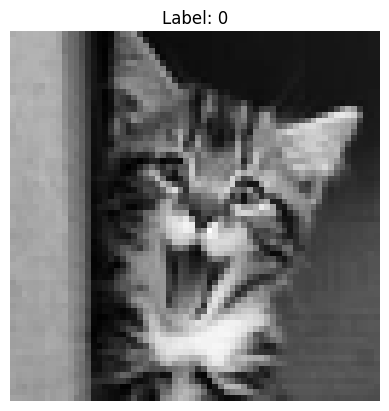

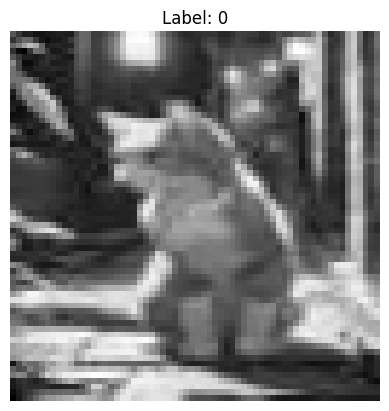

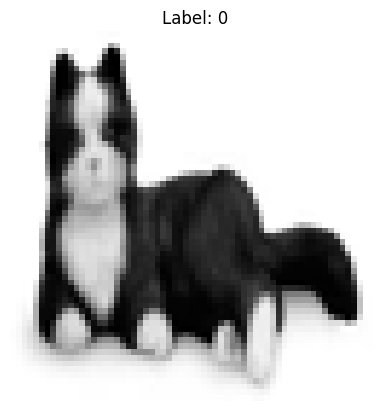

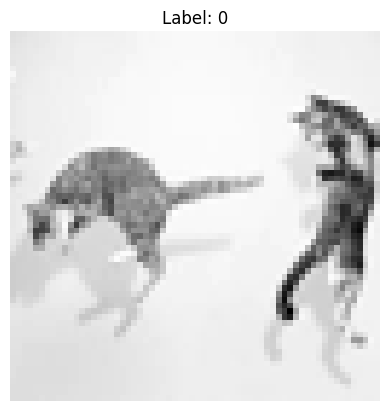

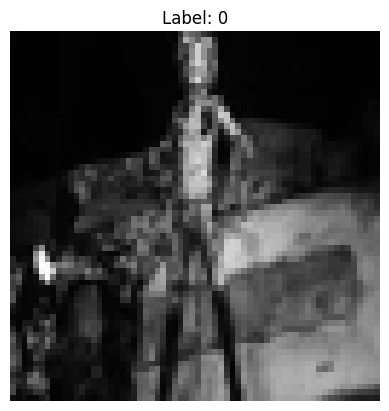

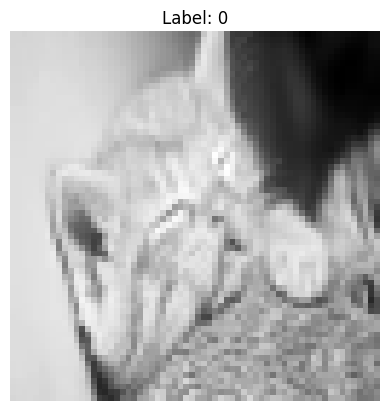

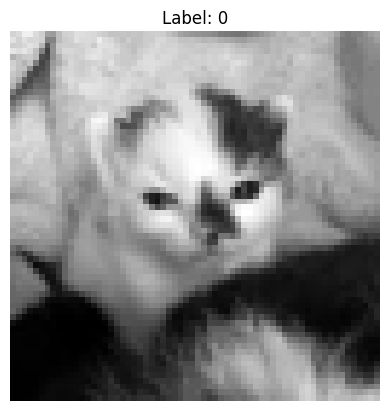

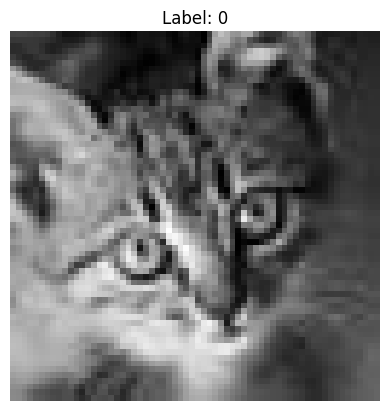

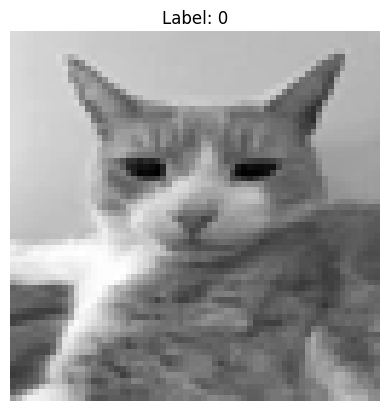

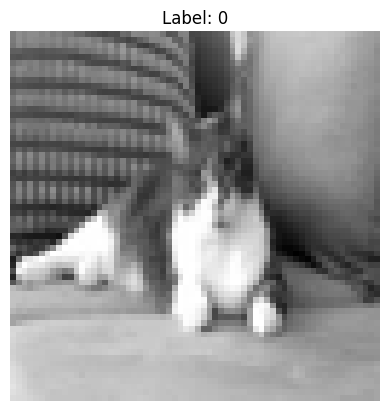

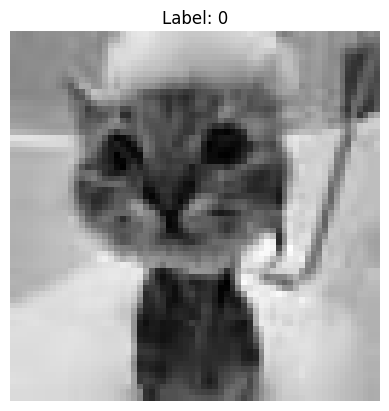

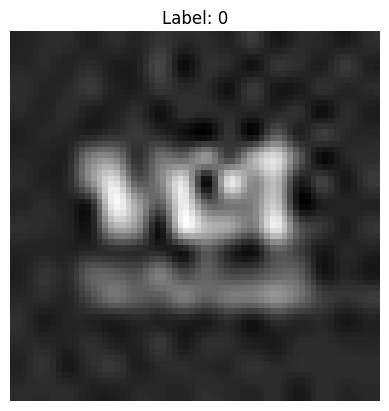

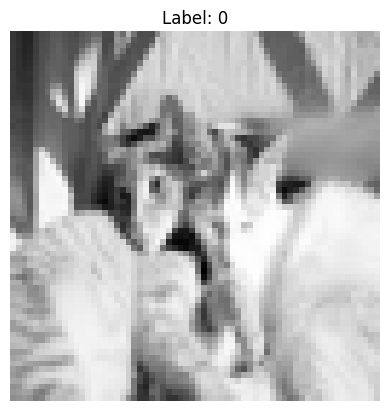

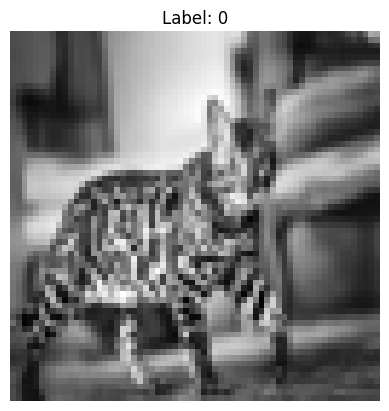

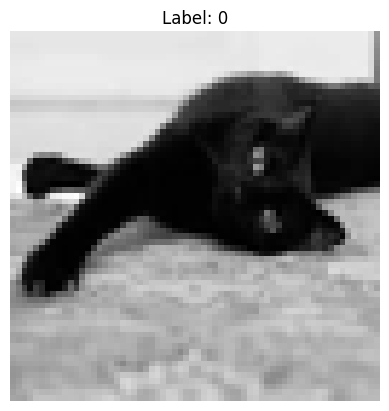

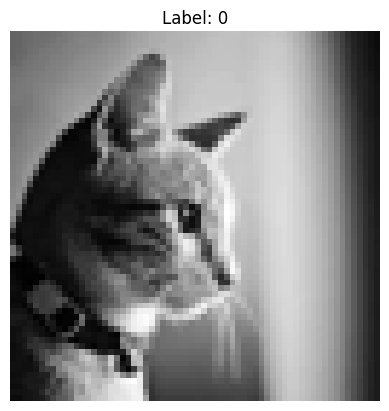

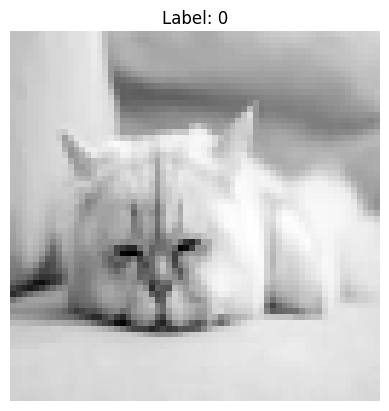

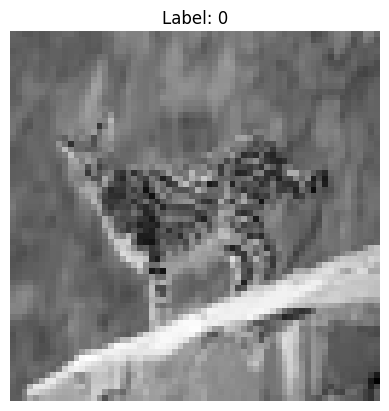

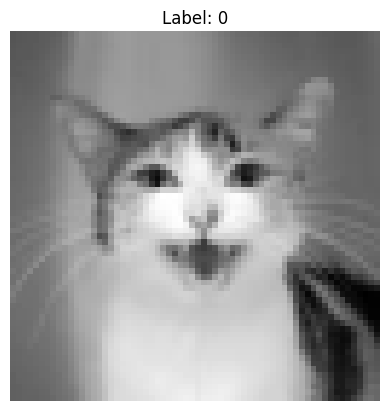

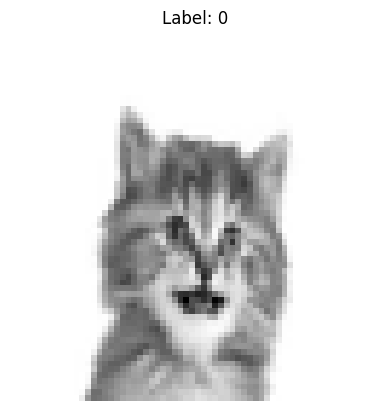

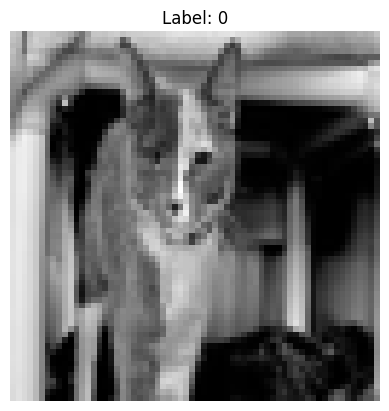

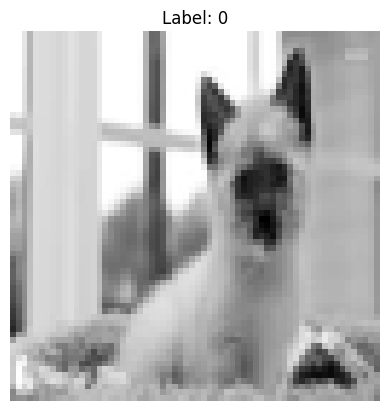

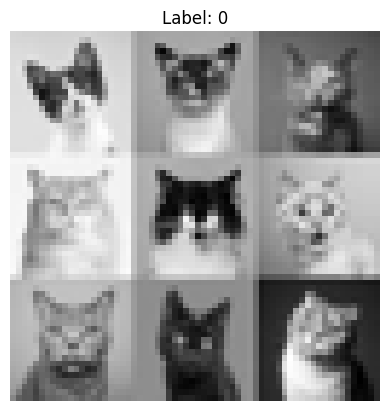

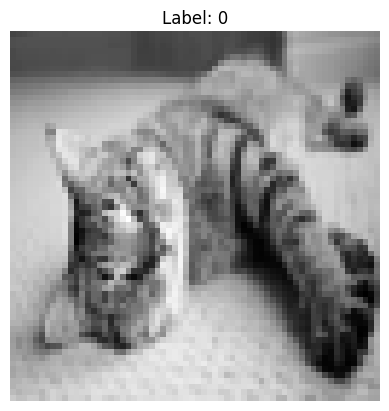

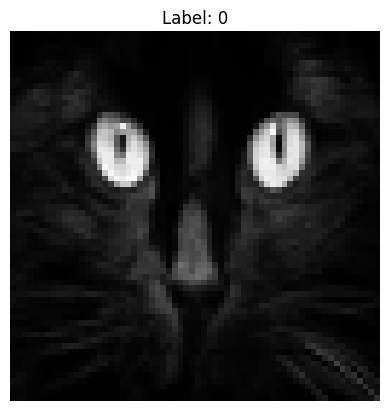

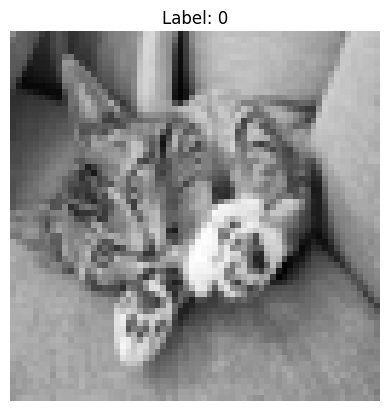

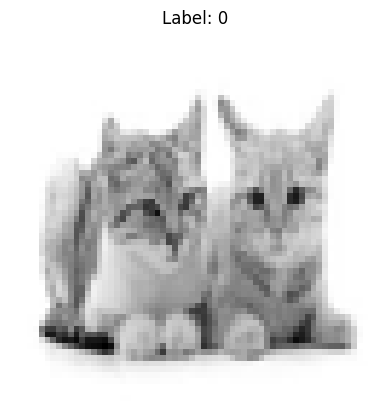

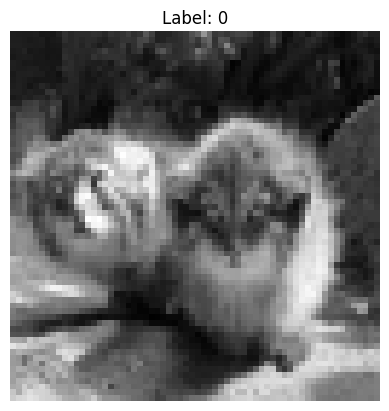

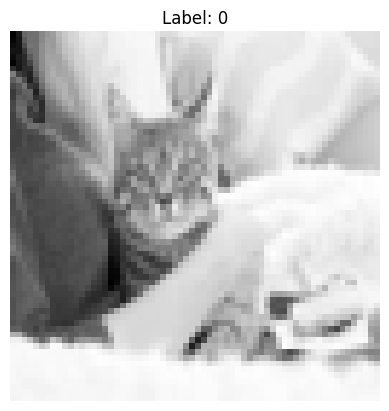

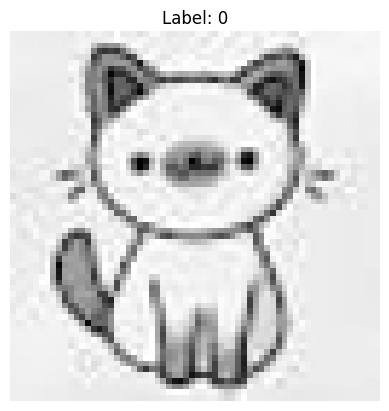

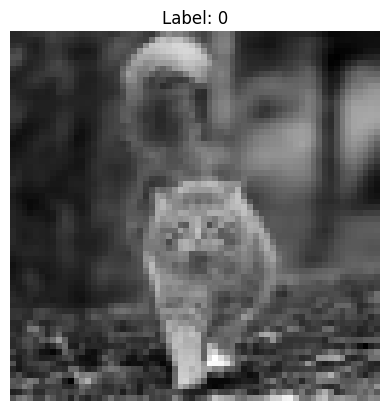

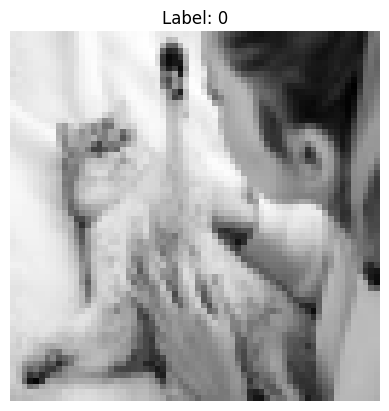

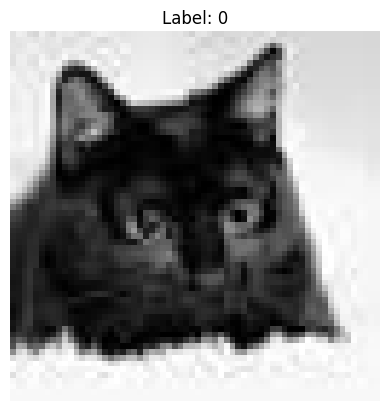

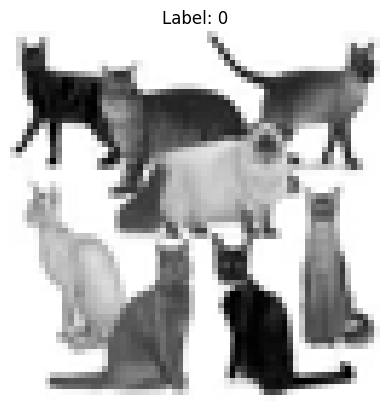

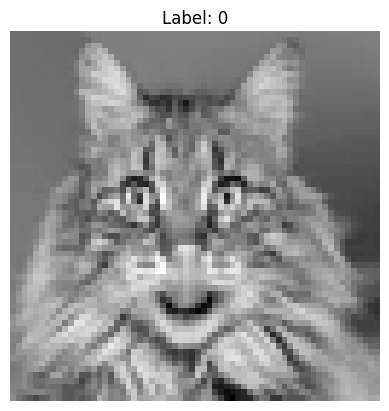

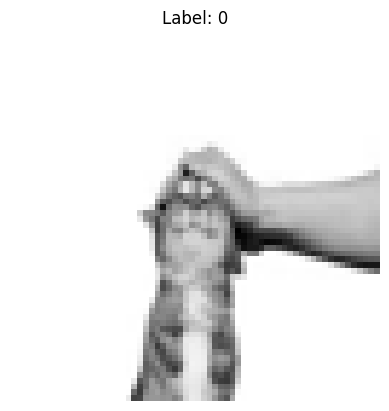

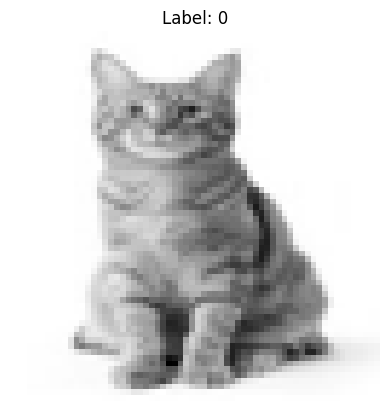

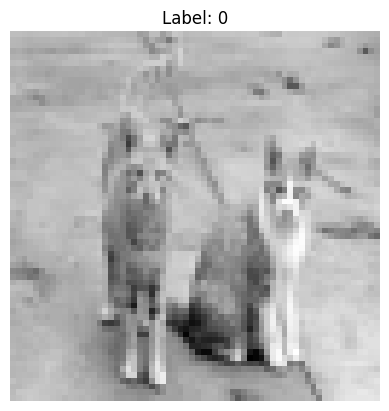

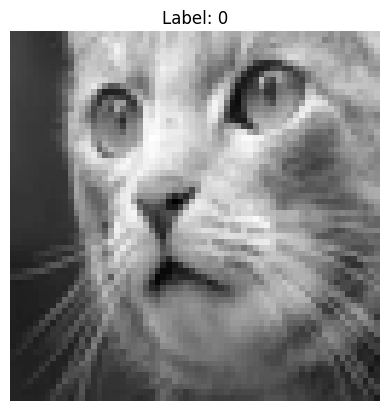

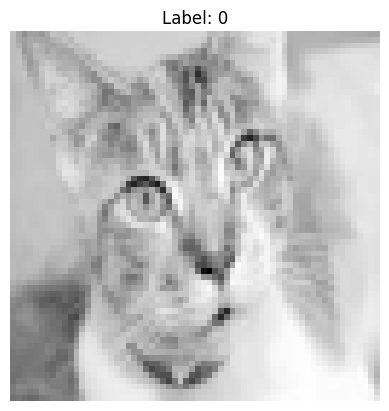

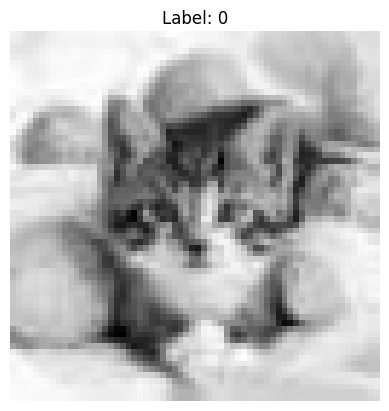

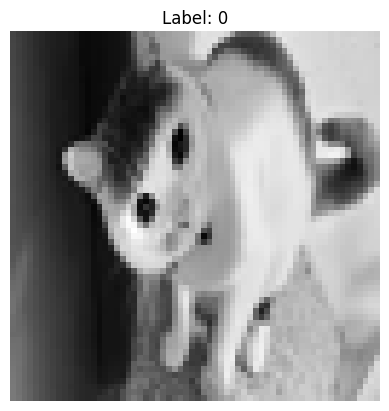

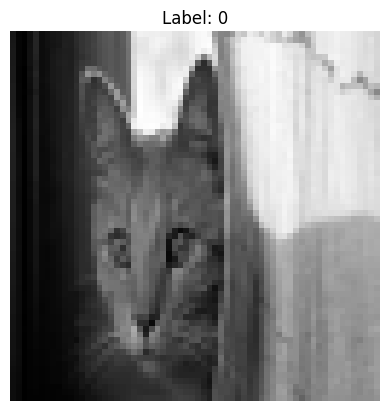

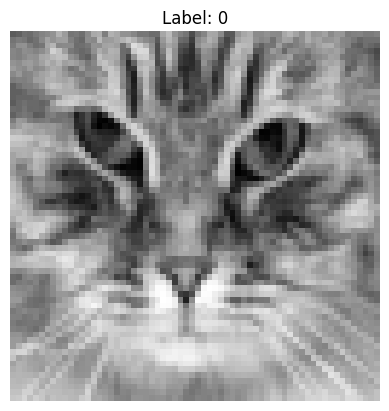

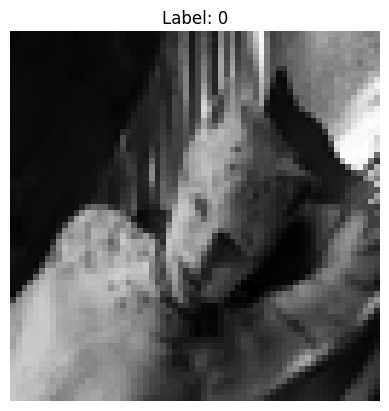

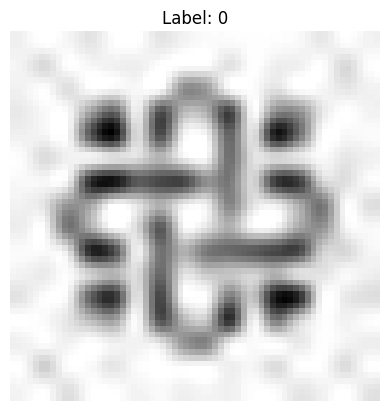

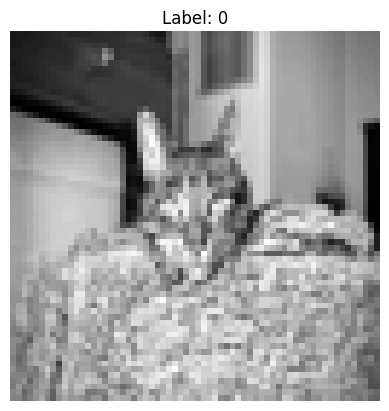

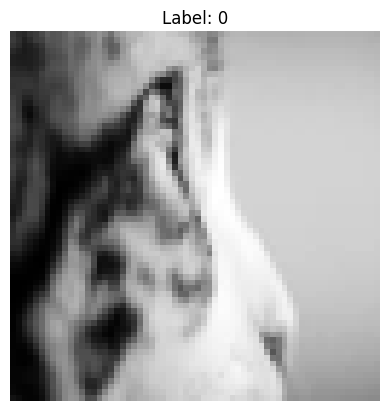

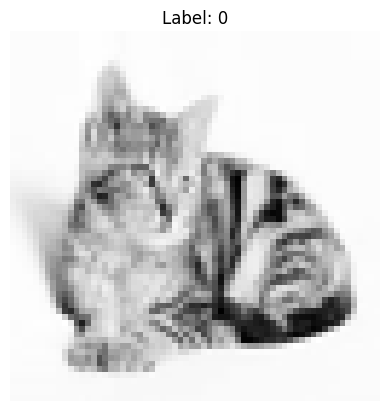

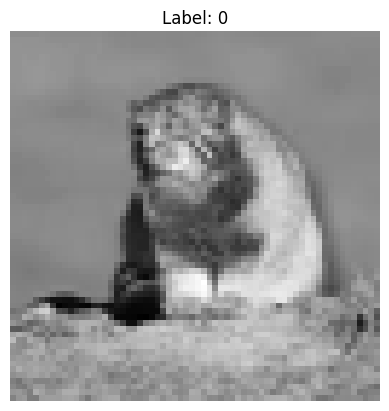

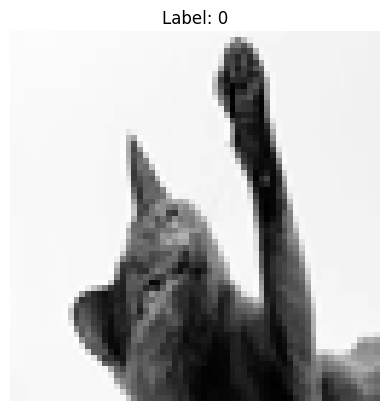

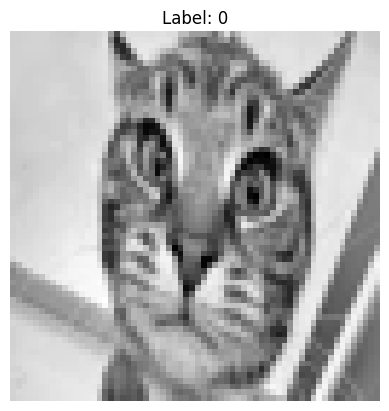

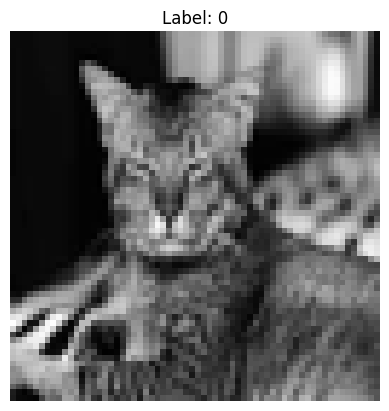

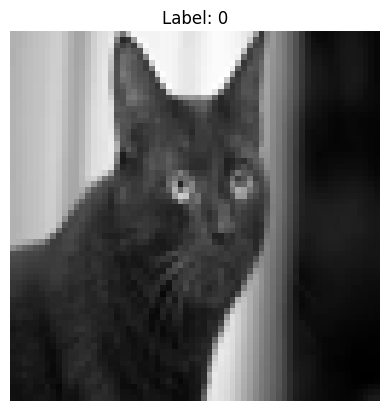

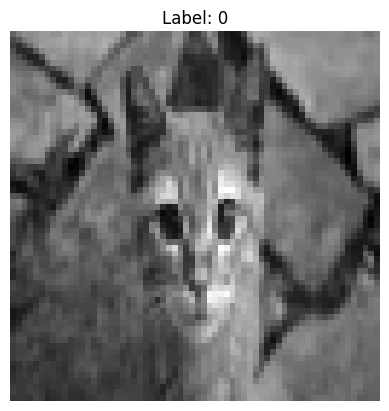

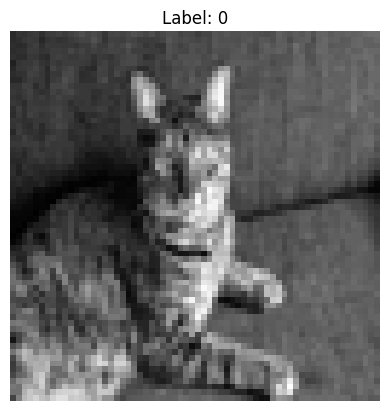

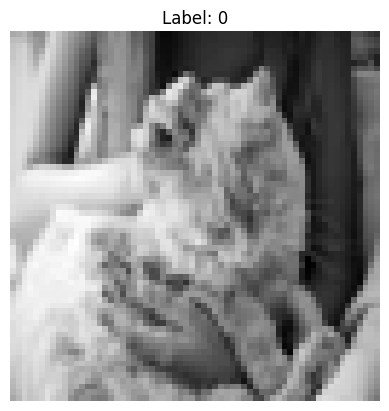

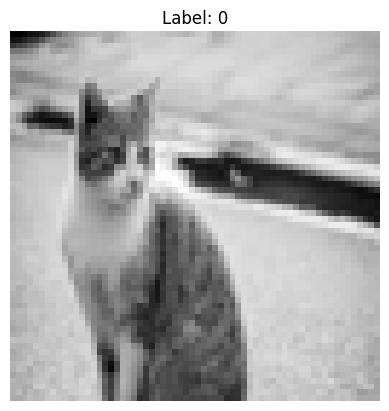

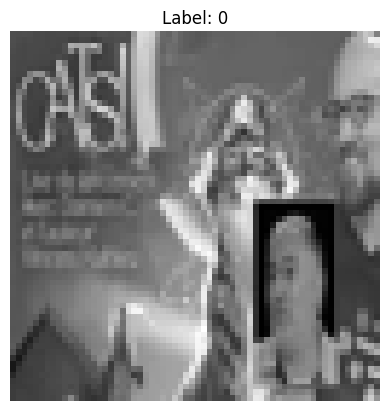

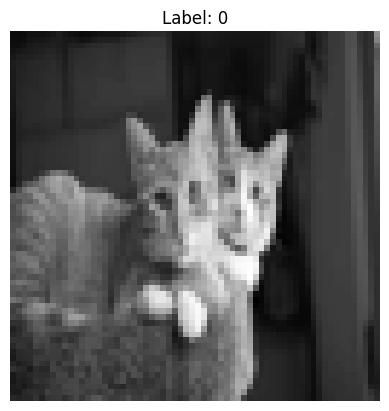

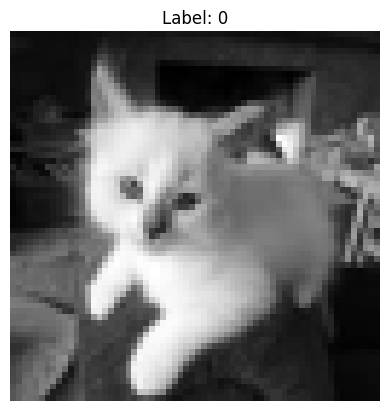

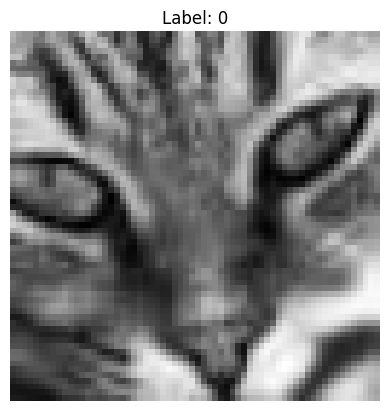

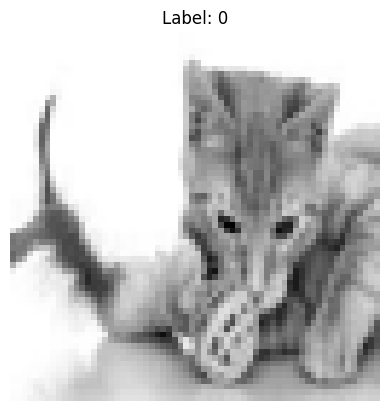

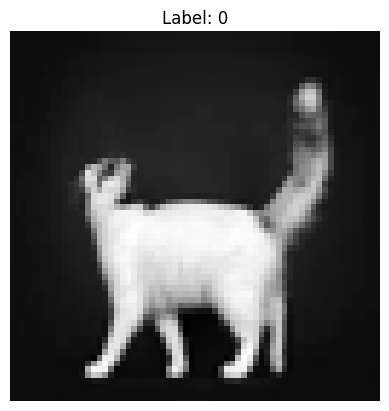

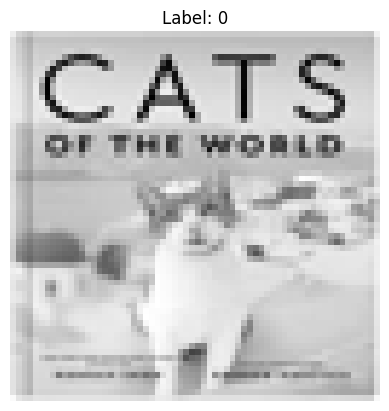

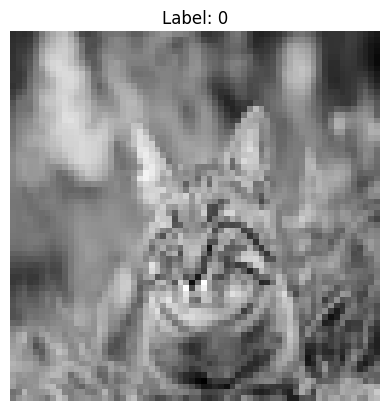

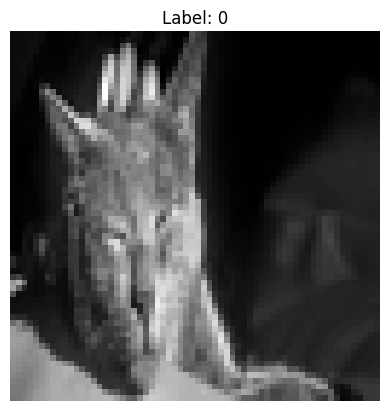

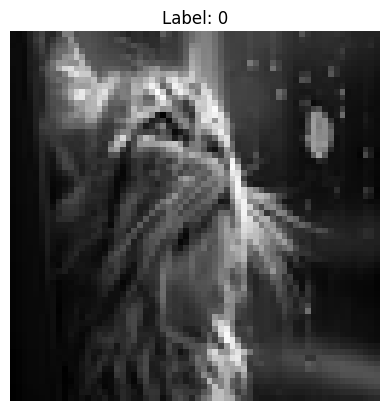

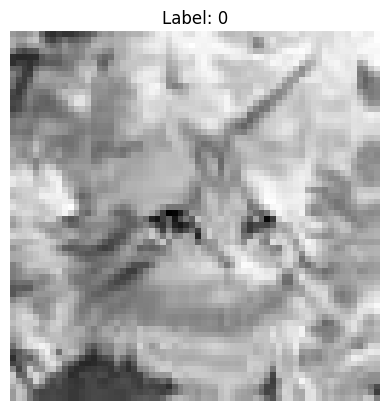

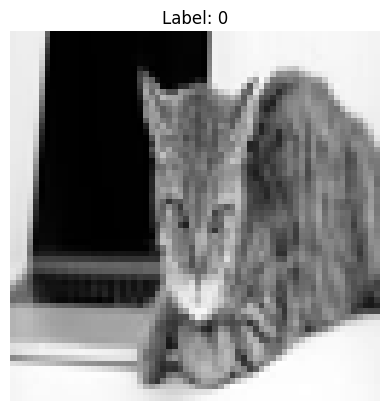

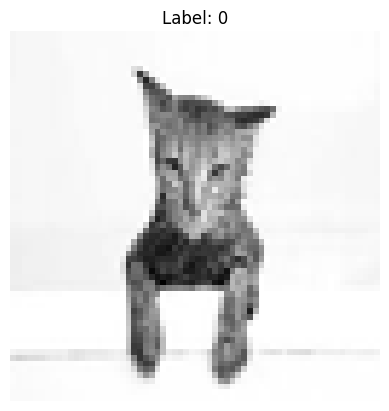

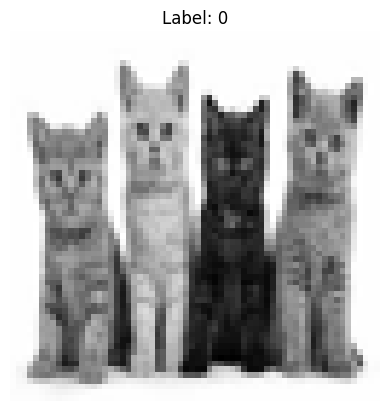

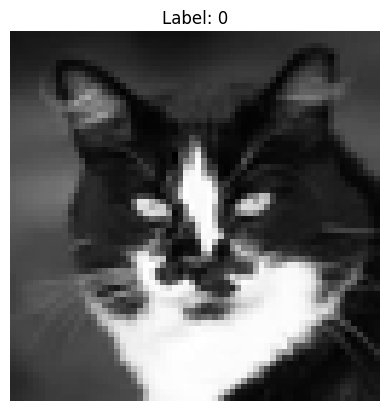

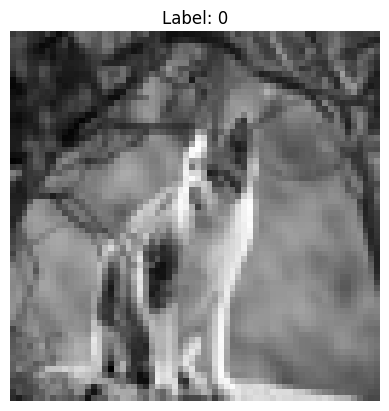

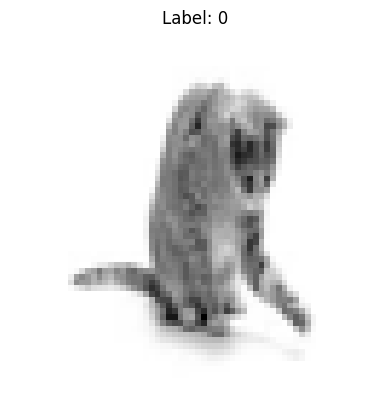

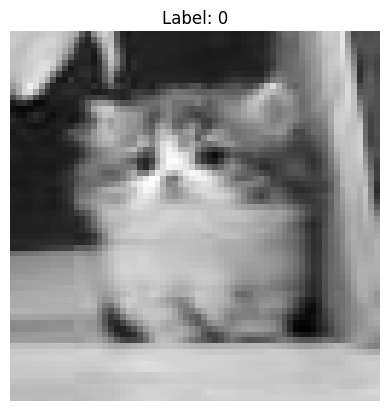

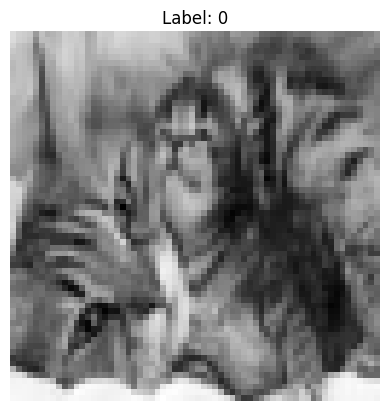

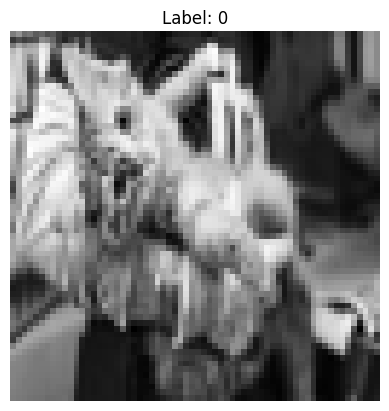

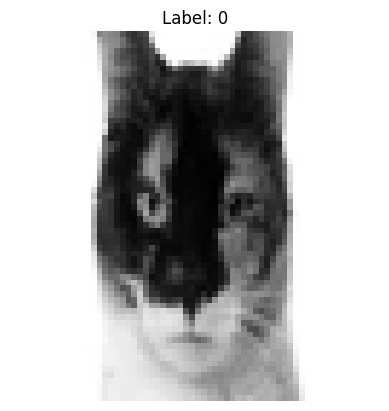

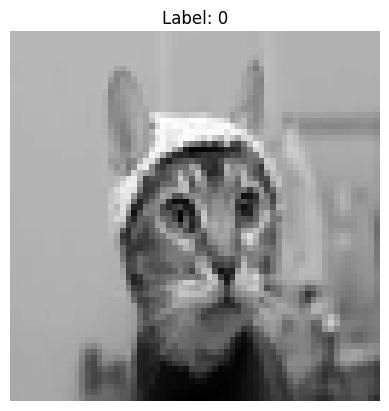

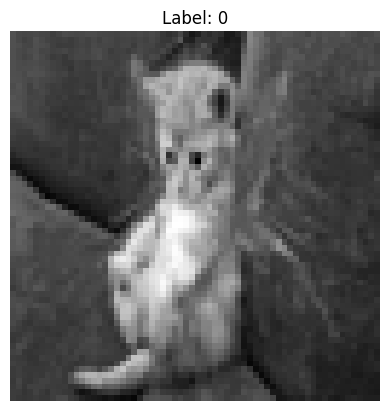

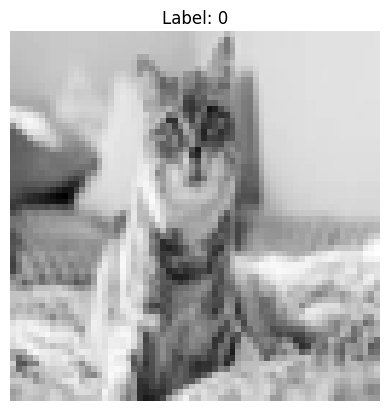

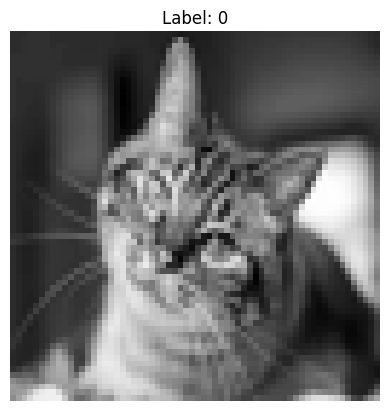

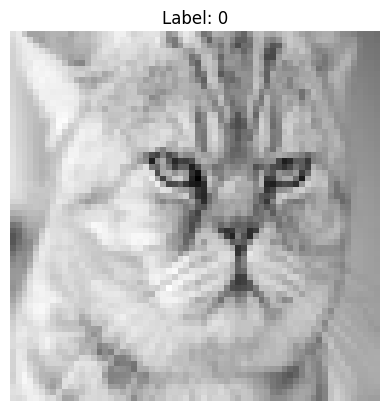

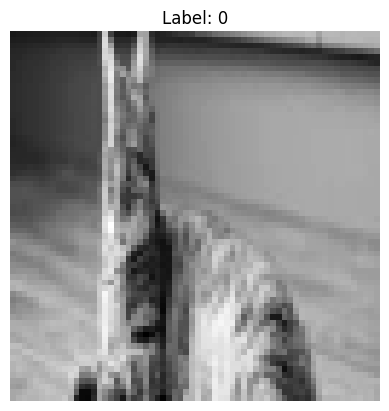

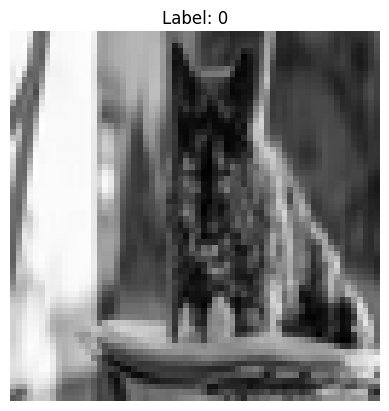

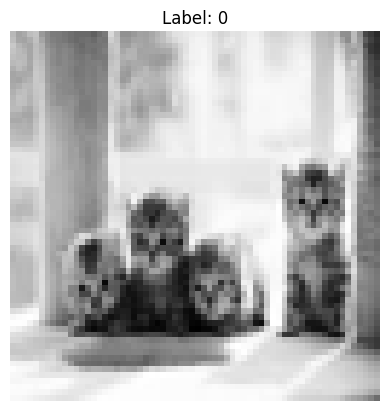

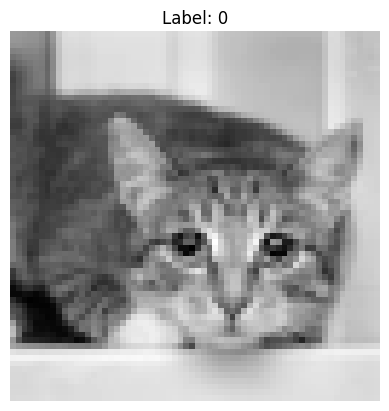

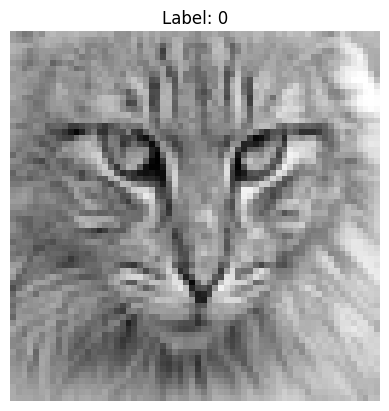

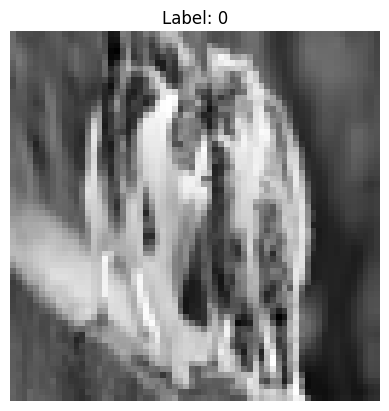

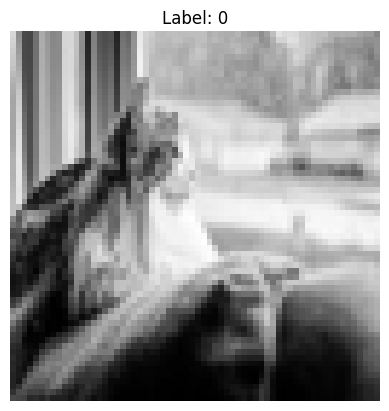

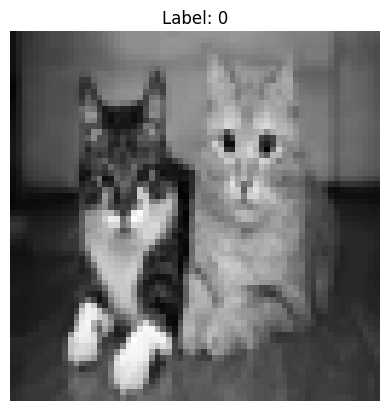

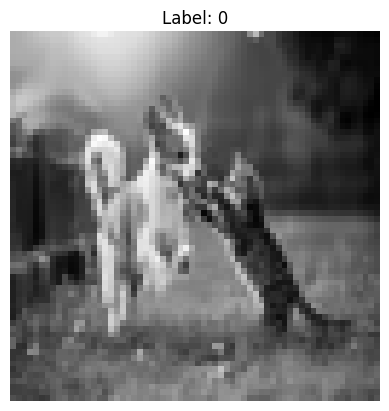

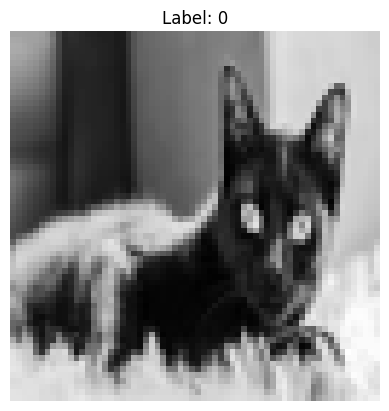

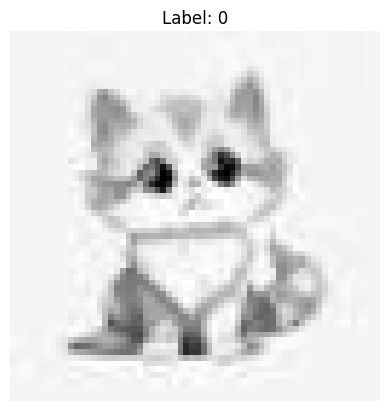

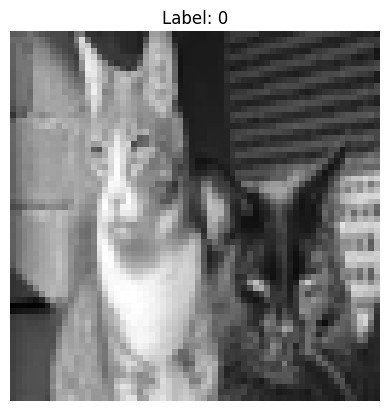

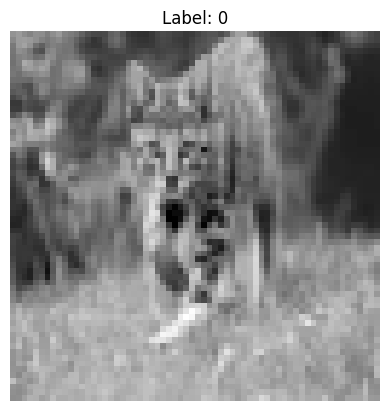

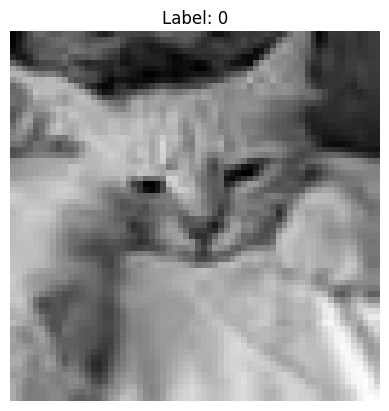

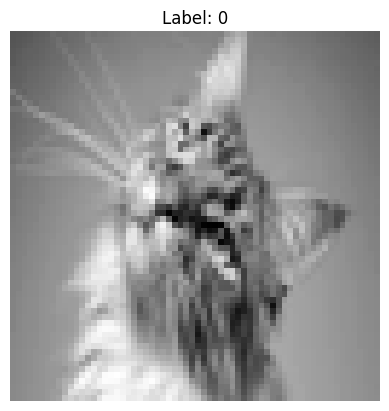

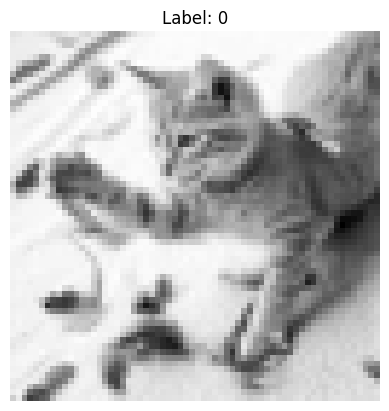

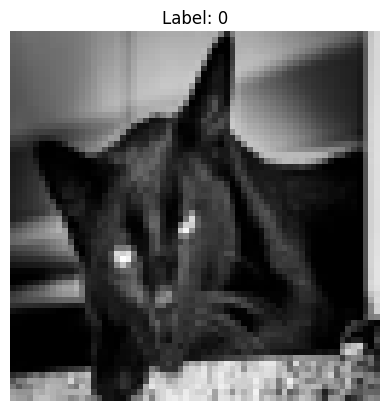

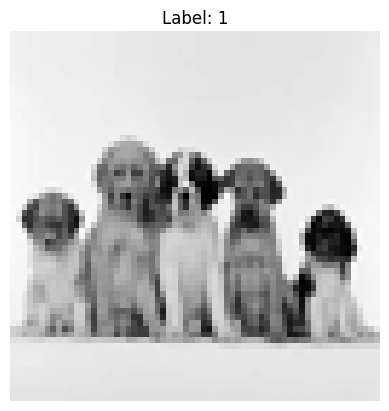

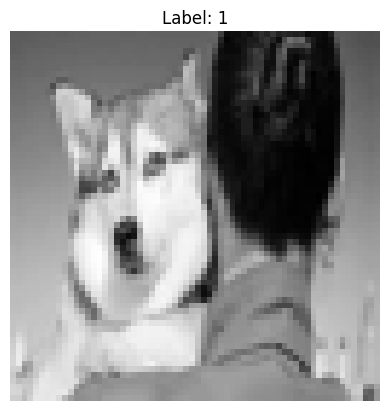

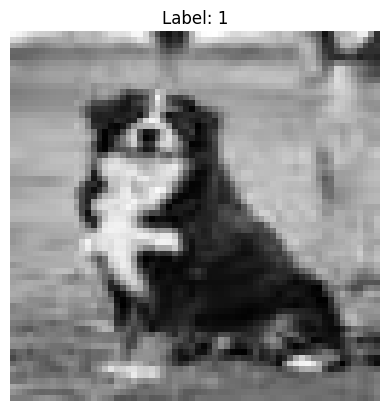

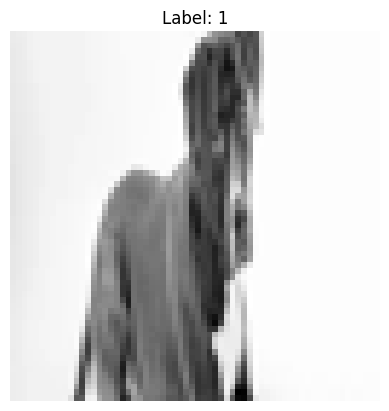

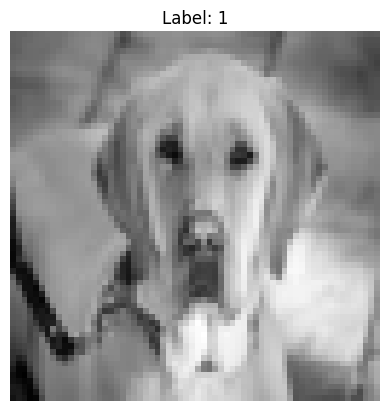

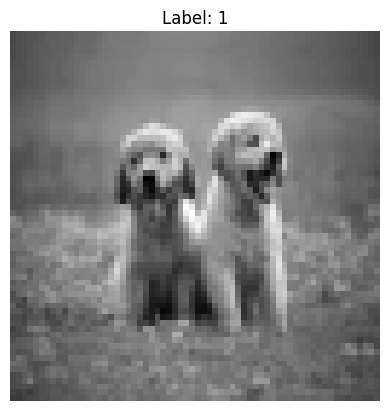

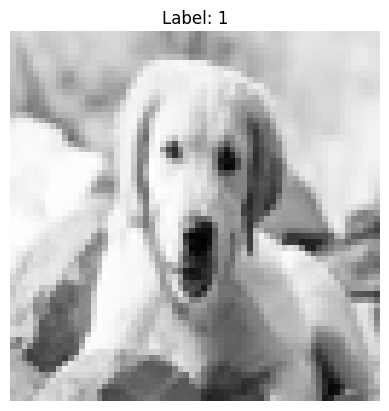

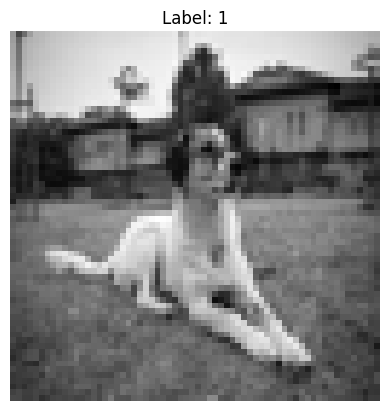

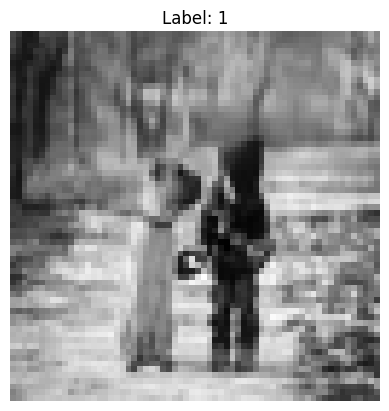

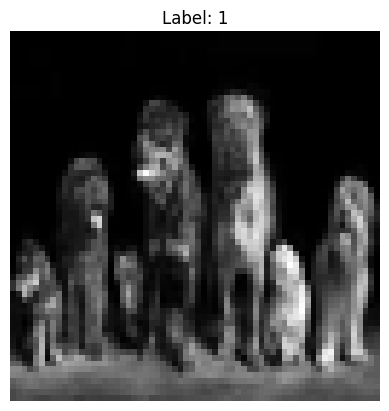

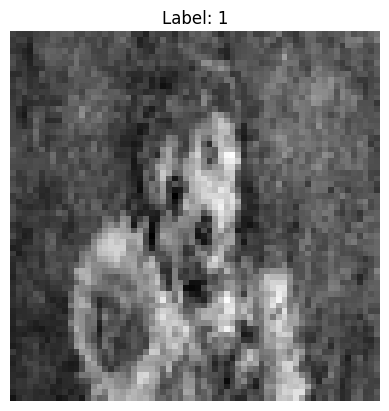

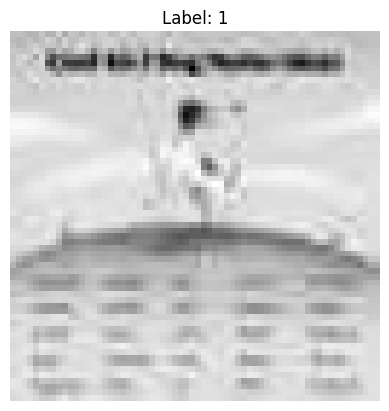

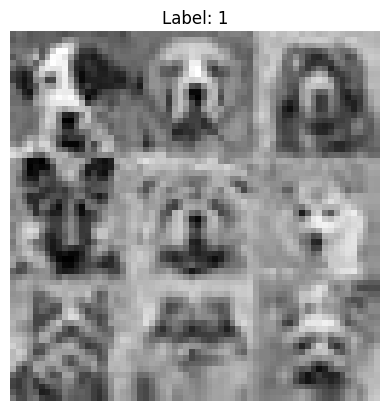

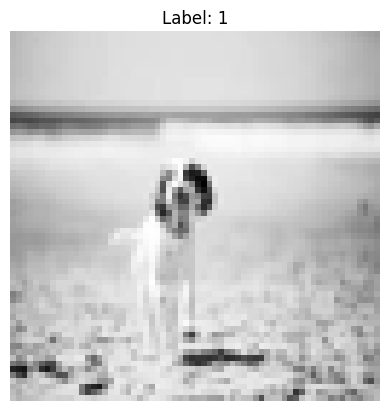

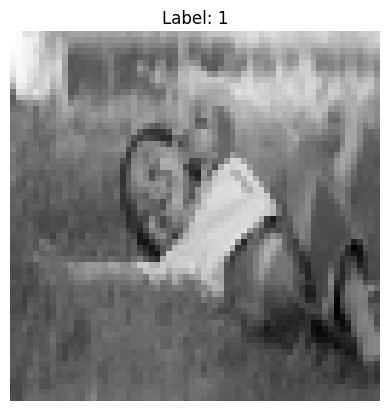

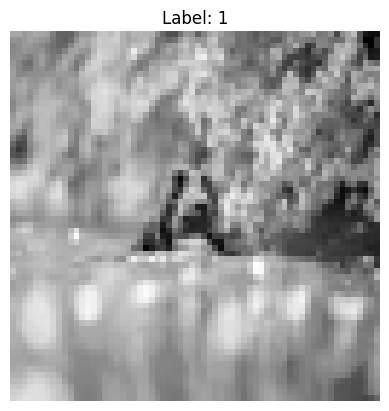

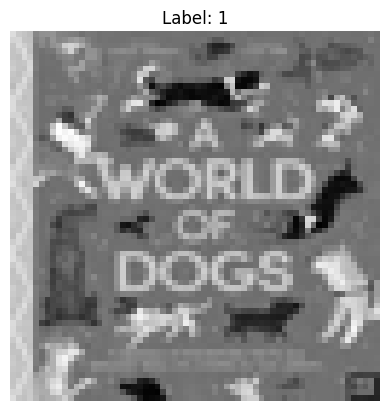

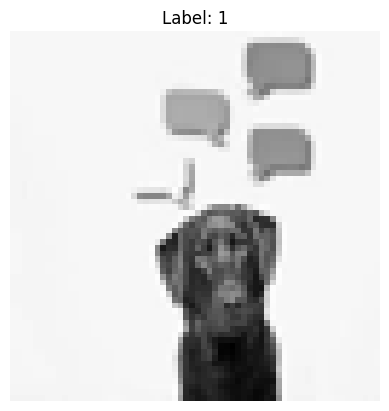

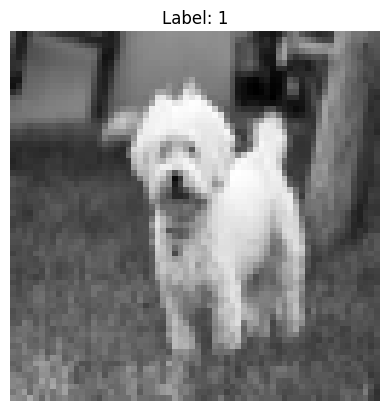

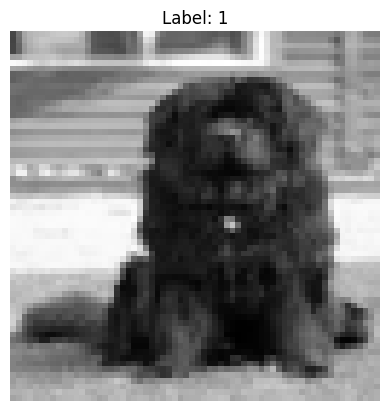

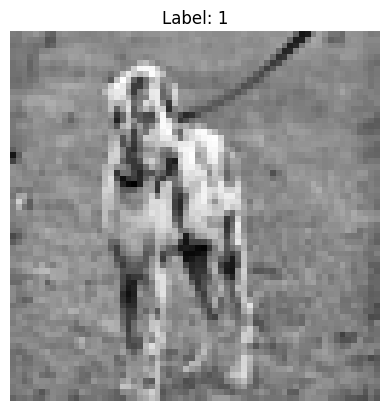

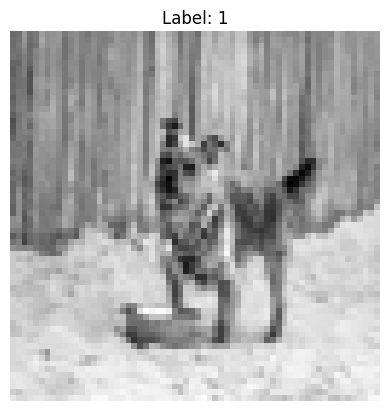

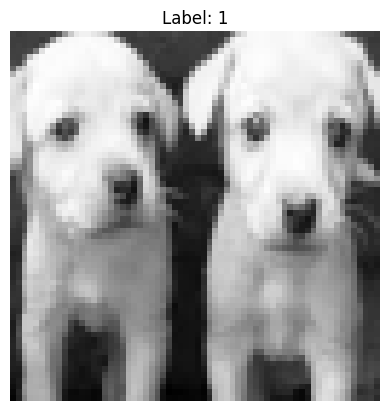

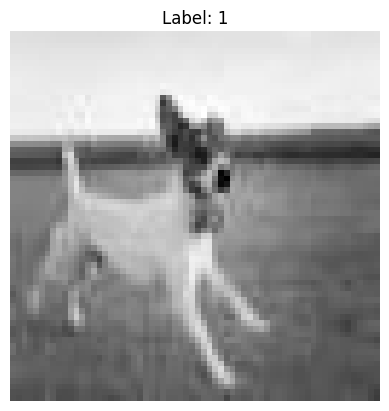

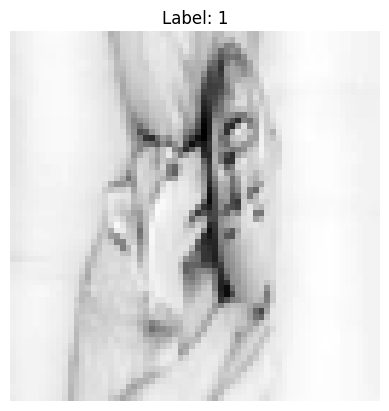

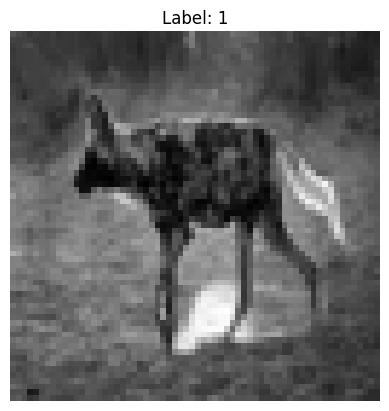

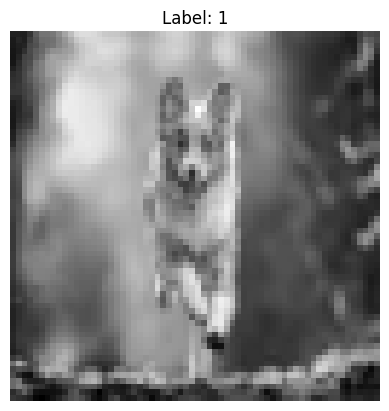

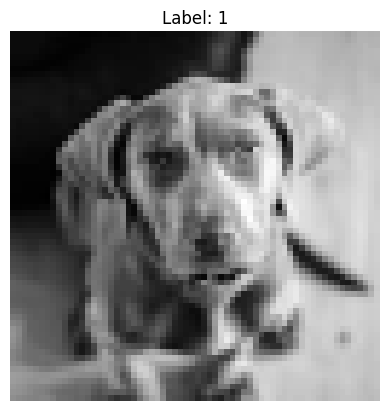

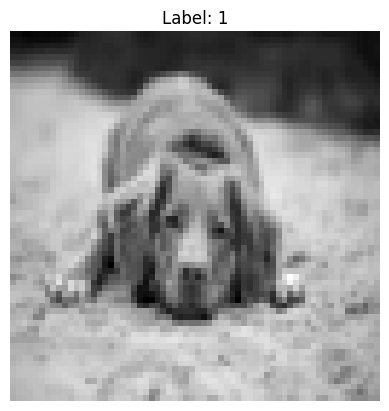

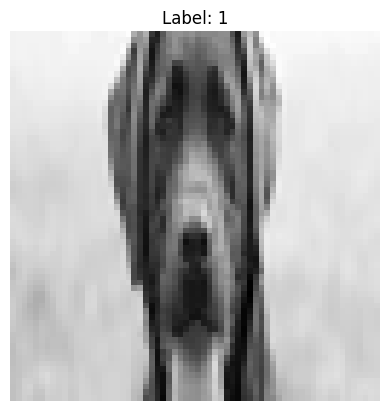

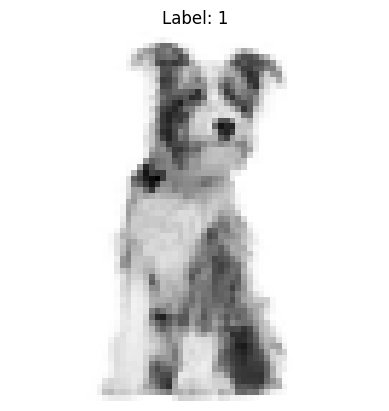

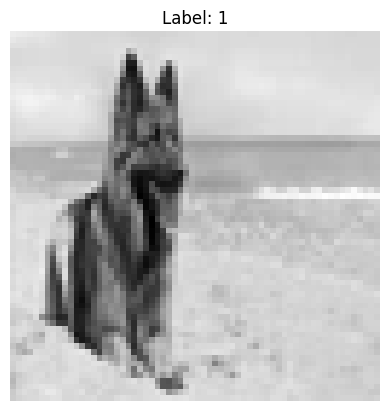

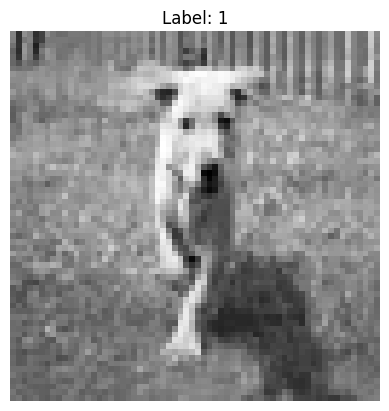

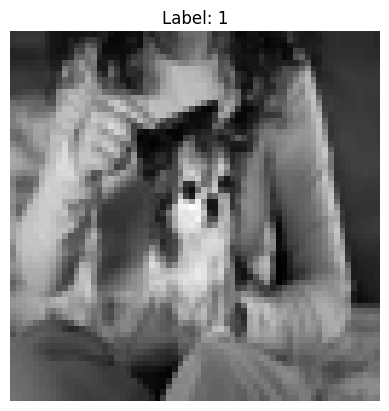

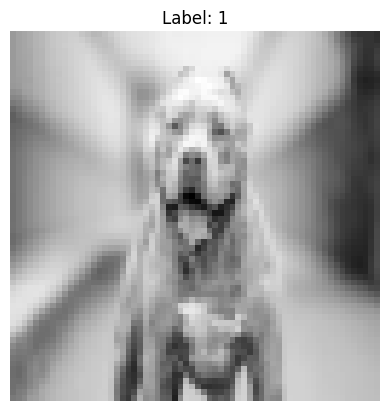

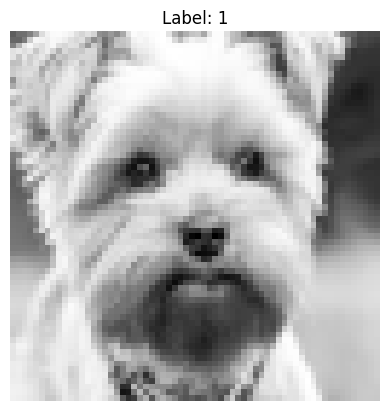

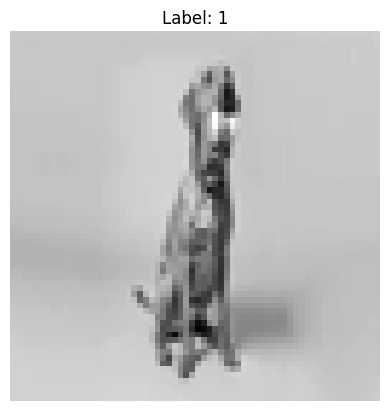

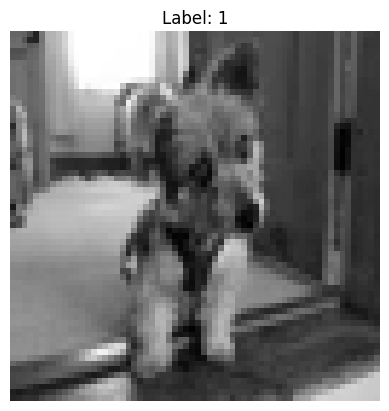

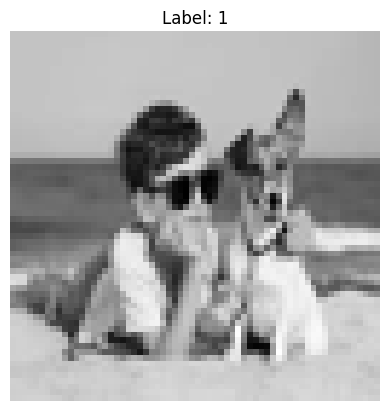

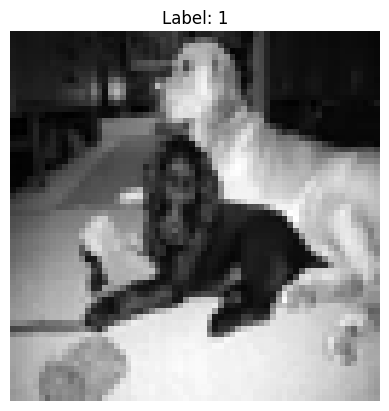

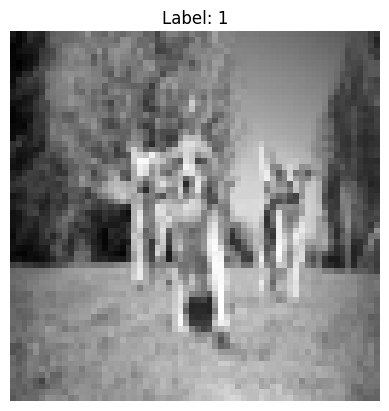

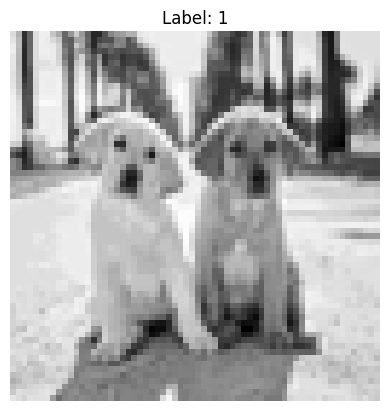

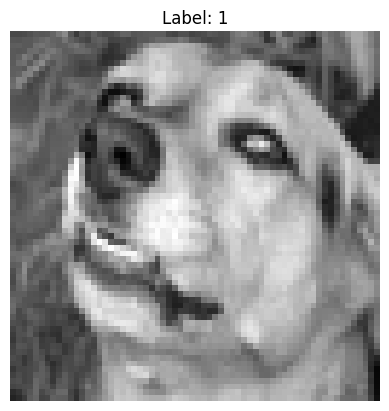

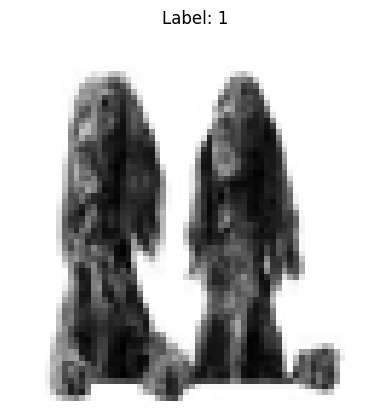

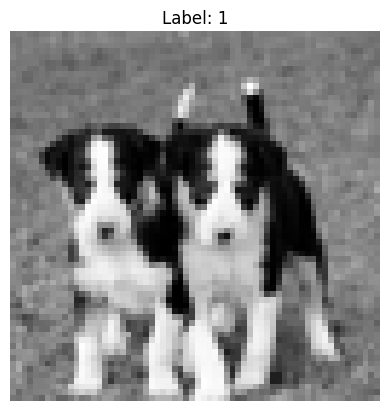

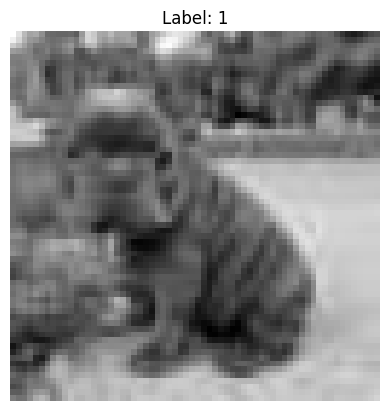

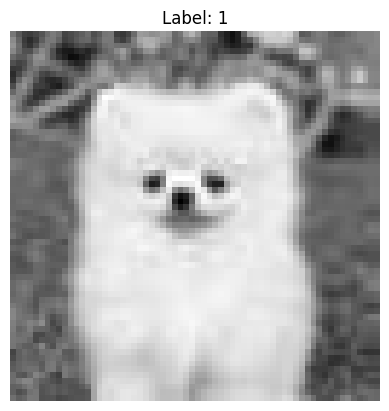

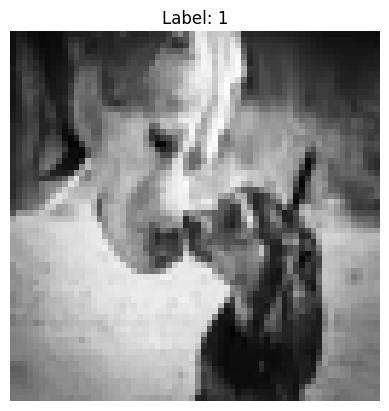

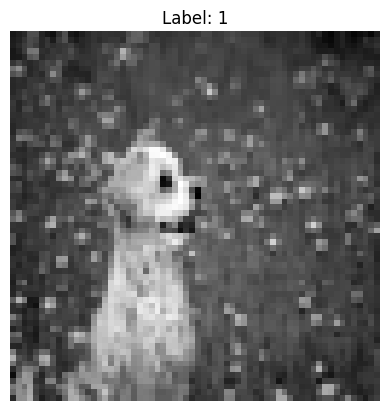

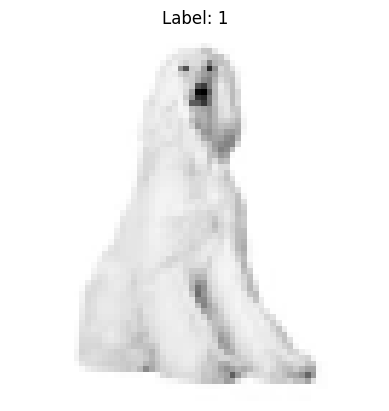

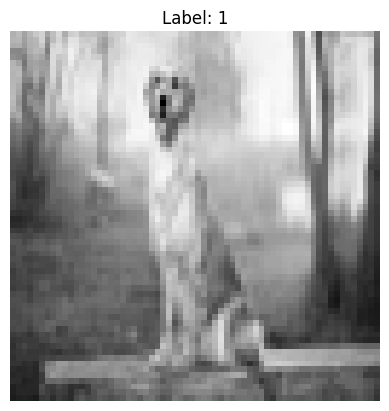

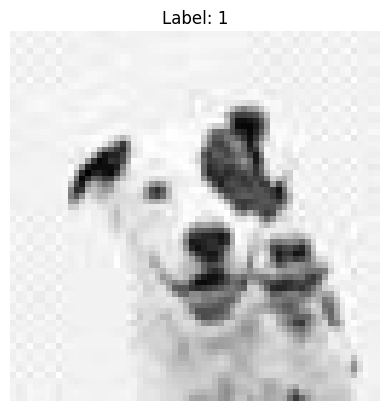

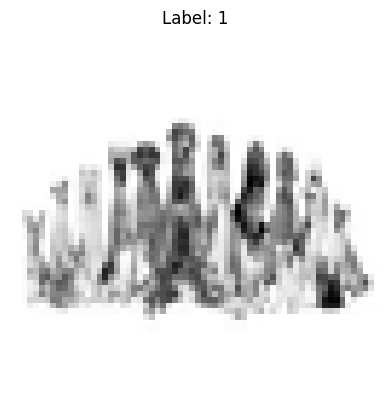

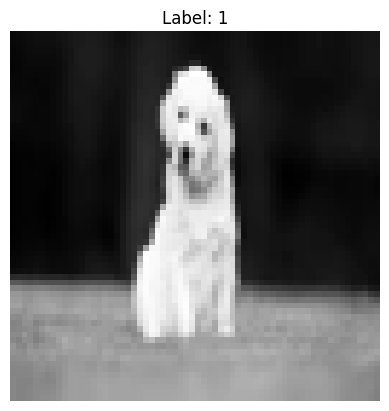

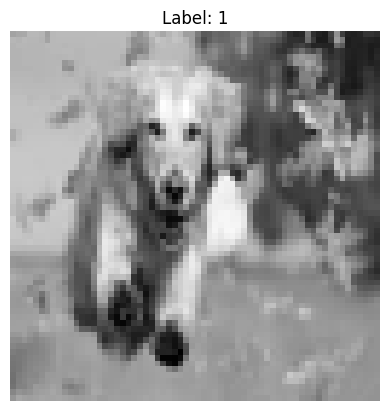

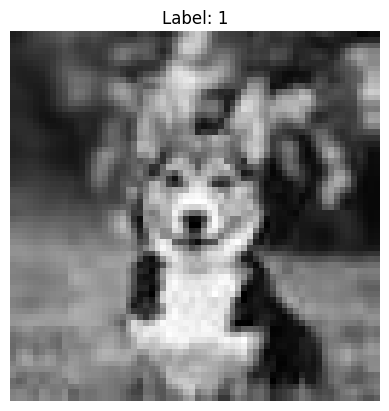

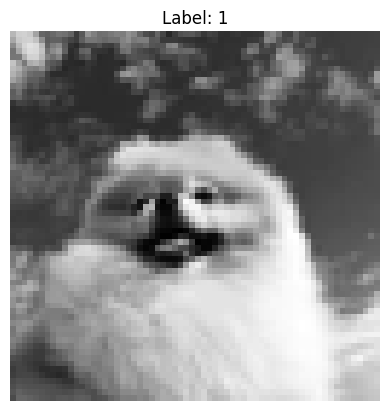

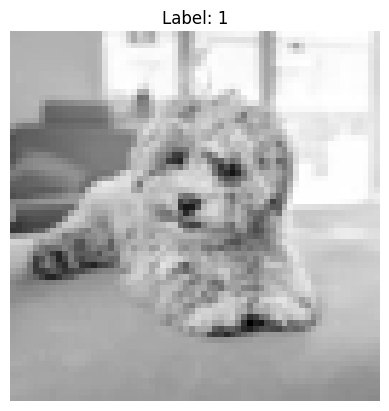

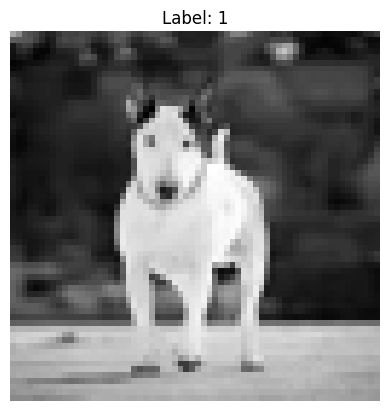

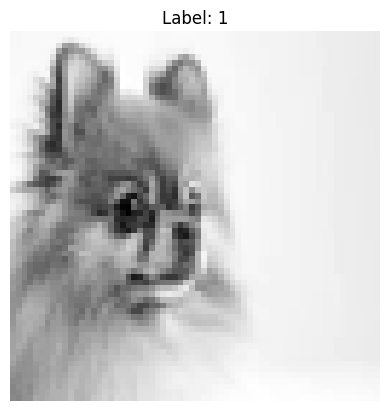

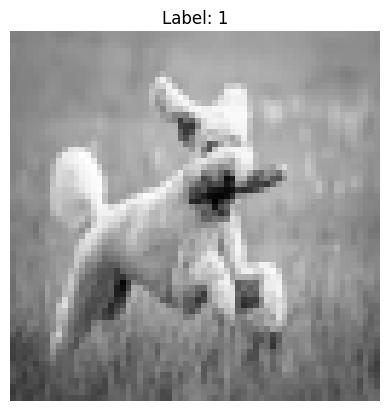

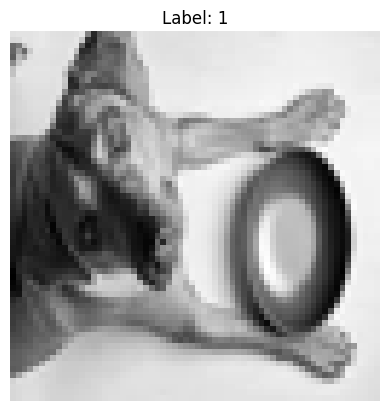

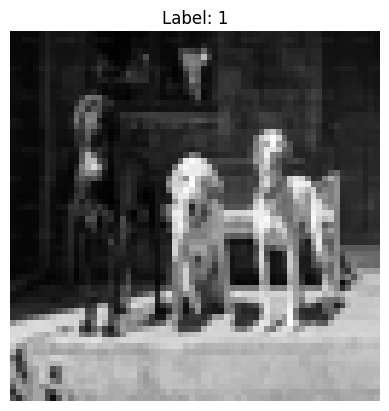

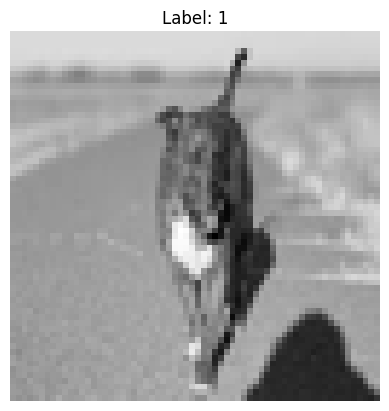

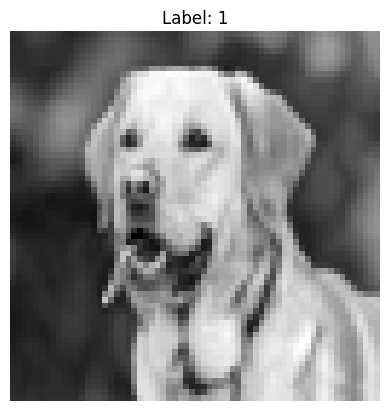

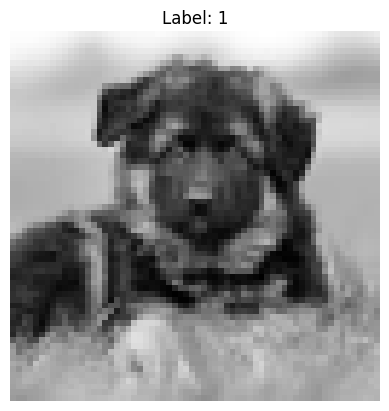

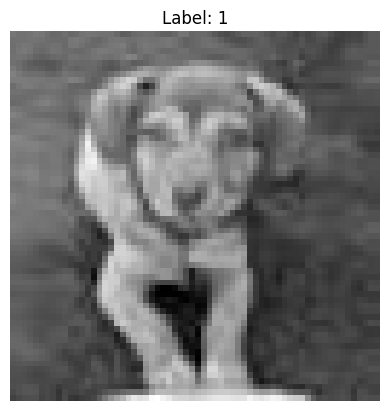

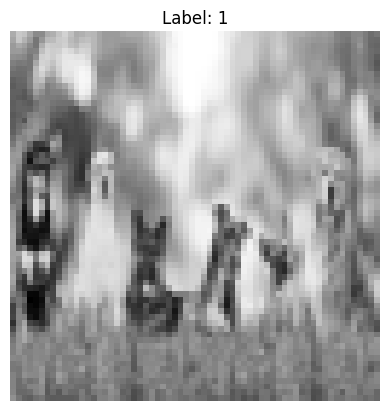

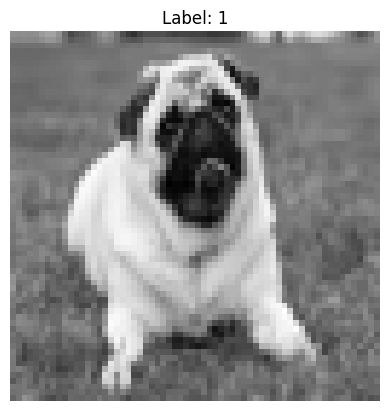

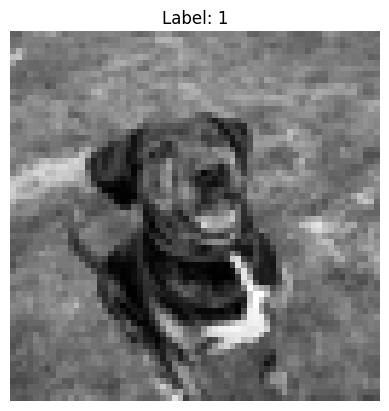

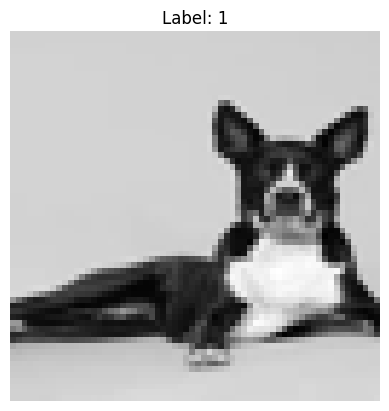

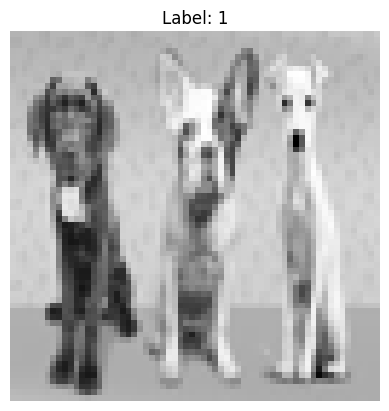

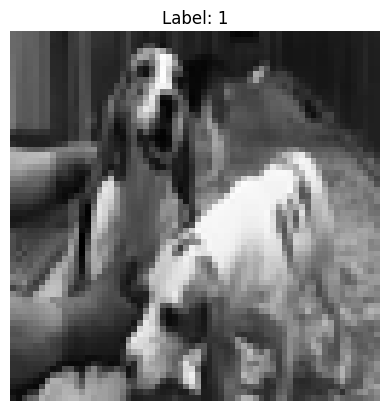

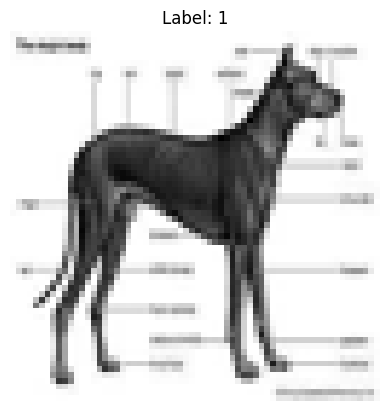

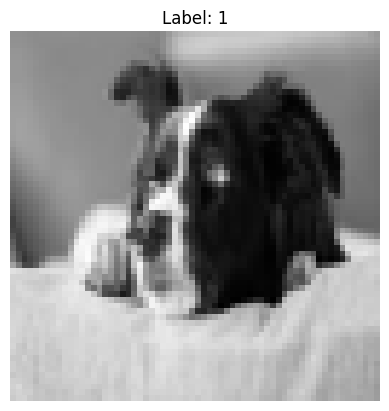

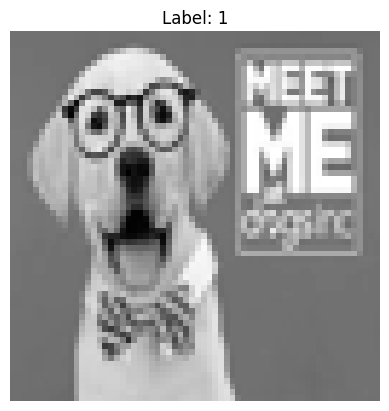

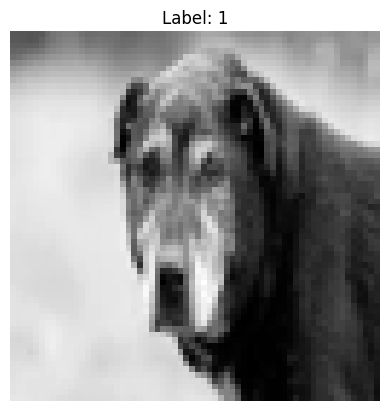

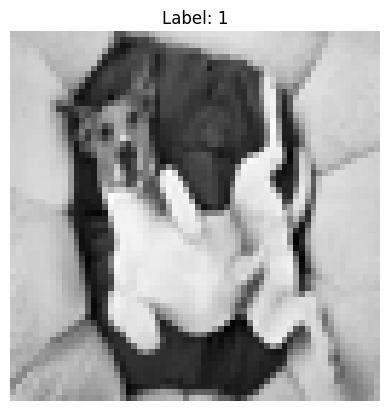

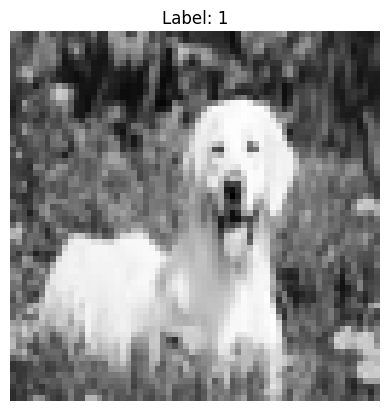

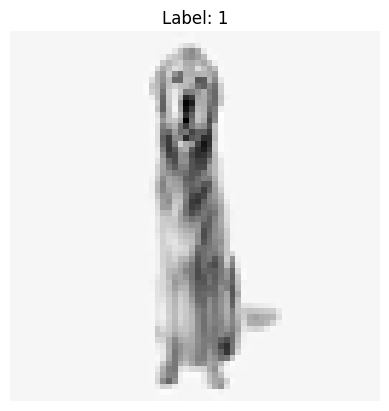

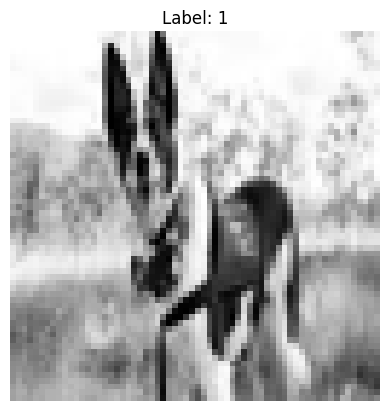

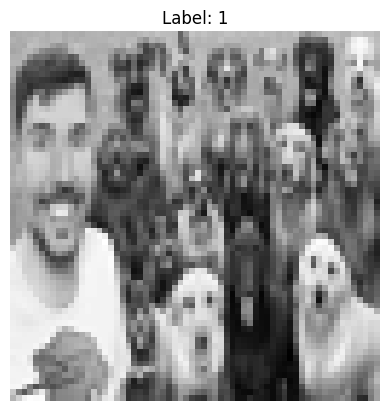

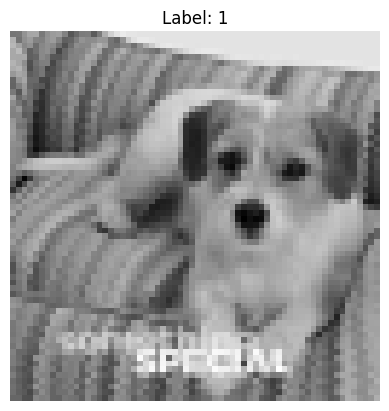

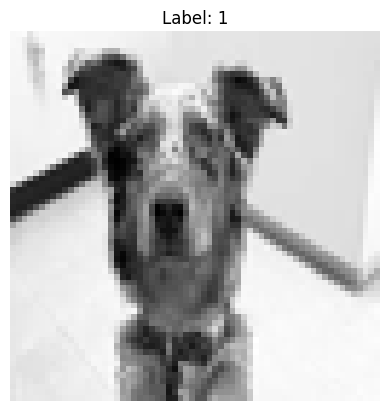

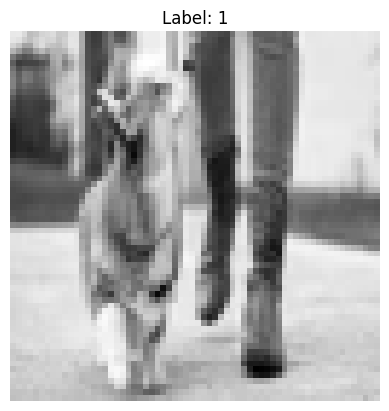

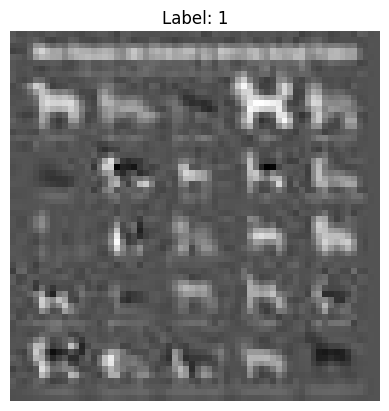

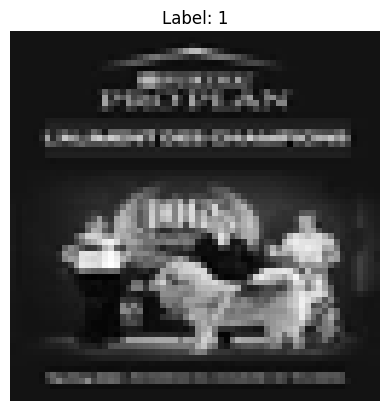

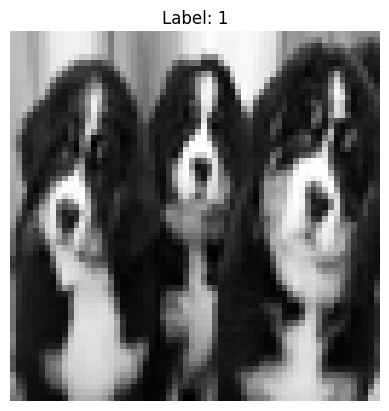

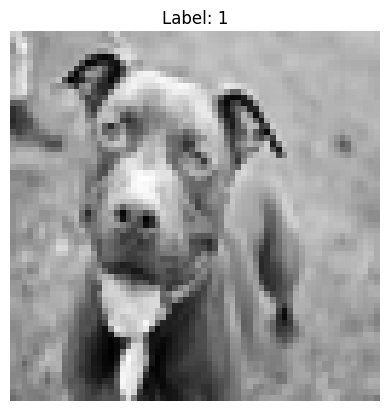

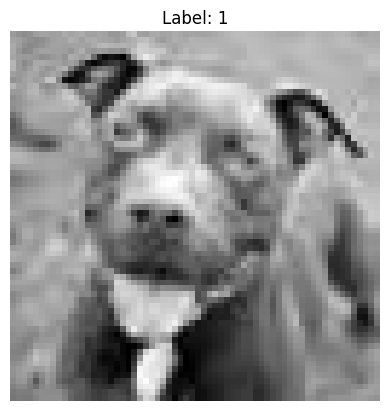

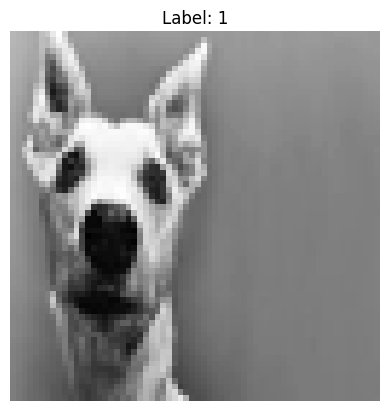

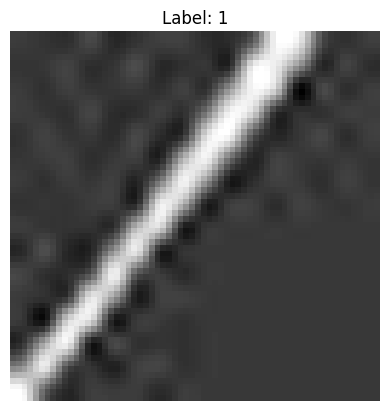

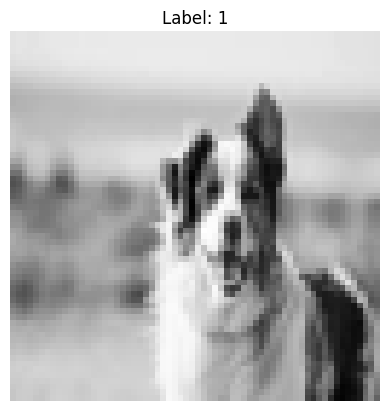

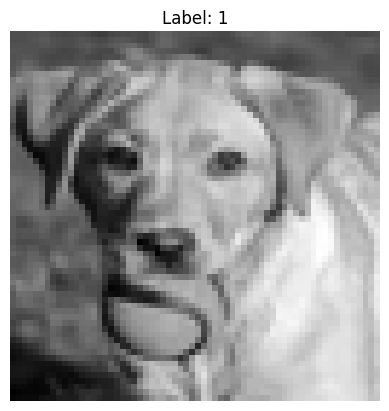

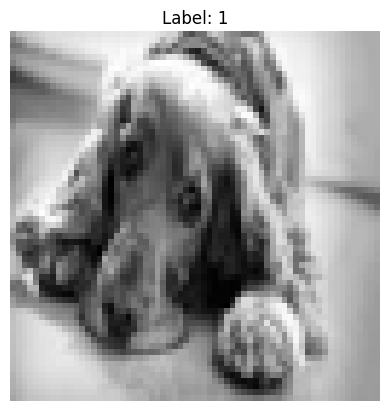

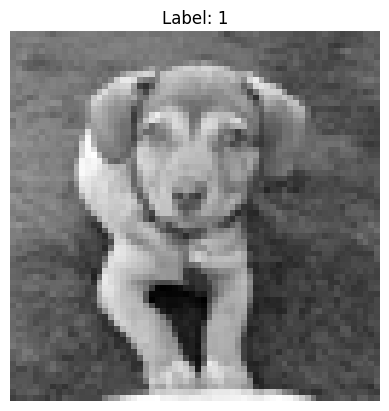

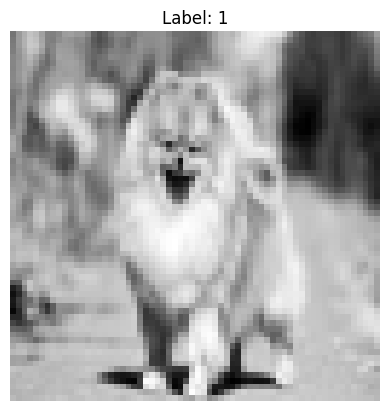

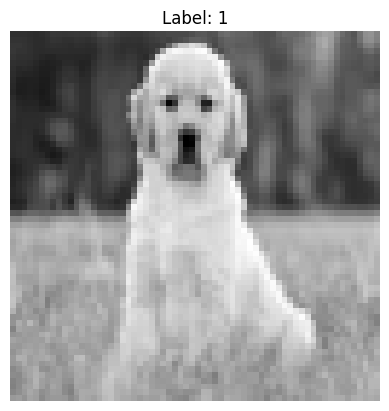

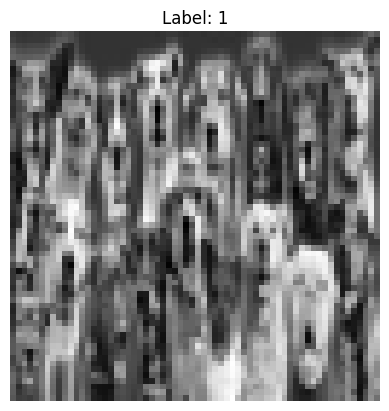

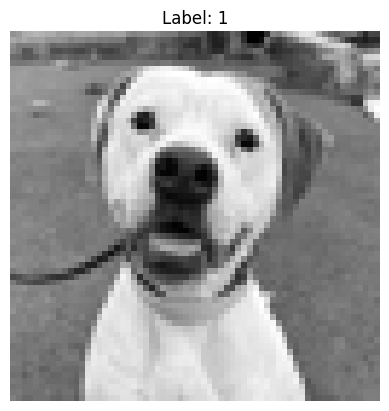

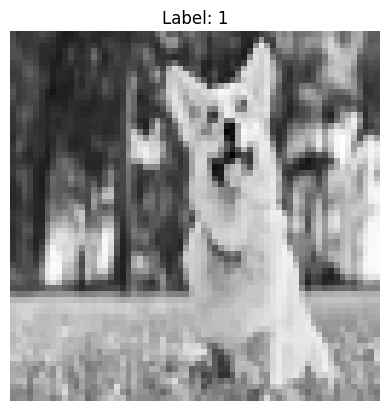

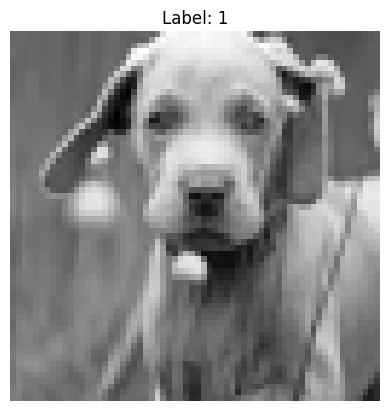

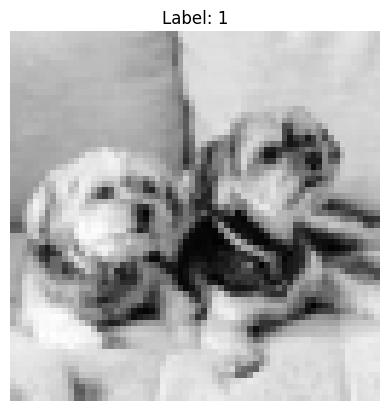

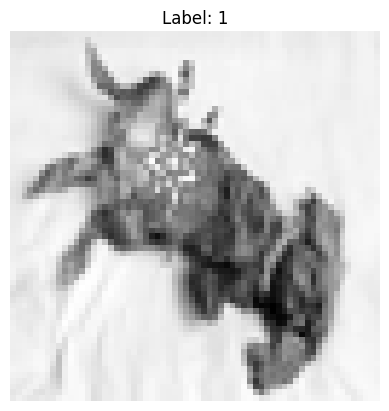

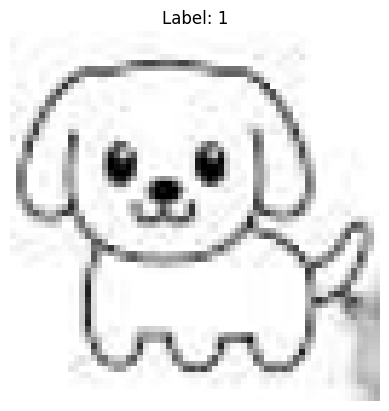

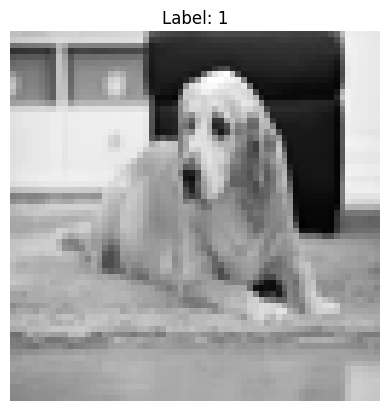

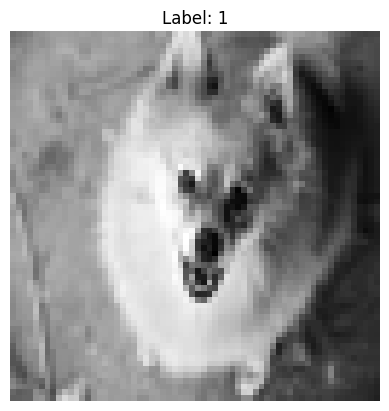

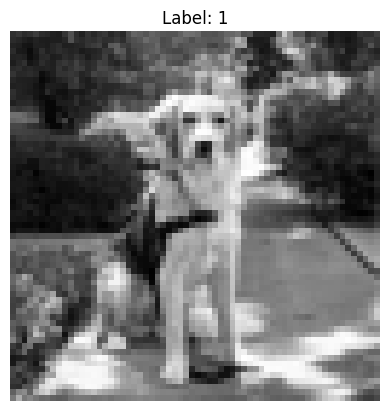

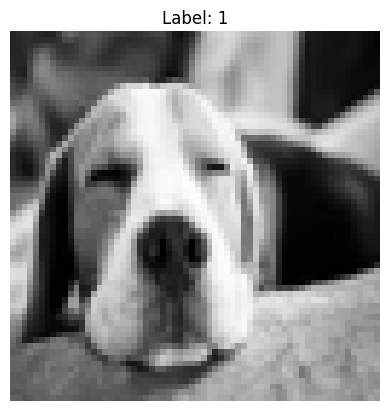

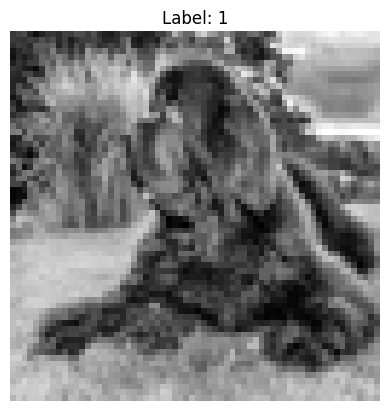

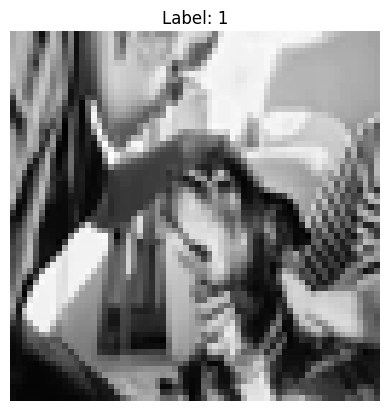

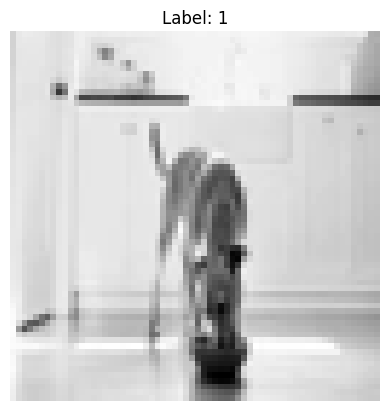

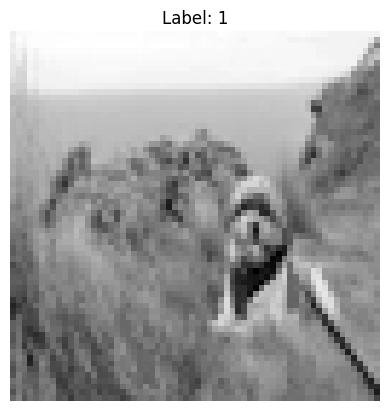

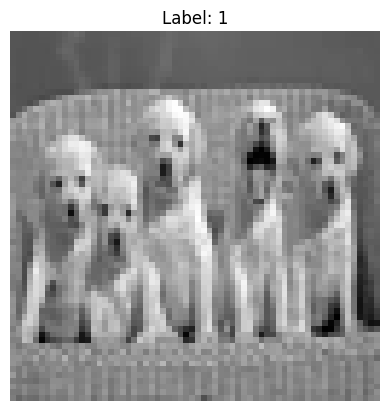

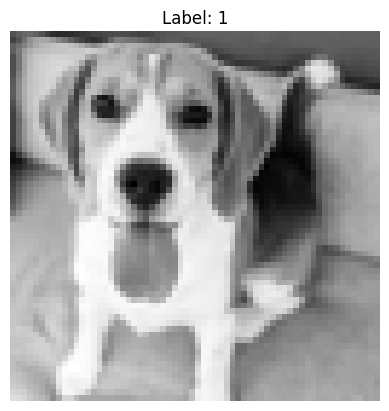

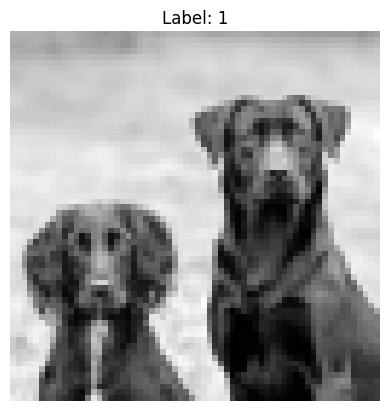

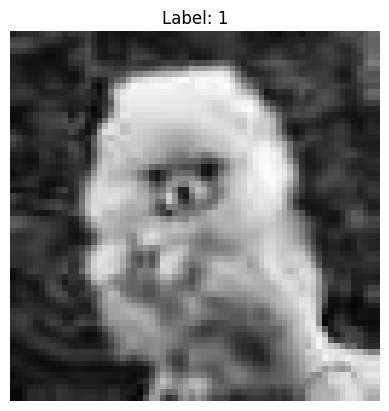

In [8]:
import h5py
import matplotlib.pyplot as plt

# Chemin du fichier HDF5
fichier_hdf5 = "testset.hdf5"

# Charger le fichier HDF5
with h5py.File(fichier_hdf5, "r") as hdf5_file:
    # Charger les datasets
    X_test = hdf5_file["X_test"][:]
    Y_test = hdf5_file["Y_test"][:]

    # Parcourir les images et leurs labels
    for i in range(len(X_test)):
        image = X_test[i]  # Image 64x64
        label = Y_test[i][0]  # Label correspondant

        # Afficher l'image
        plt.imshow(image, cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
        plt.show()


Cette partie est faite pour le train set (j'ai juste changer 2 3 truc niveau nom de var)

In [9]:

import h5py
import numpy as np
from PIL import Image
import os

# Chemin du dossier contenant les sous-dossiers "chats" et "chiens"
dossier_images = "datasetImg/trainset"  # Remplacez par le chemin de votre dossier
output_file = "trainset.hdf5"

# Initialiser les listes pour stocker les données et les labels
images = []
labels = []

# Définir les labels en fonction des sous-dossiers
label_mapping = {
    "chats": 0,  # Label 0 pour les chats
    "chiens": 1  # Label 1 pour les chiens
}

# Parcourir les sous-dossiers ("chats" et "chiens")
for sous_dossier, label in label_mapping.items():
    chemin_sous_dossier = os.path.join(dossier_images, sous_dossier)
    if not os.path.isdir(chemin_sous_dossier):
        print(f"Le sous-dossier '{sous_dossier}' est introuvable. Ignoré.")
        continue

    for fichier in os.listdir(chemin_sous_dossier):
        if fichier.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Vérifier les extensions d'image
            chemin_image = os.path.join(chemin_sous_dossier, fichier)
            try:
                # Charger l'image
                image = Image.open(chemin_image).convert("L")  # Conversion en niveaux de gris
                image = image.resize((64, 64))  # Redimensionner à 64x64
                image_array = np.array(image, dtype=np.uint8)

                # Ajouter l'image et le label aux datasets
                images.append(image_array)
                labels.append(label)
            except Exception as e:
                print(f"Erreur lors du traitement de l'image {fichier}: {e}")

# Convertir les listes en tableaux numpy
X_train = np.array(images, dtype=np.uint8)  # Shape: (n, 64, 64)
Y_train = np.array(labels, dtype=np.int64).reshape(-1, 1)  # Shape: (n, 1)

# Créer le fichier HDF5 et enregistrer les datasets
with h5py.File(output_file, "w") as hdf5_file:
    hdf5_file.create_dataset("X_train", data=X_train, dtype="uint8")
    hdf5_file.create_dataset("Y_train", data=Y_train, dtype="int64")

print(f"Fichier HDF5 '{output_file}' créé avec succès.")

Fichier HDF5 'trainset.hdf5' créé avec succès.


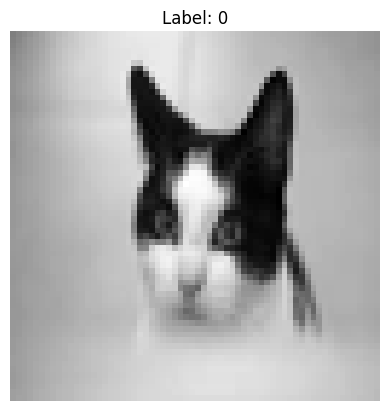

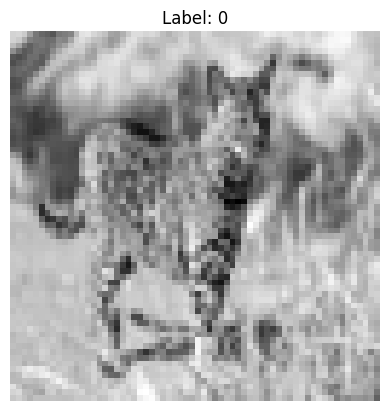

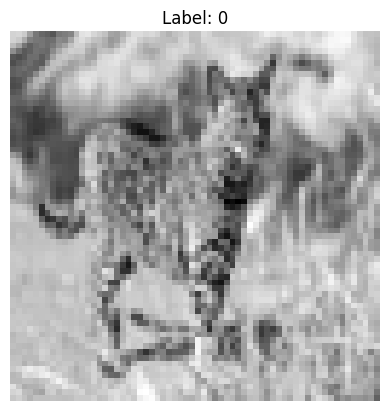

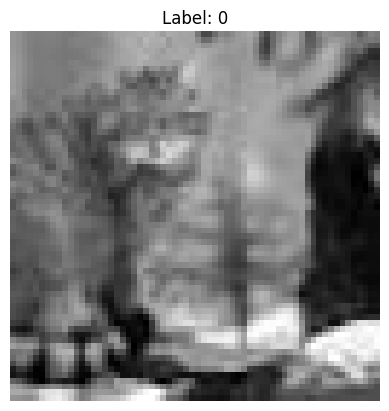

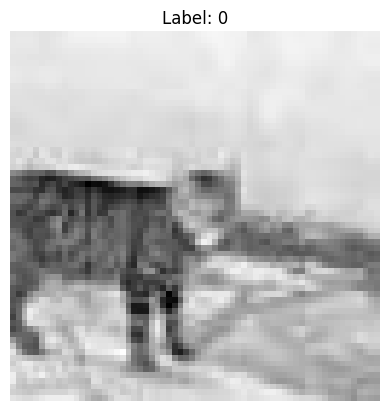

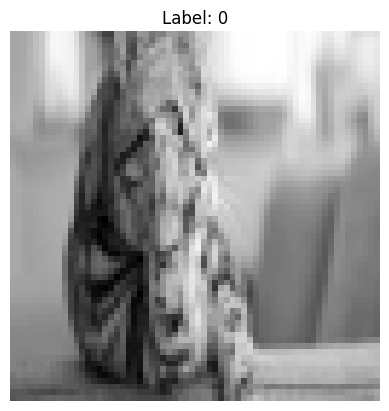

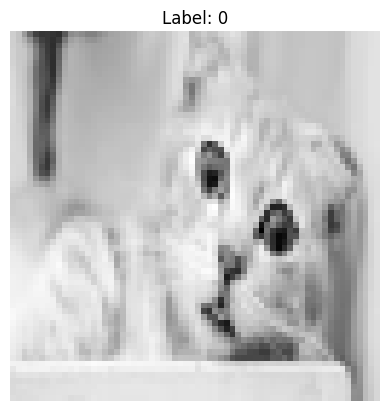

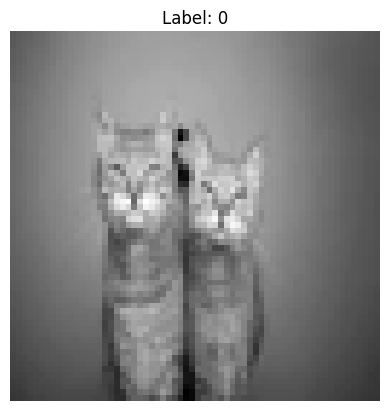

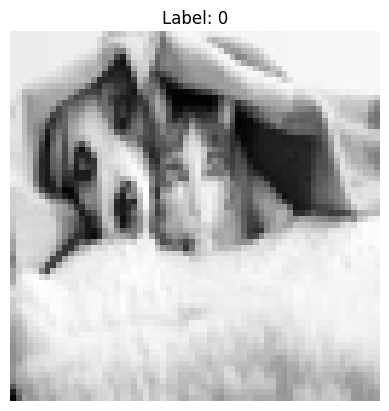

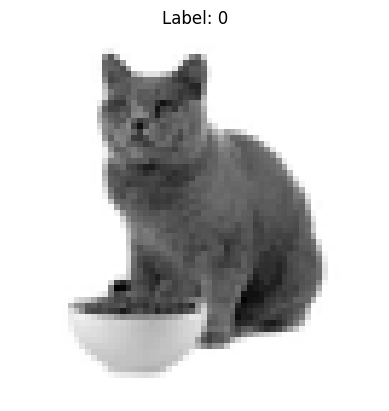

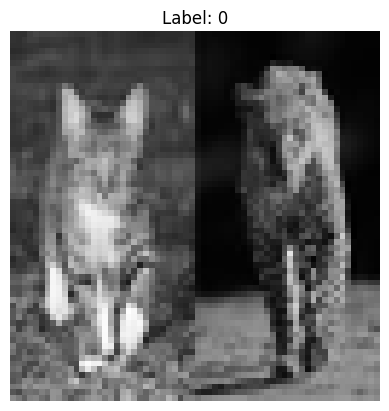

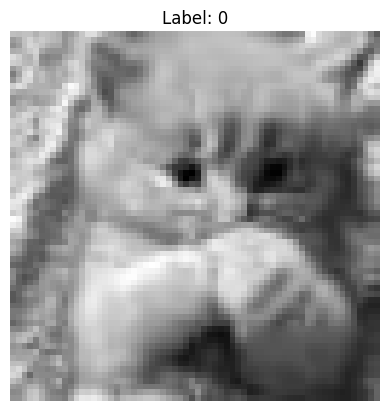

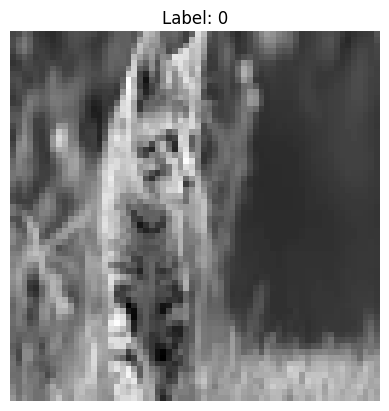

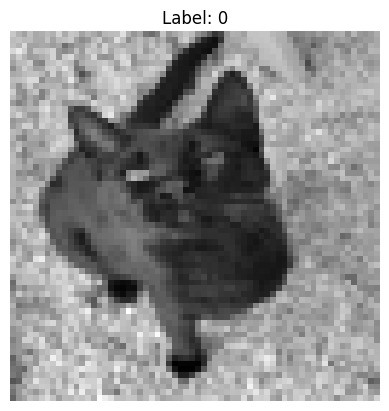

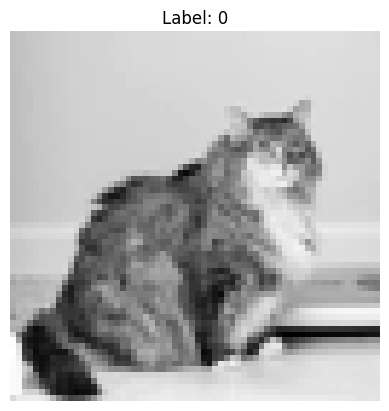

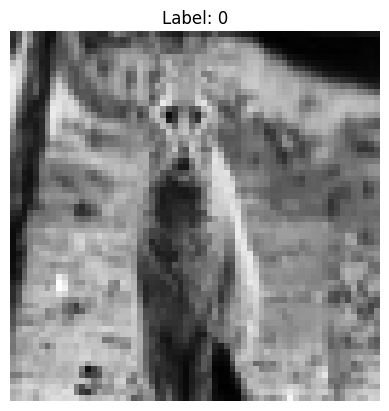

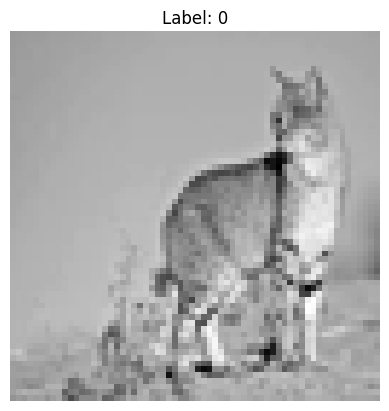

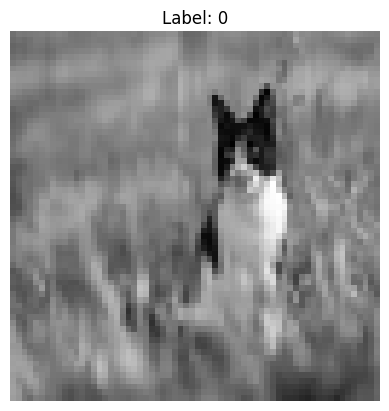

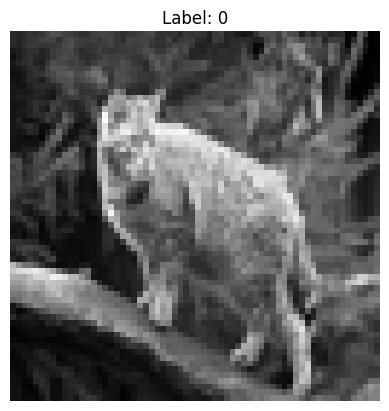

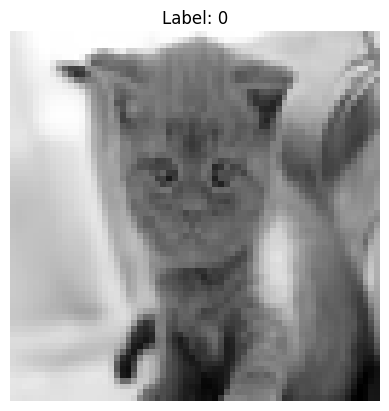

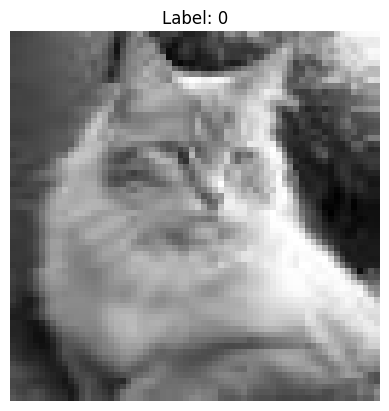

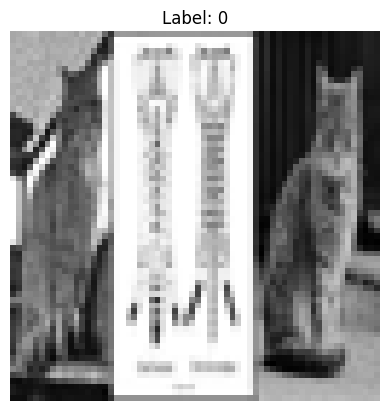

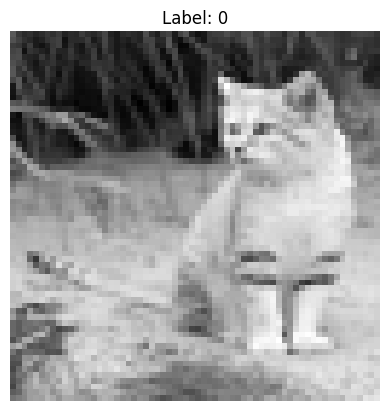

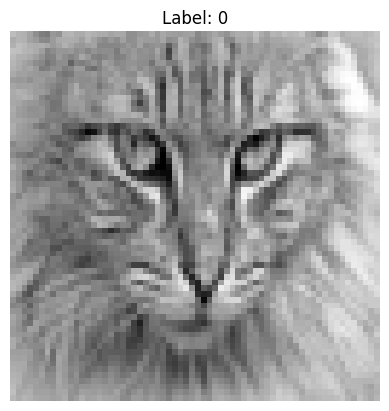

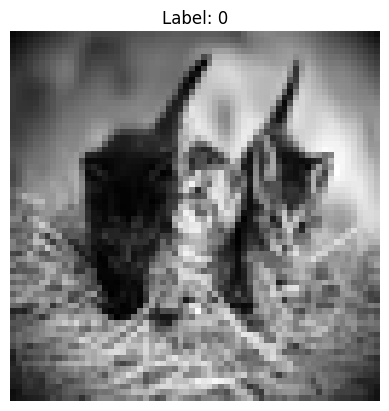

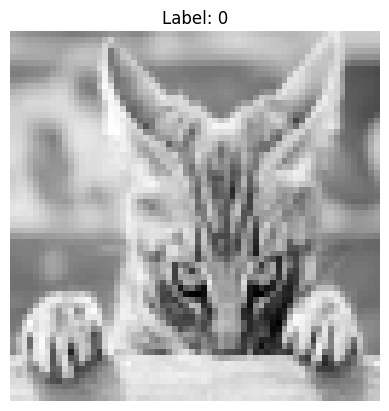

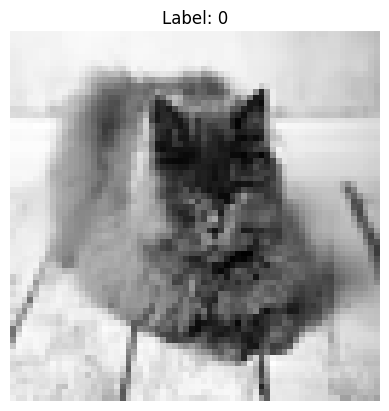

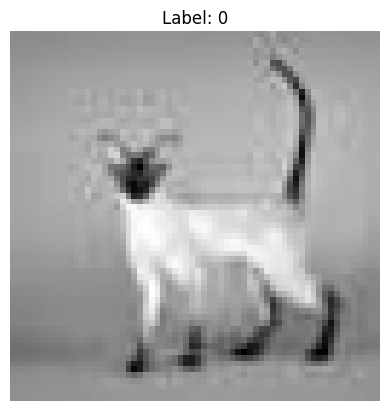

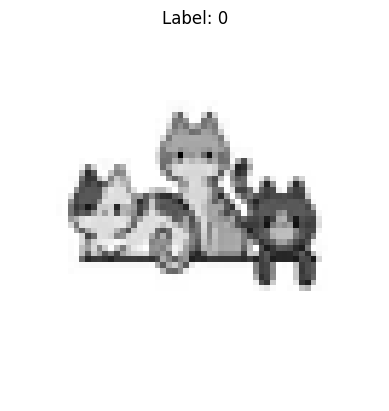

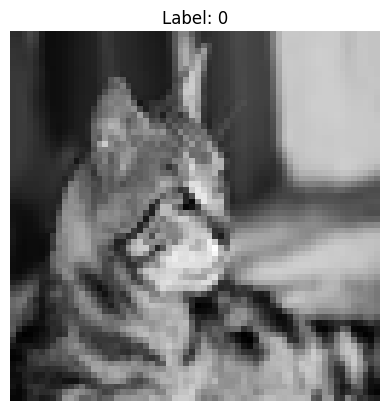

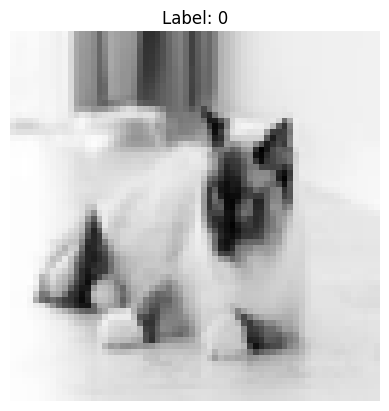

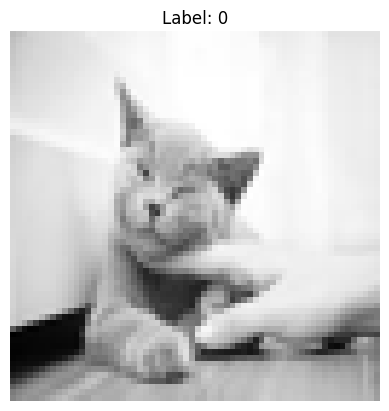

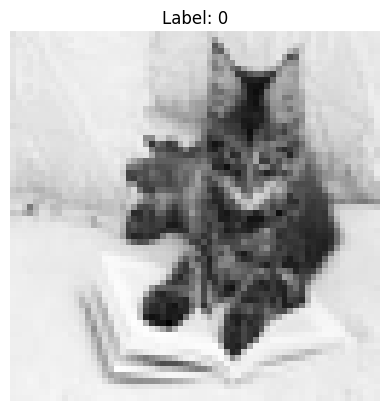

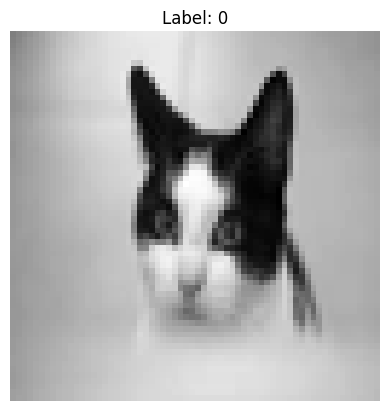

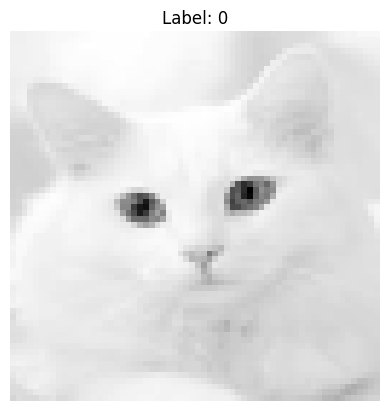

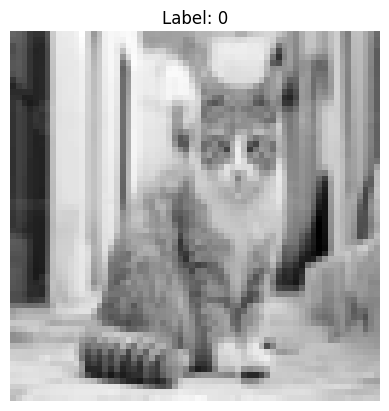

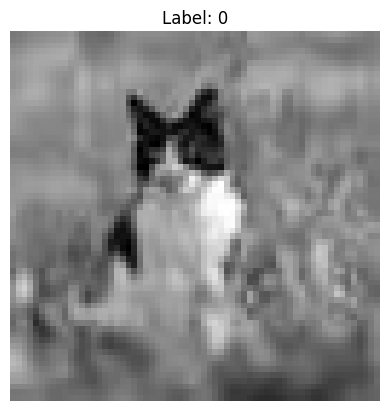

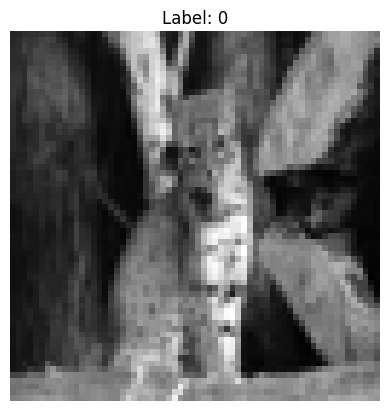

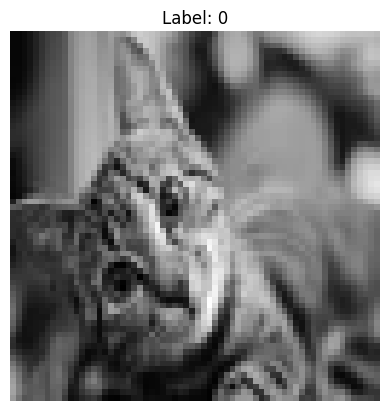

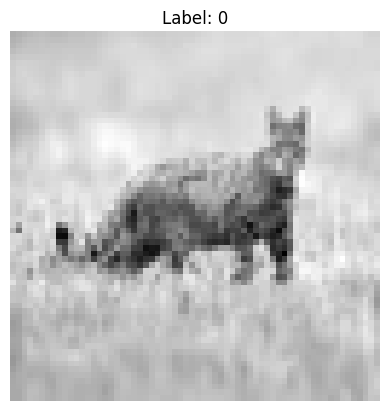

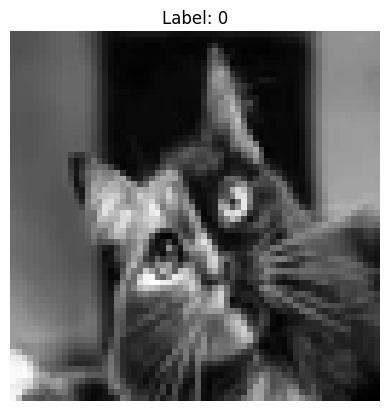

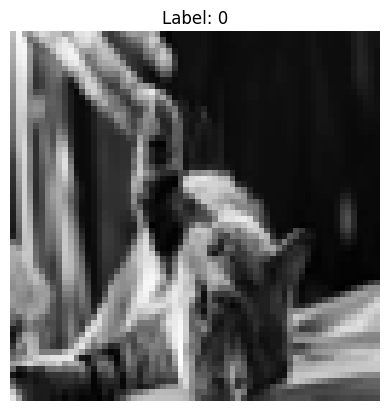

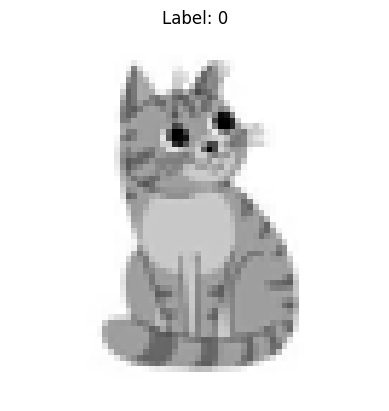

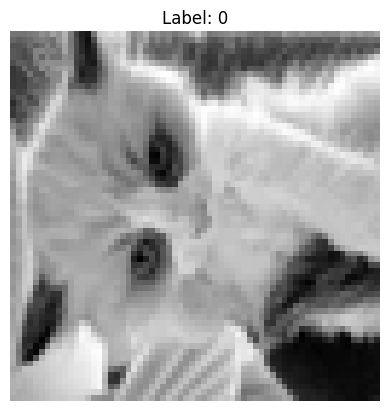

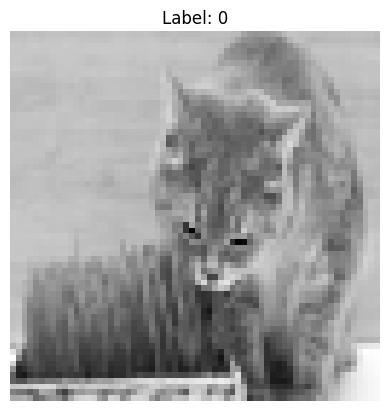

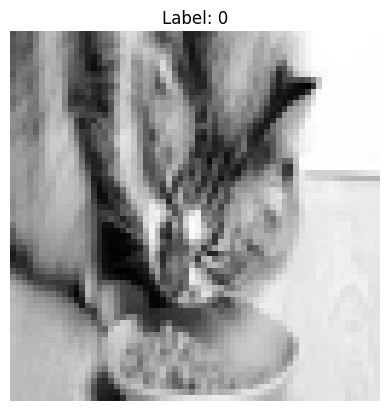

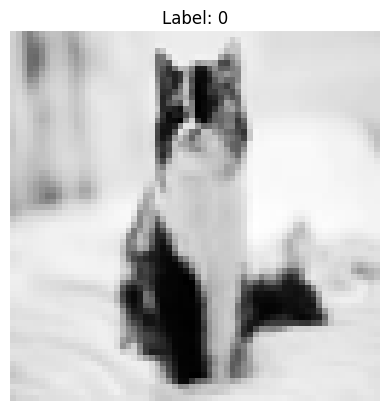

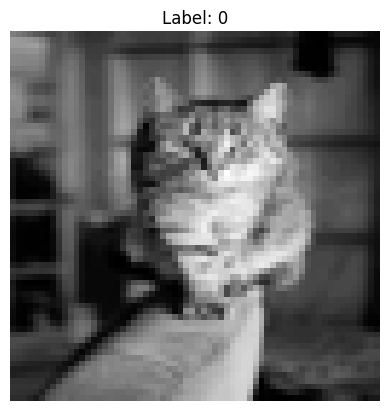

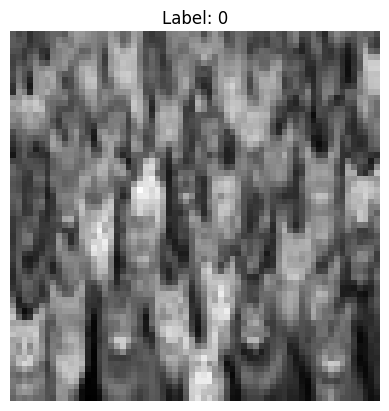

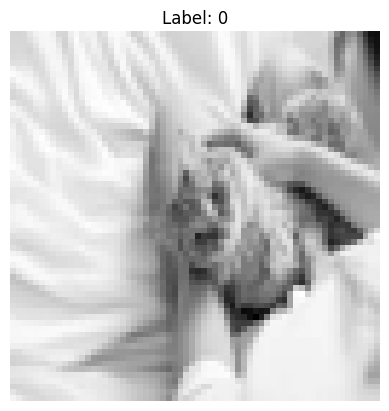

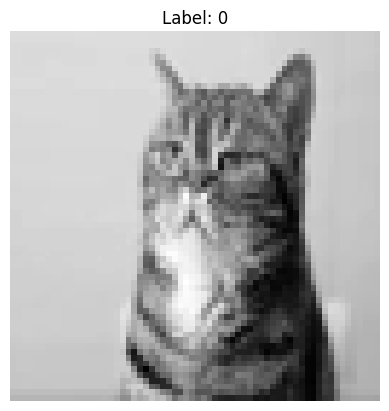

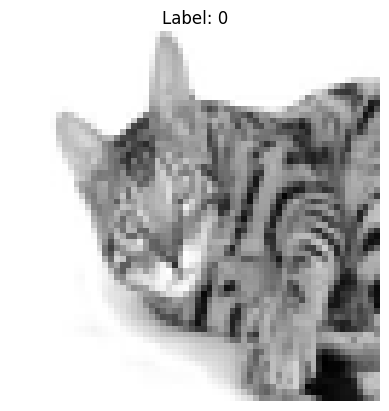

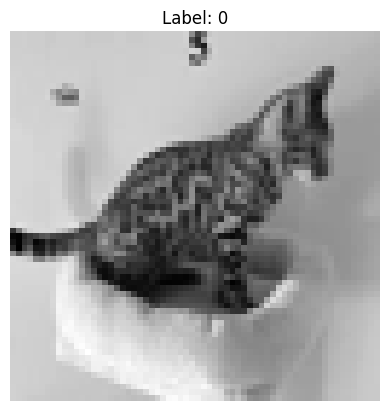

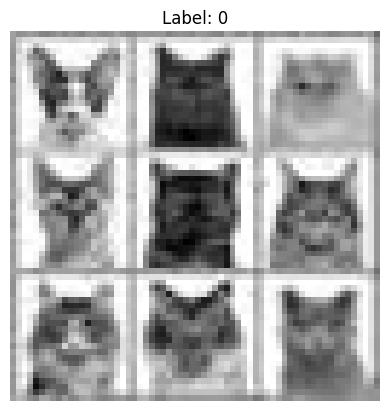

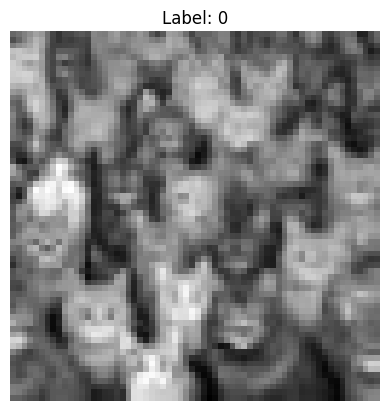

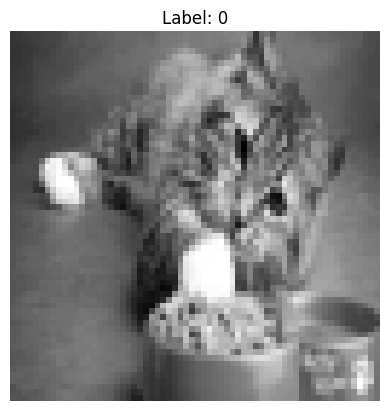

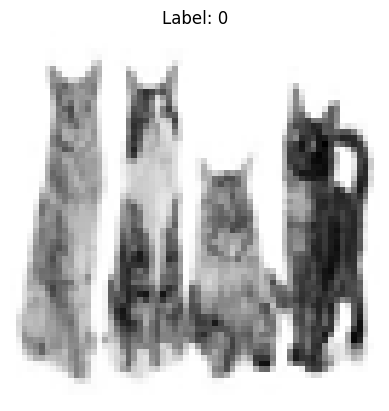

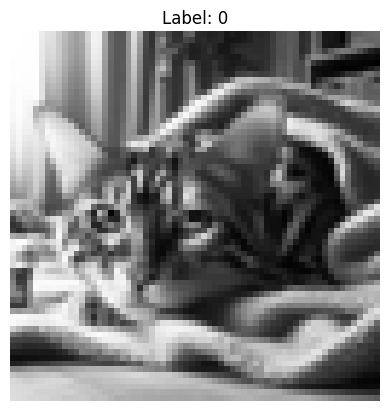

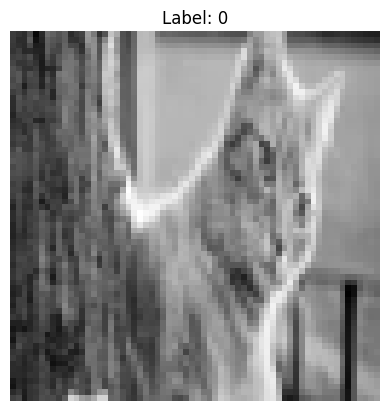

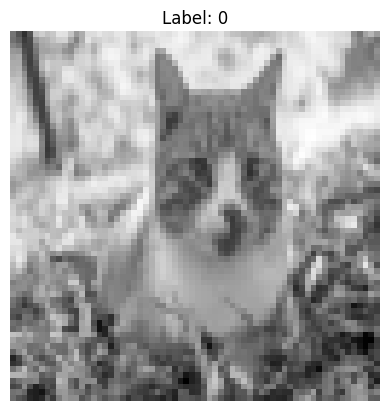

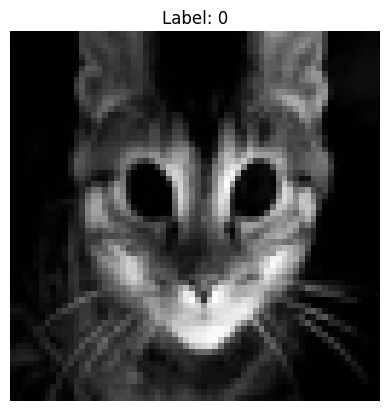

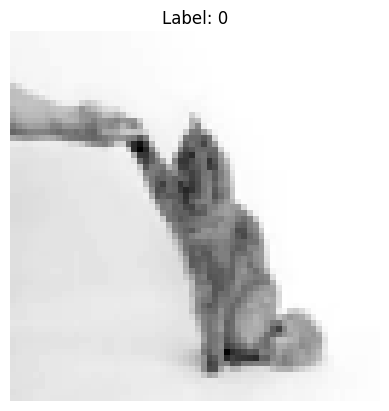

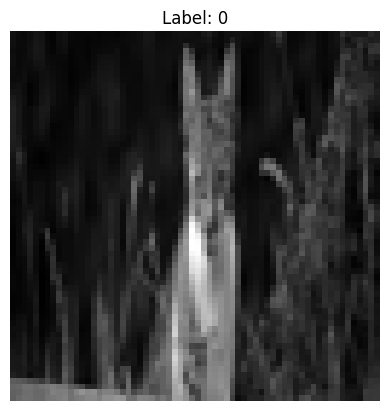

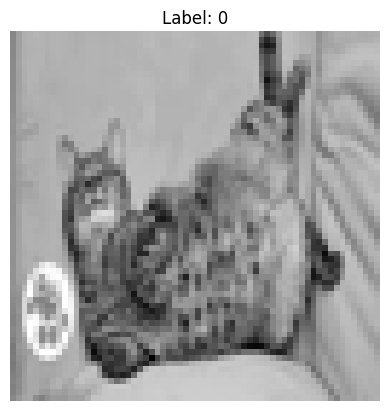

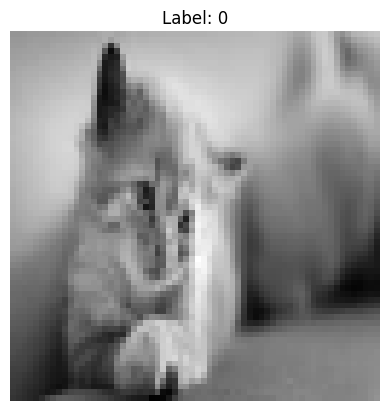

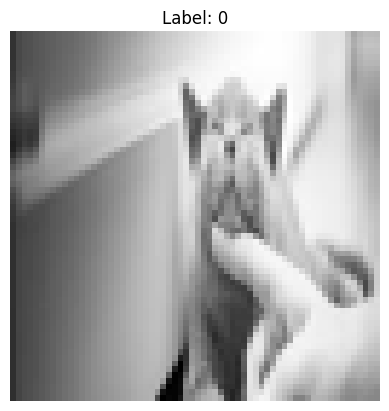

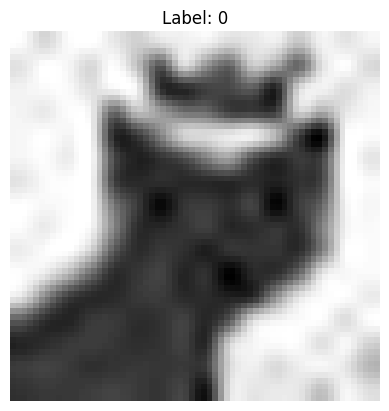

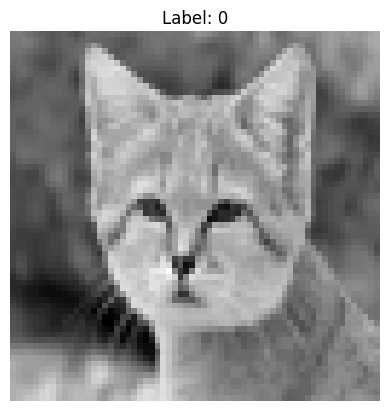

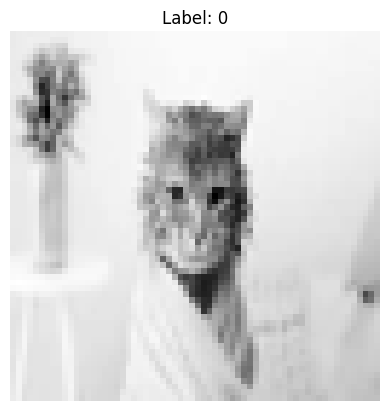

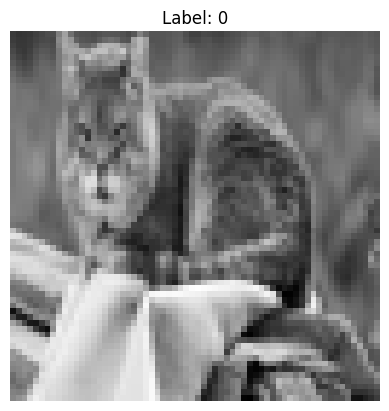

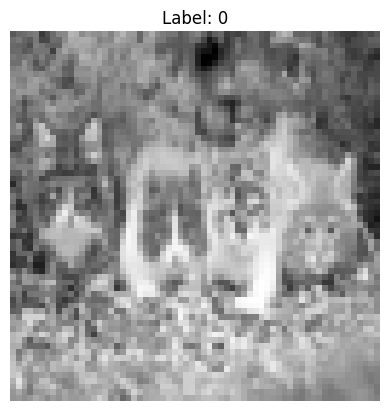

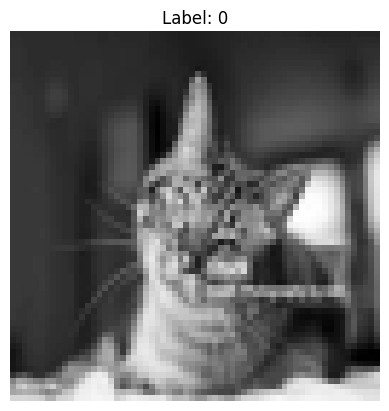

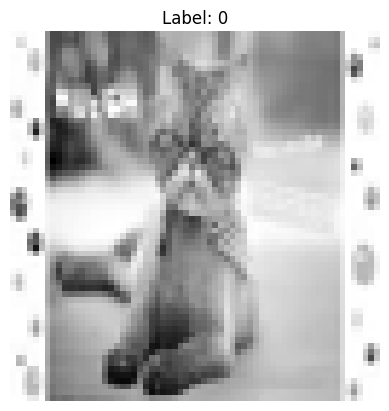

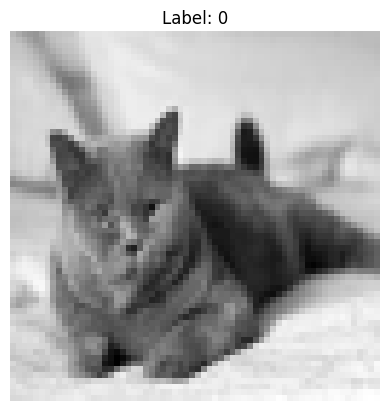

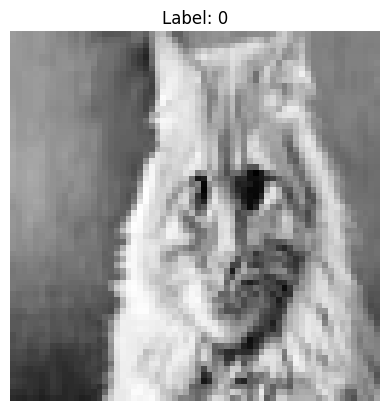

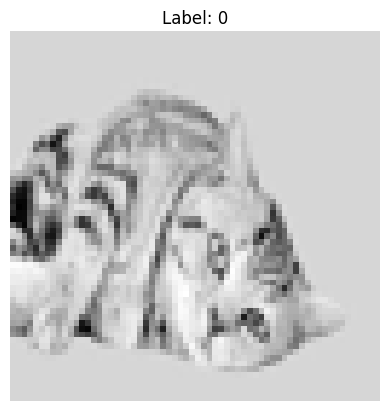

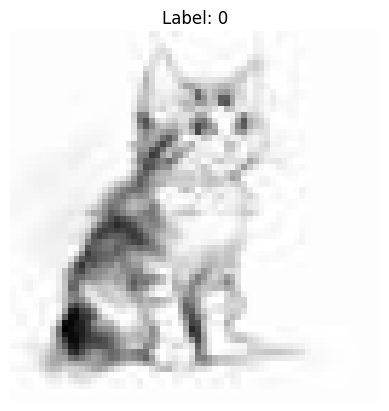

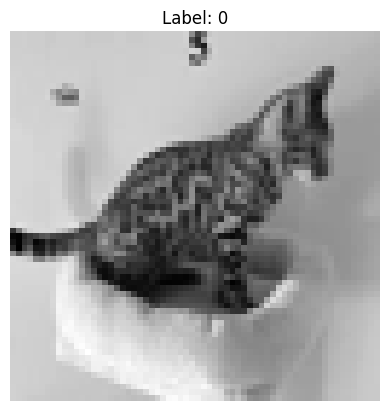

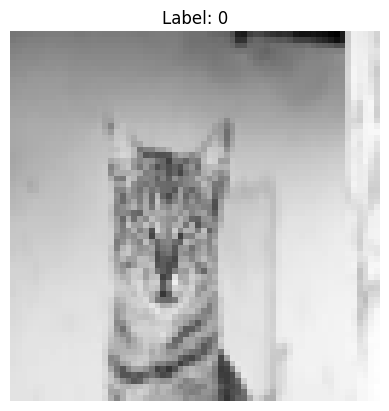

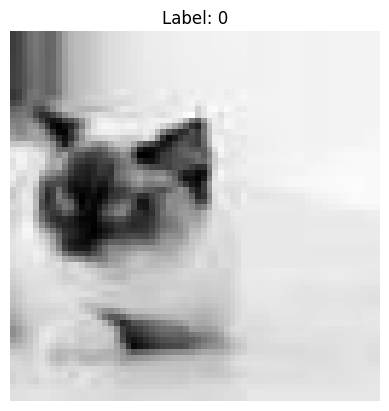

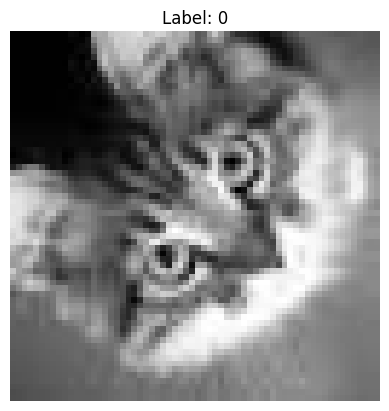

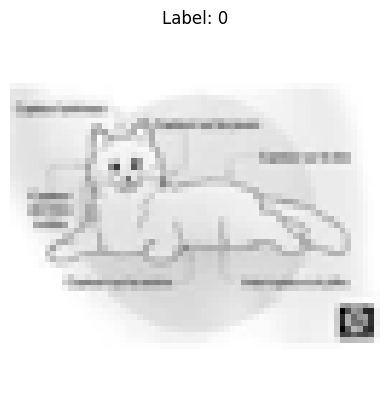

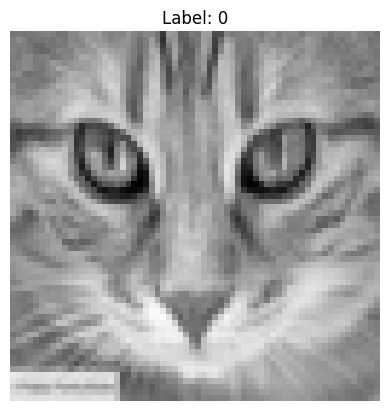

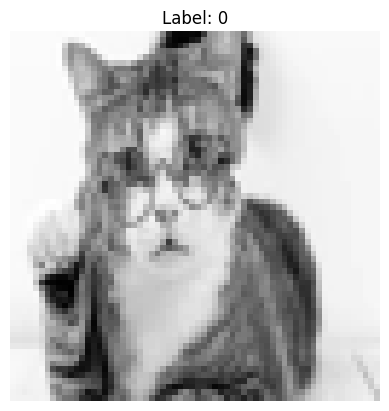

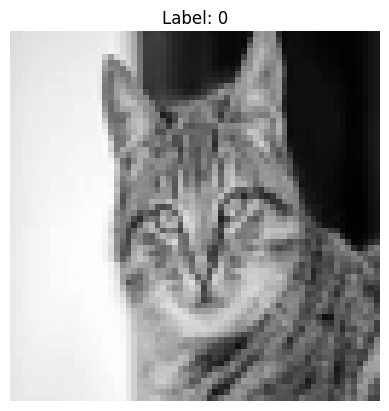

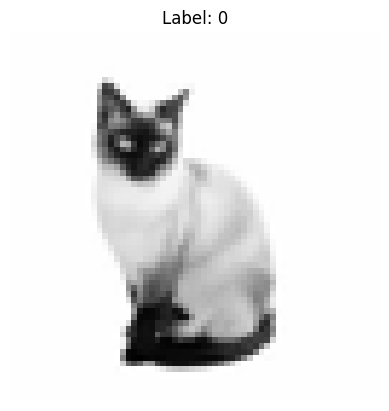

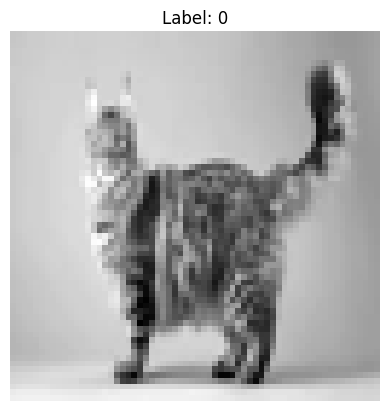

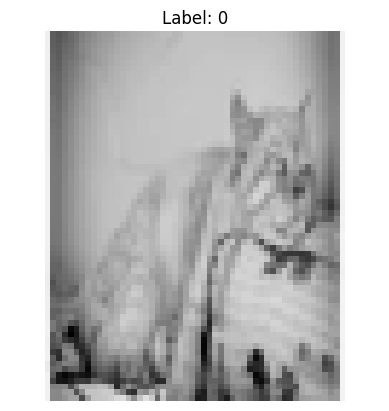

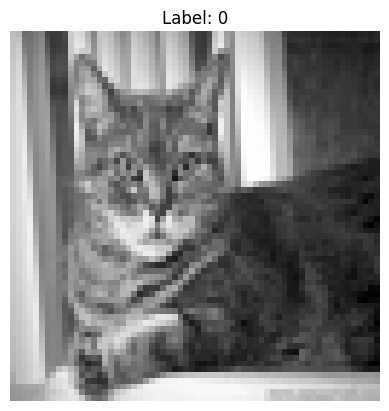

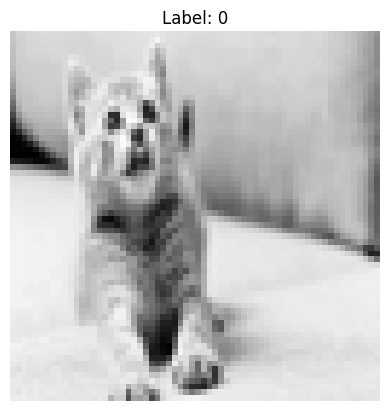

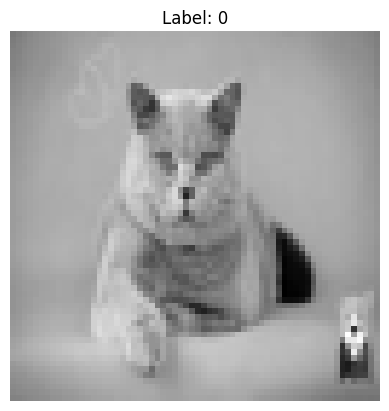

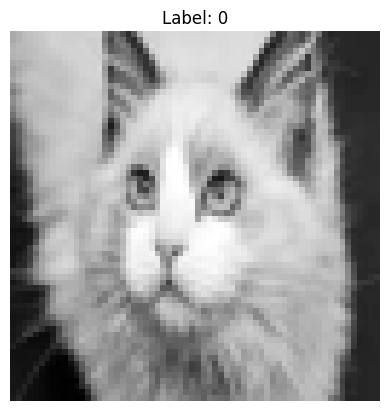

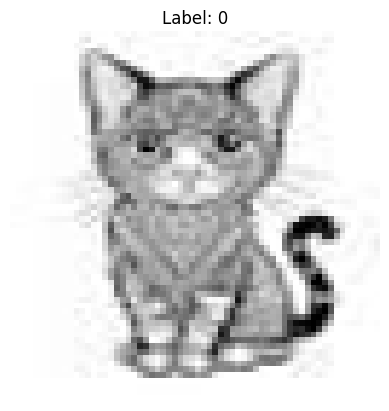

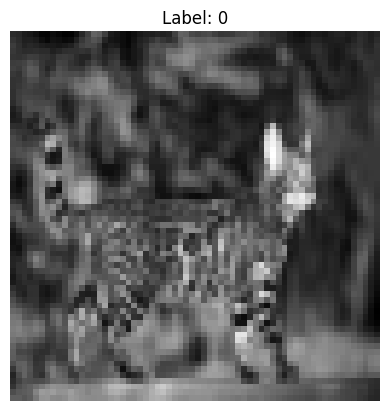

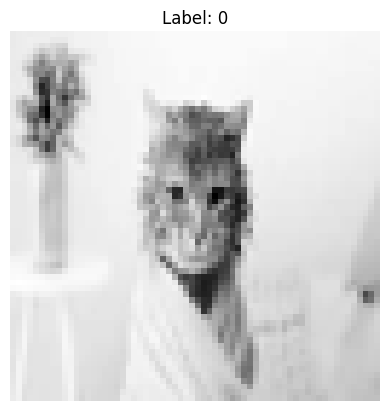

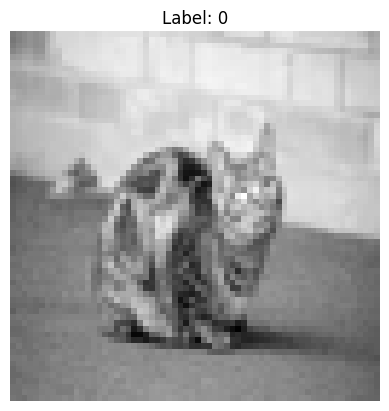

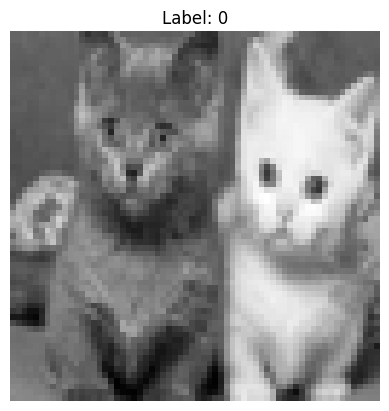

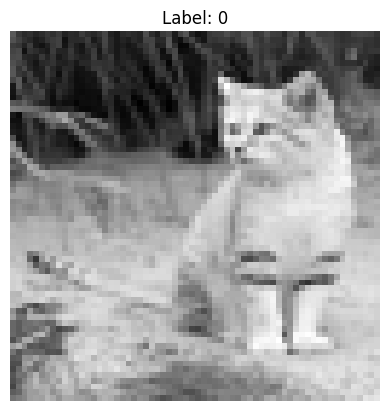

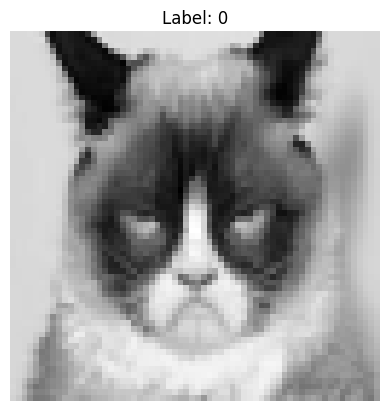

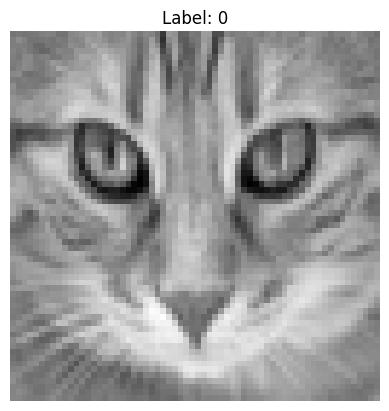

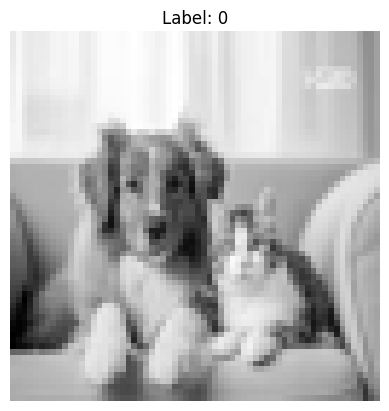

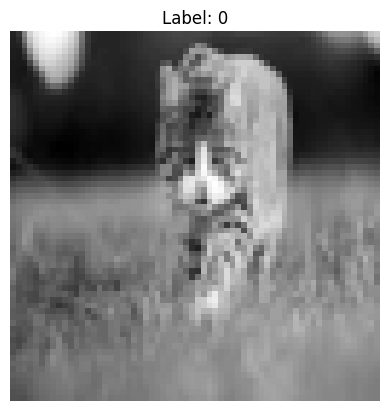

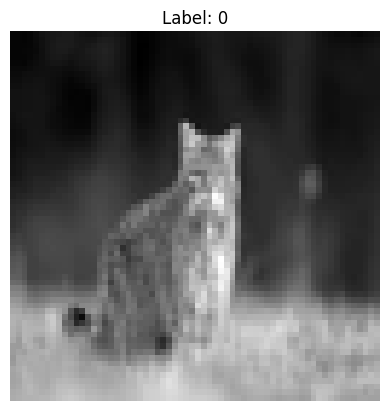

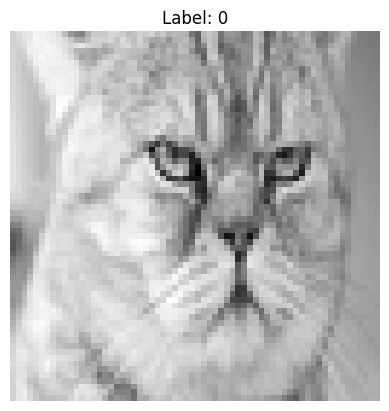

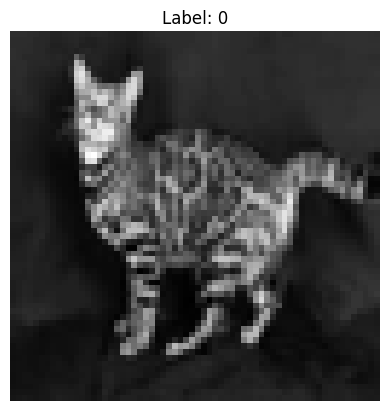

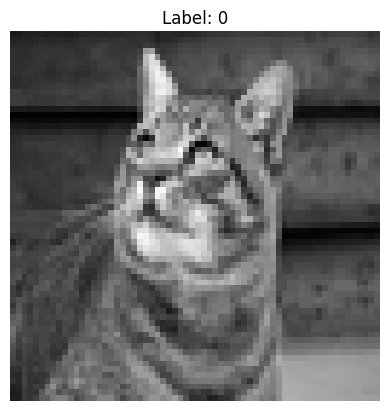

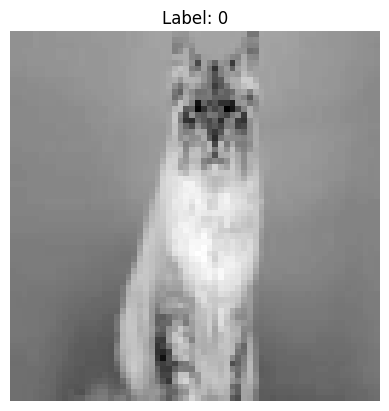

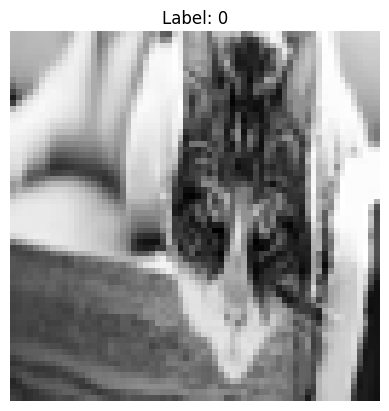

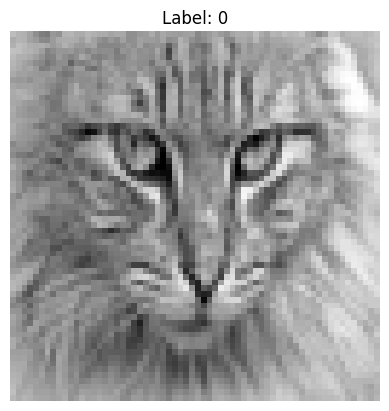

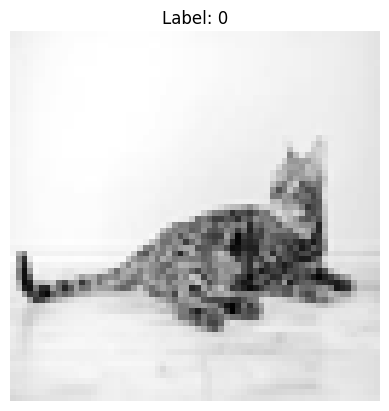

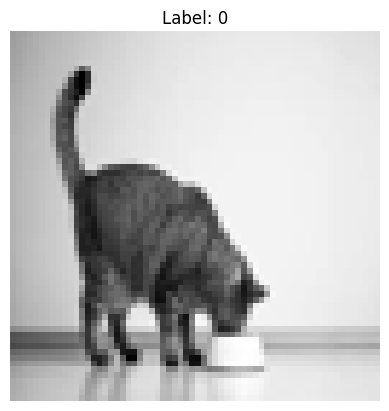

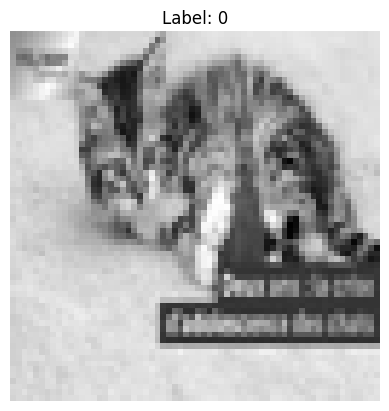

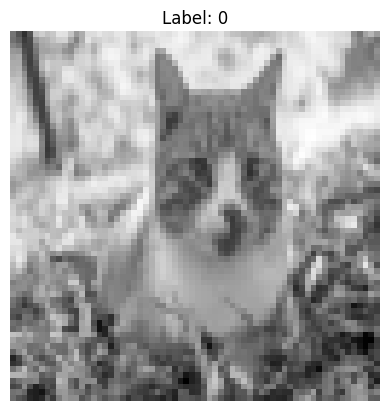

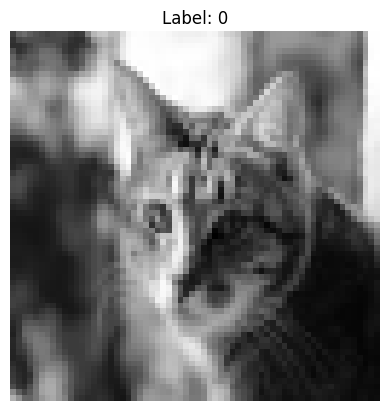

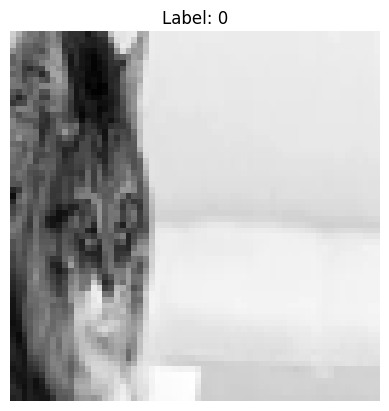

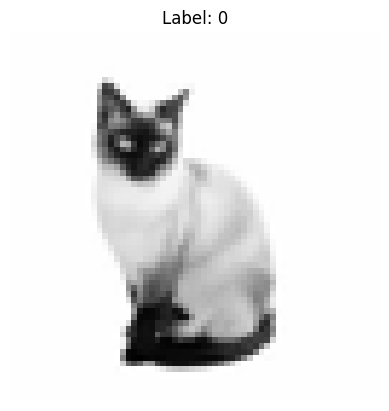

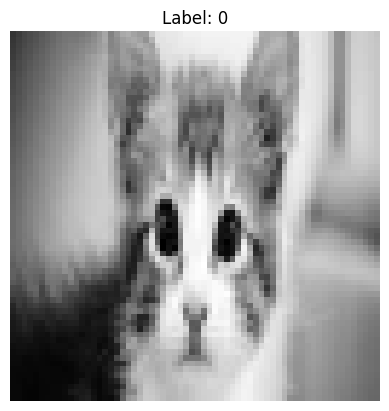

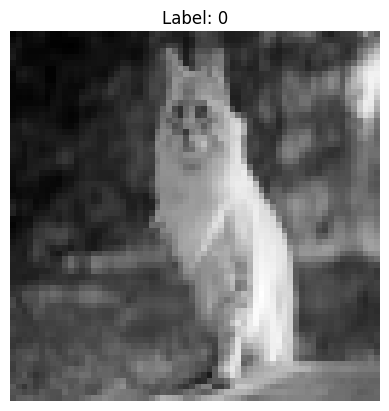

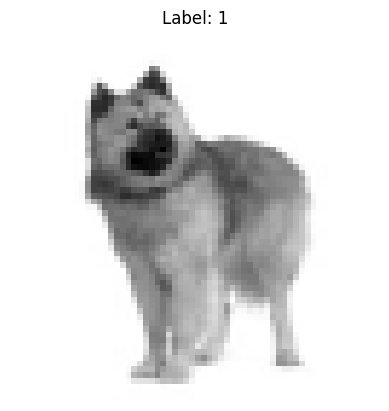

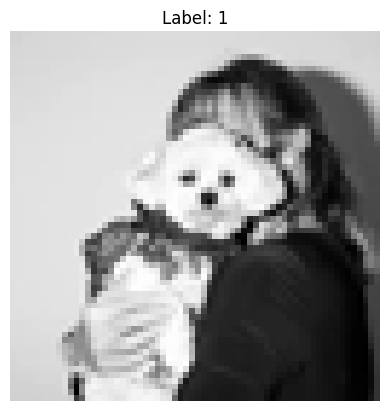

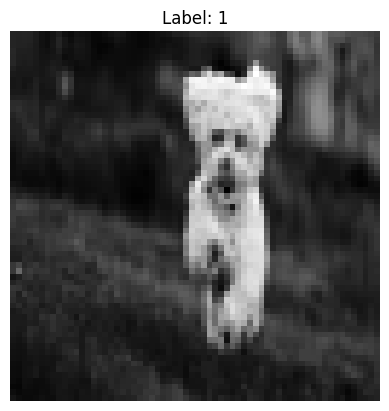

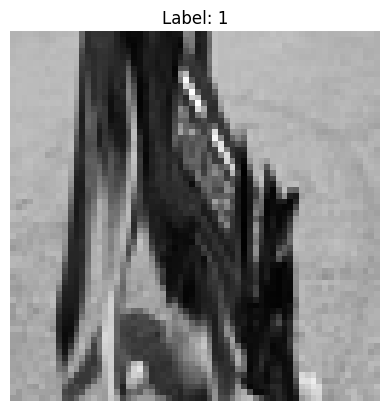

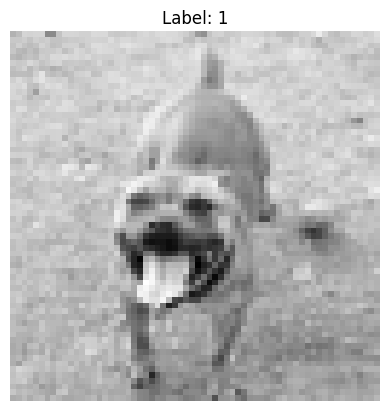

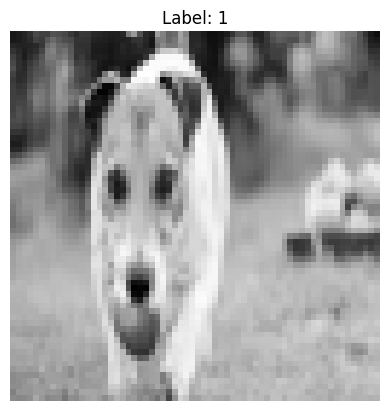

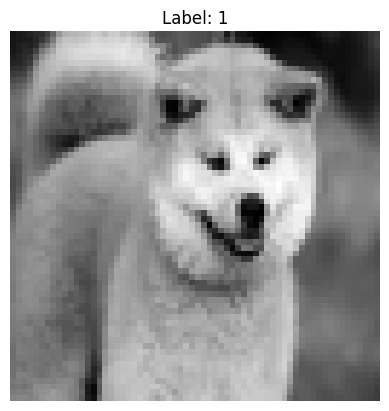

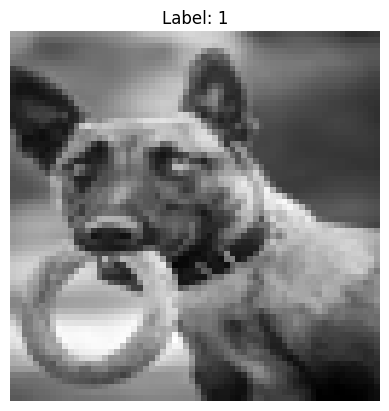

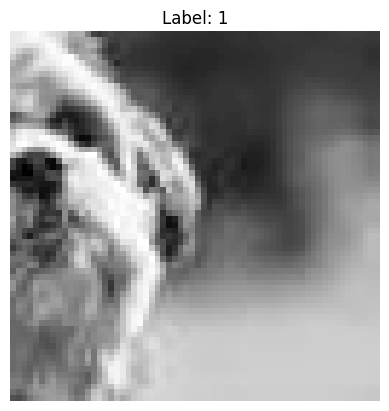

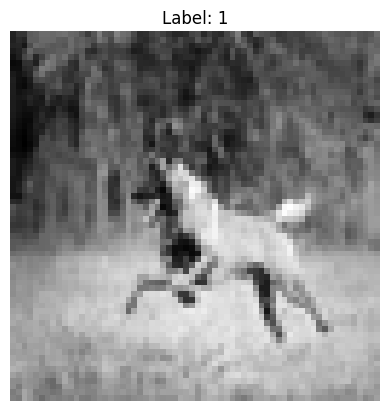

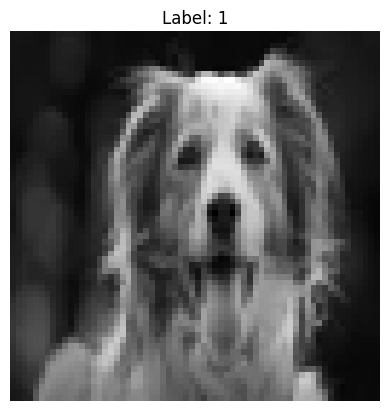

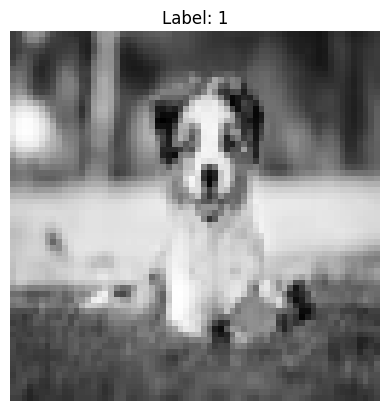

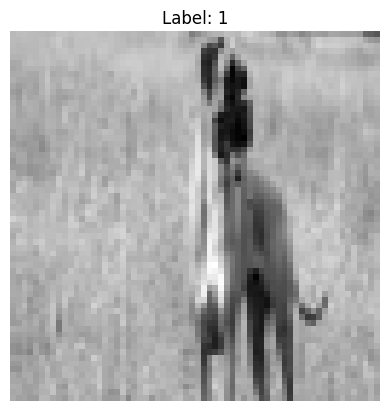

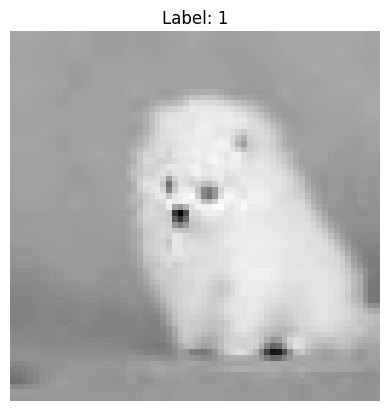

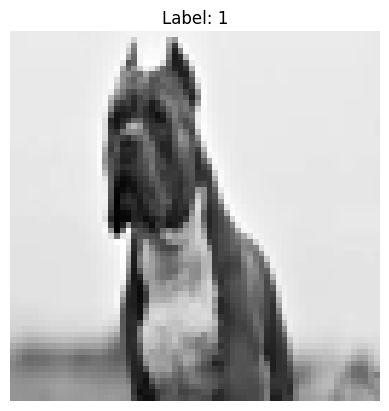

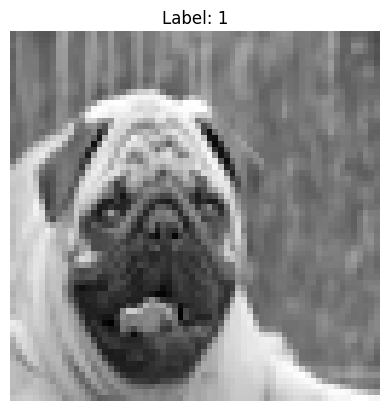

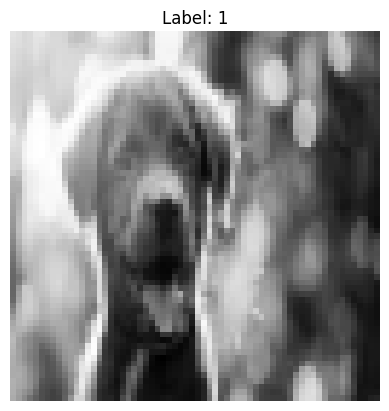

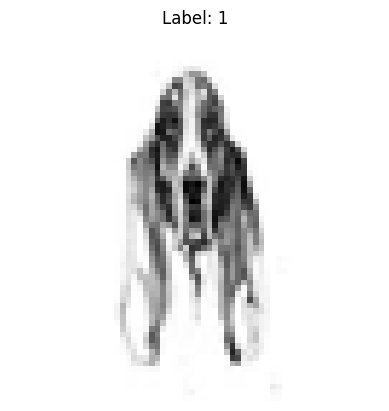

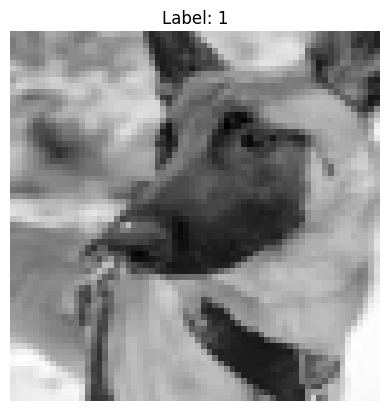

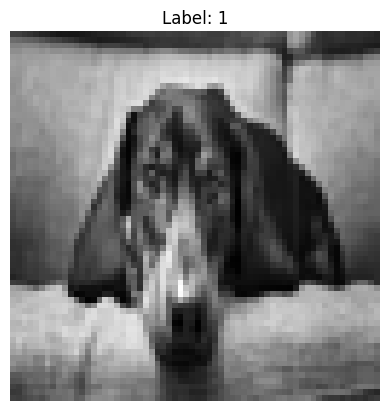

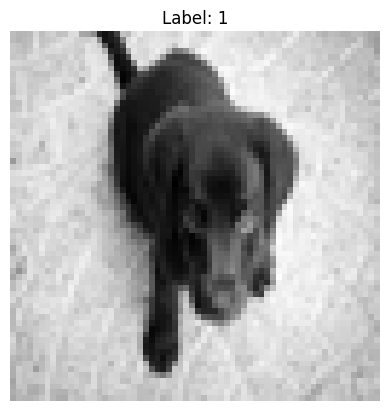

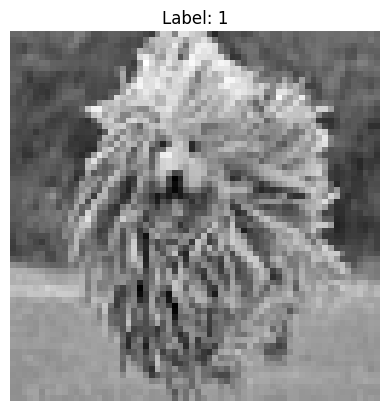

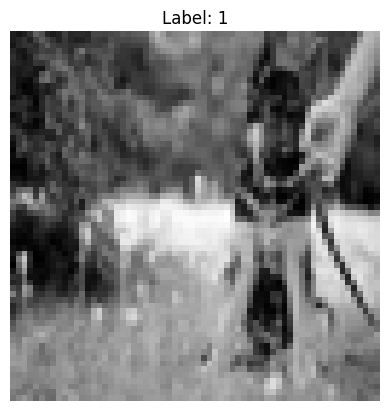

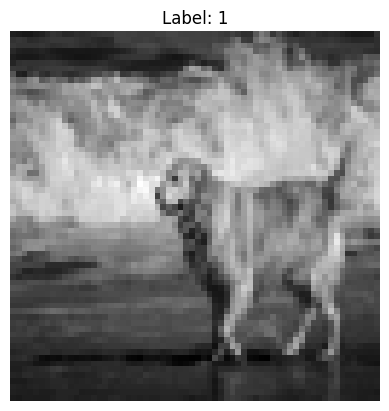

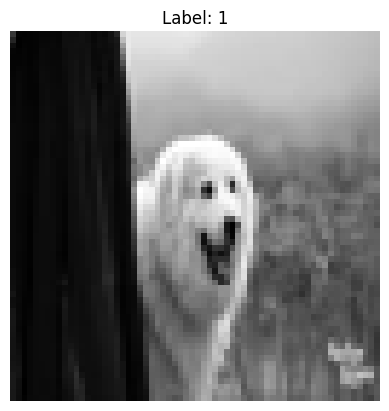

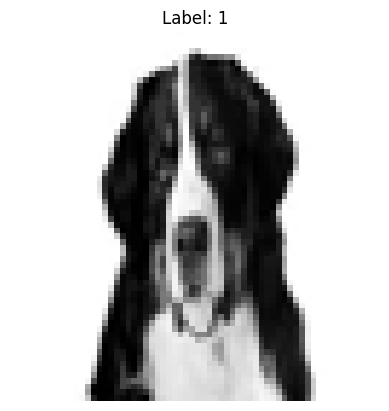

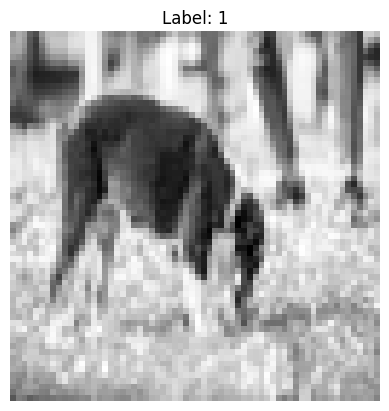

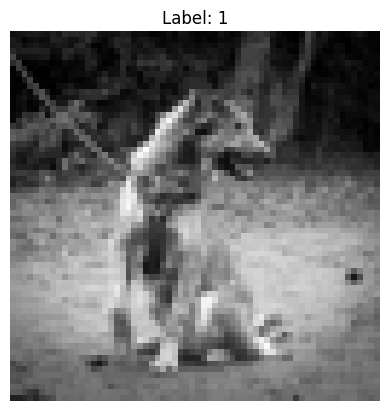

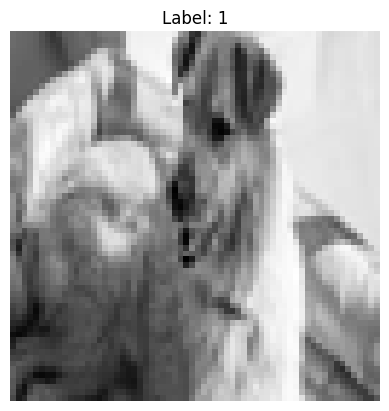

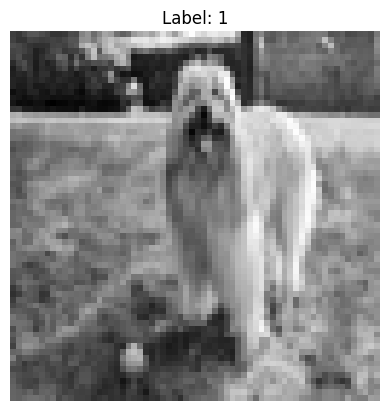

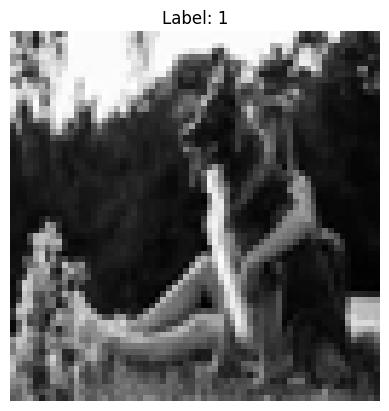

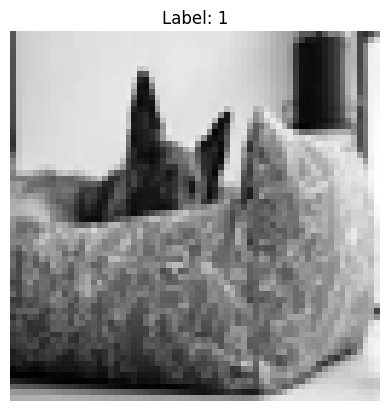

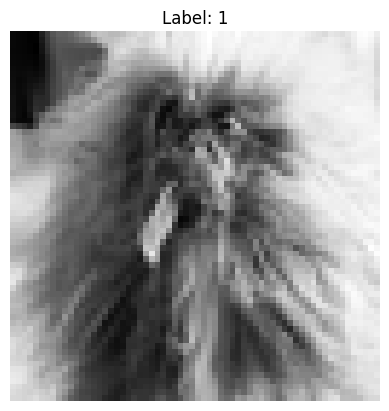

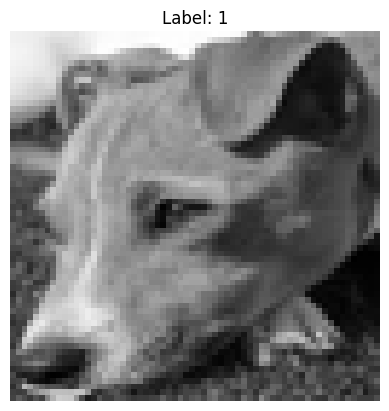

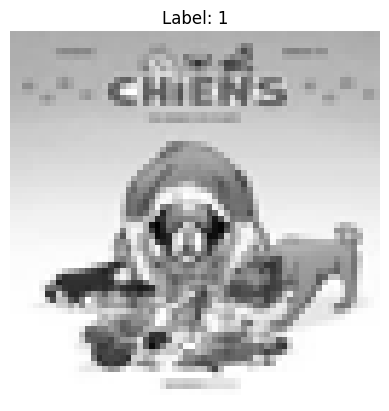

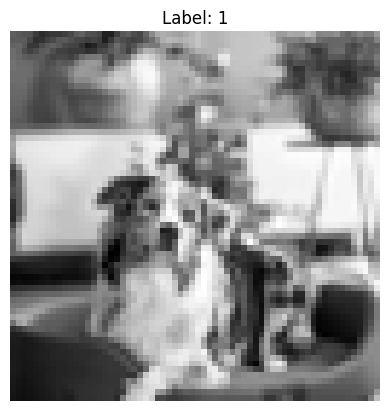

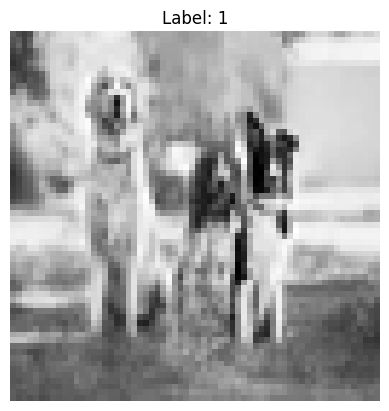

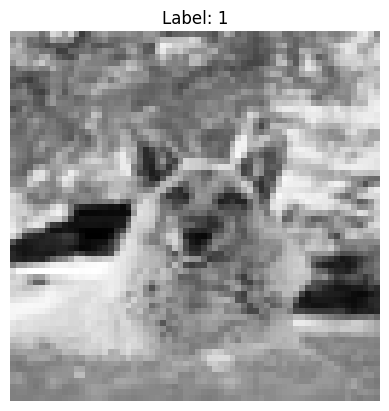

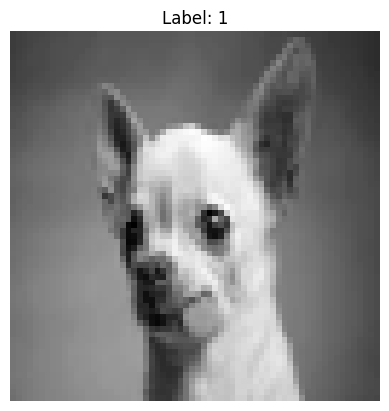

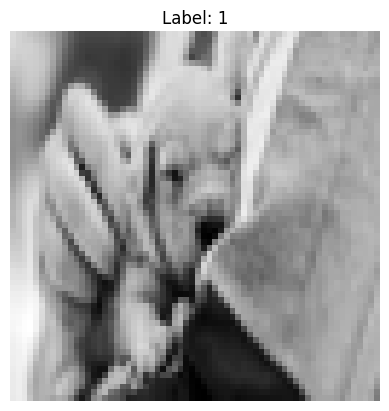

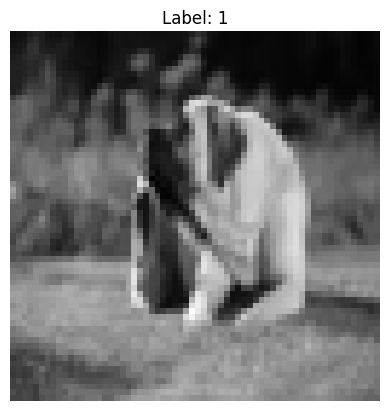

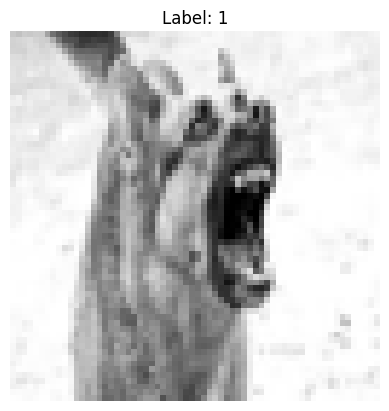

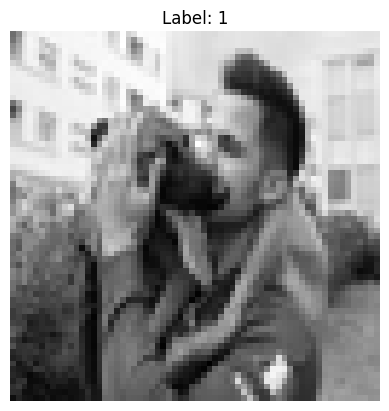

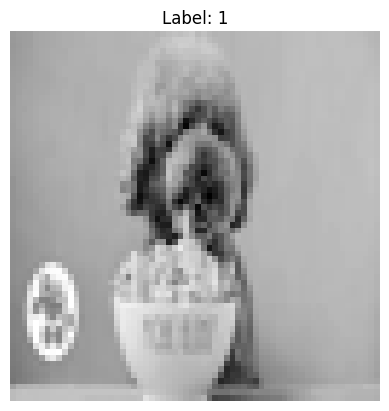

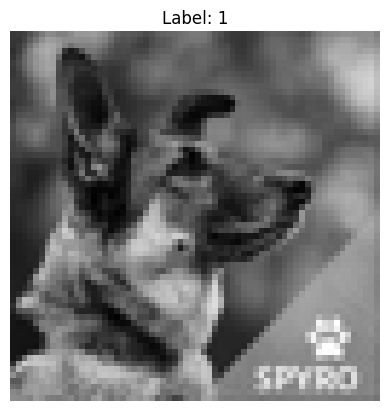

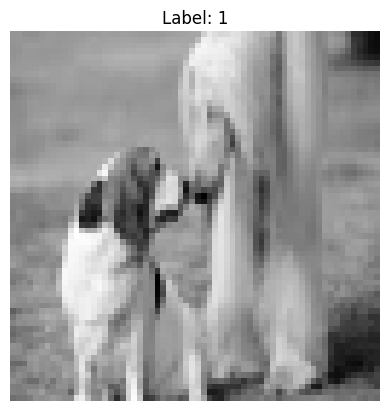

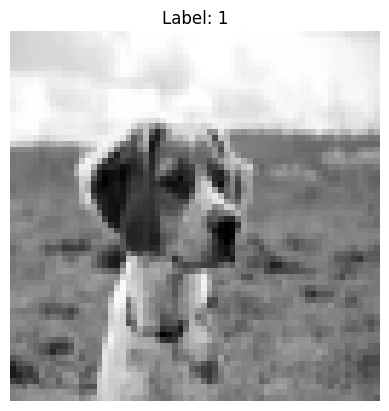

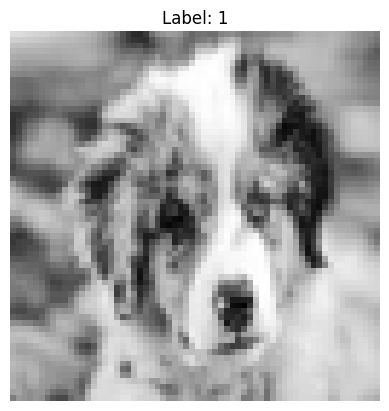

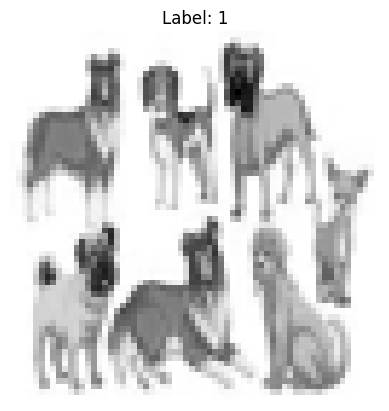

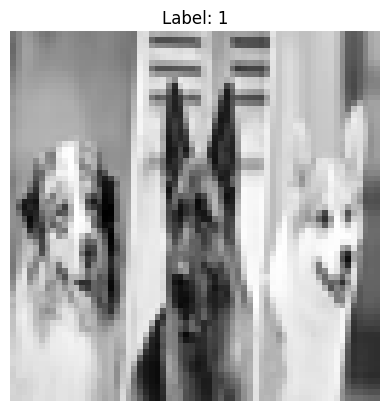

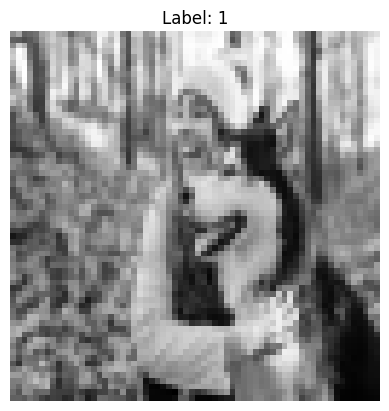

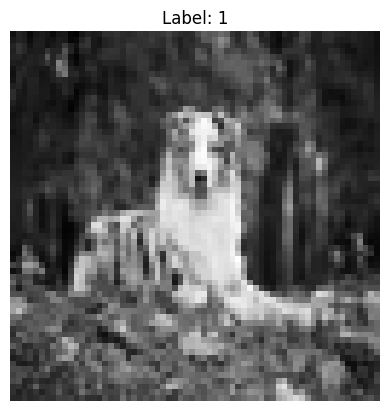

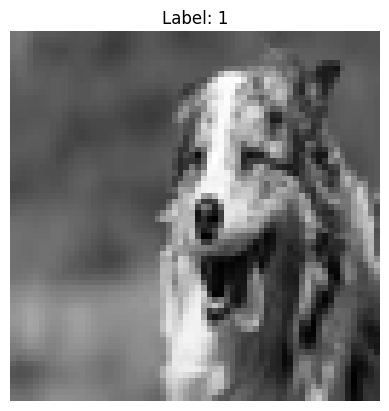

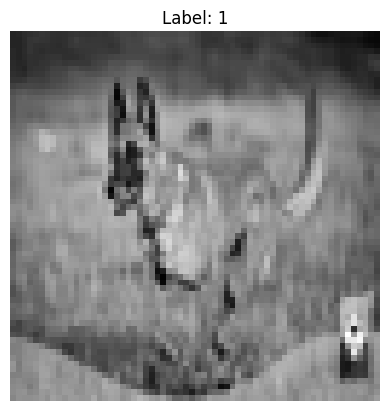

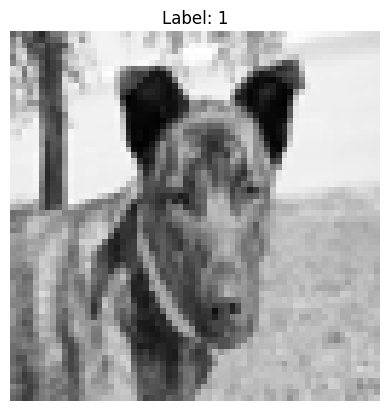

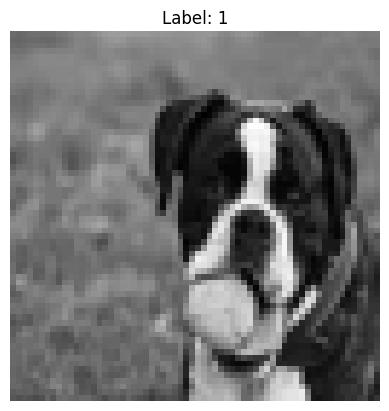

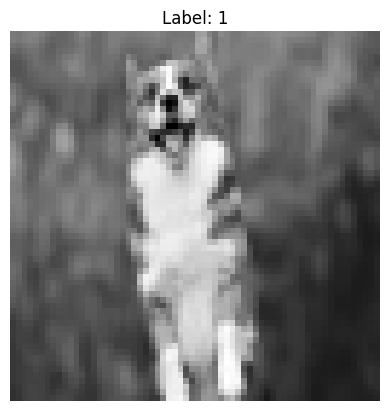

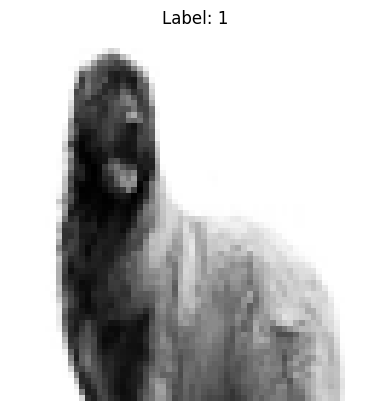

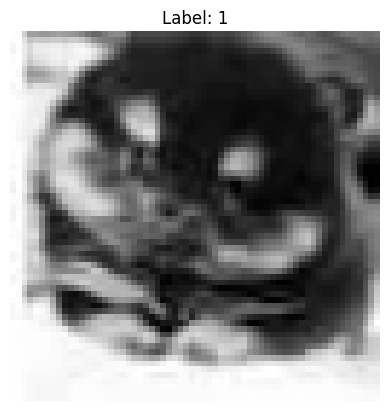

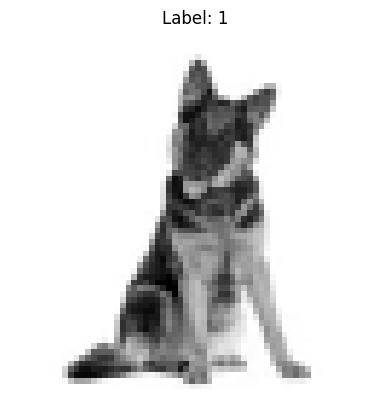

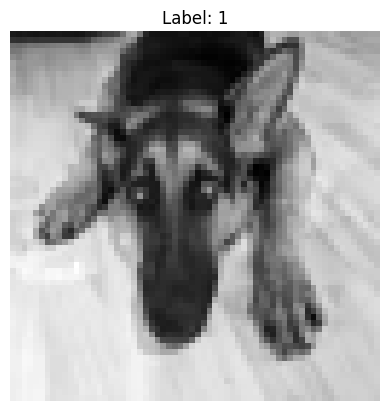

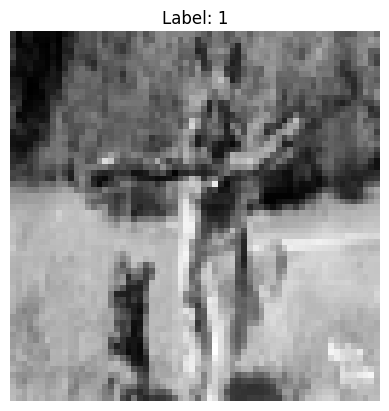

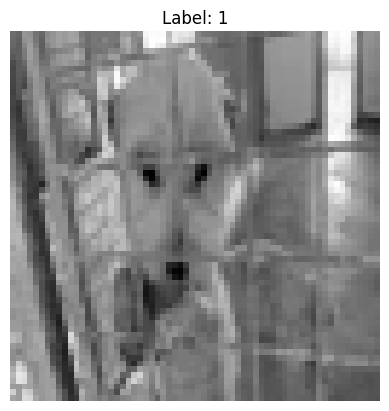

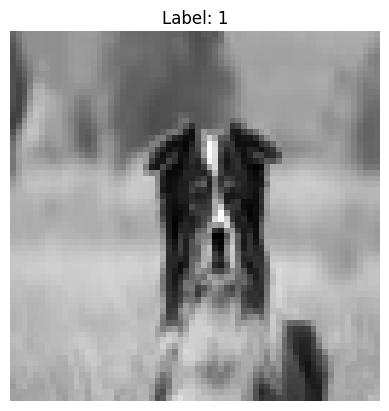

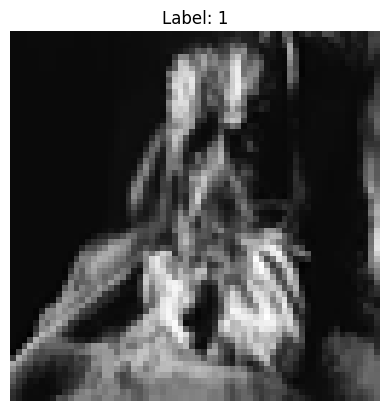

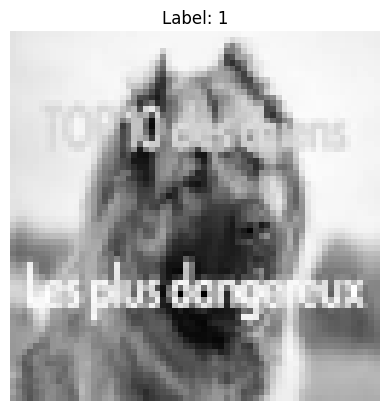

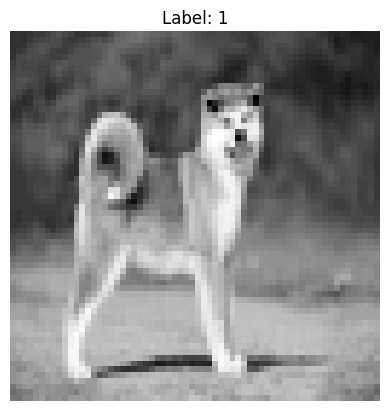

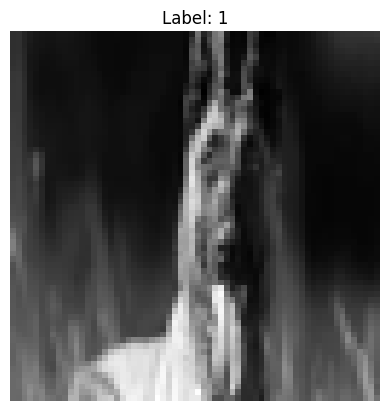

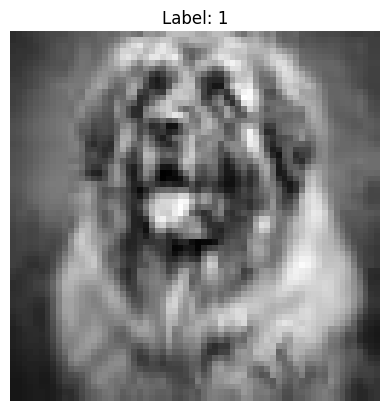

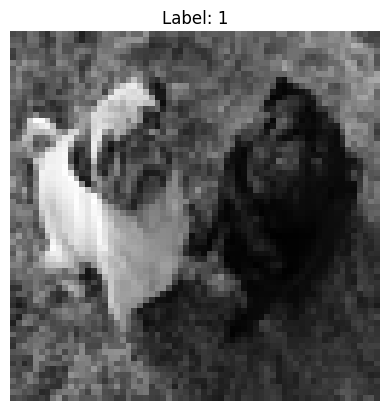

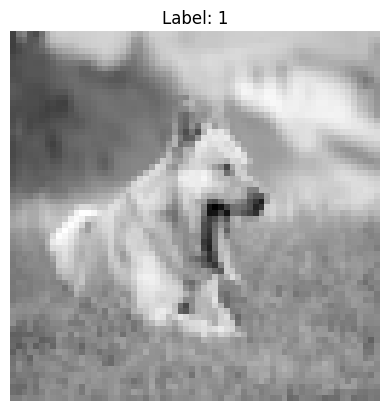

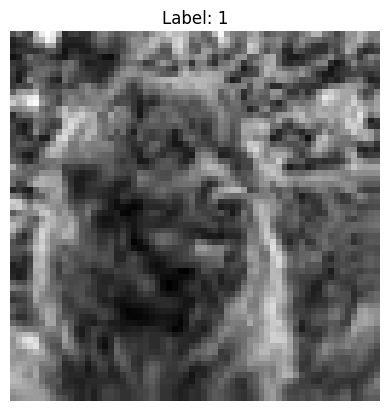

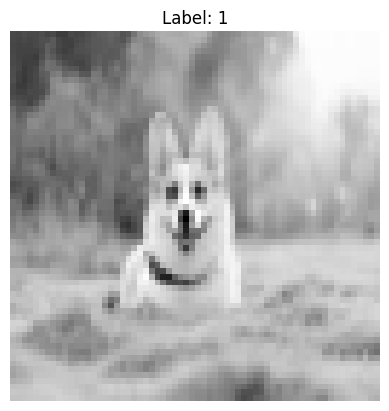

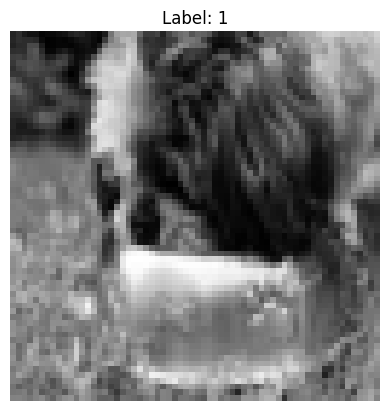

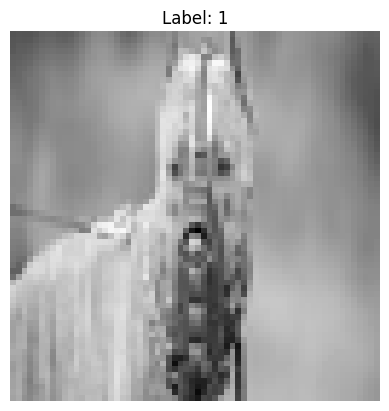

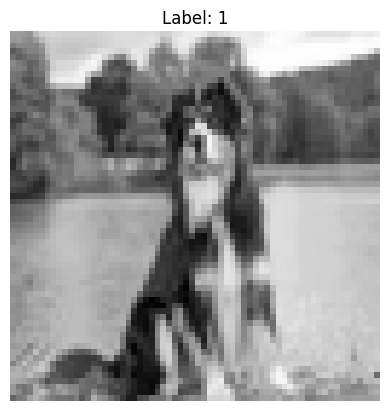

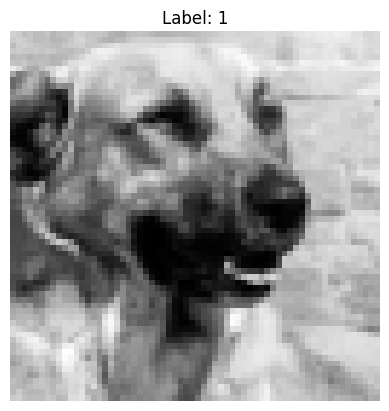

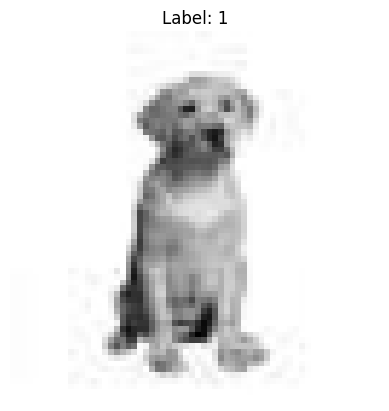

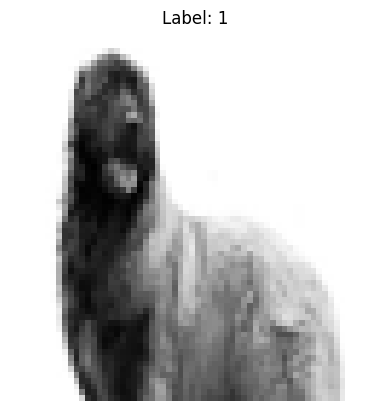

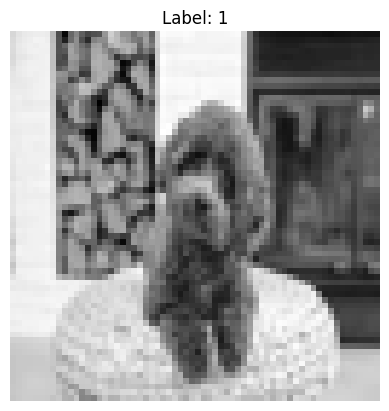

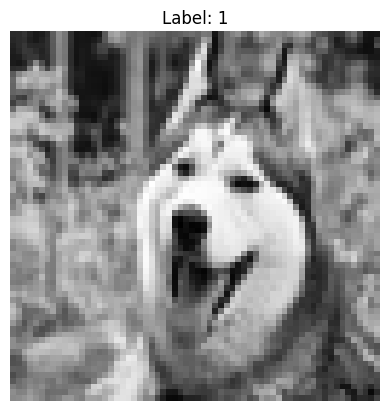

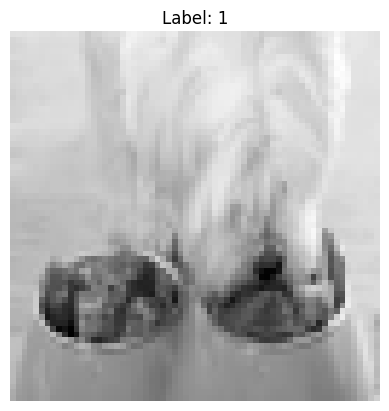

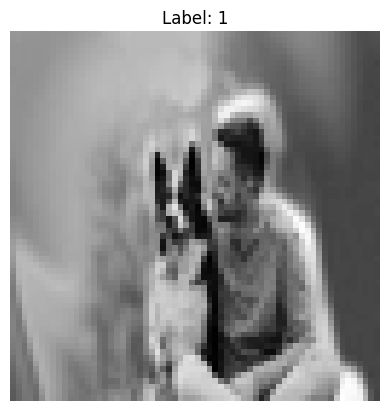

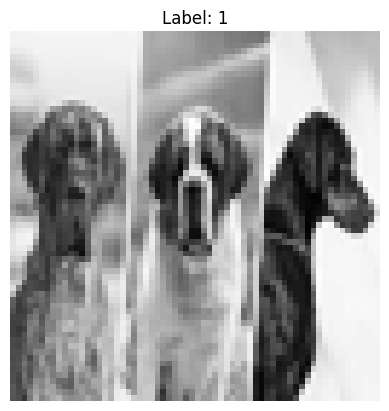

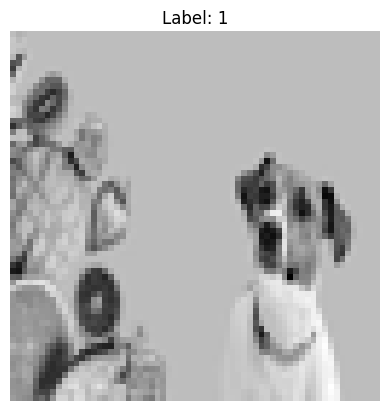

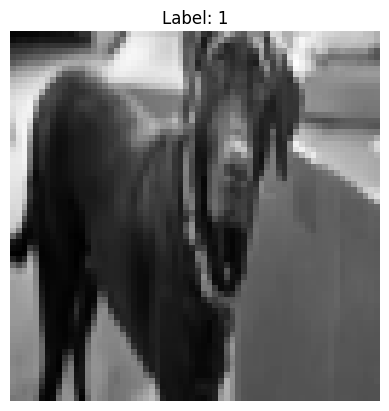

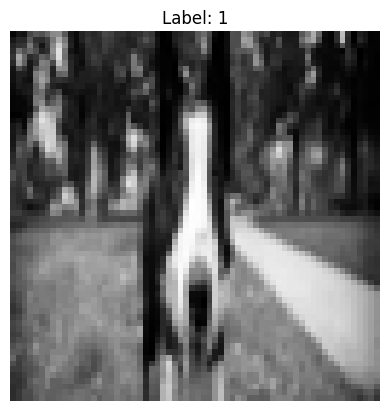

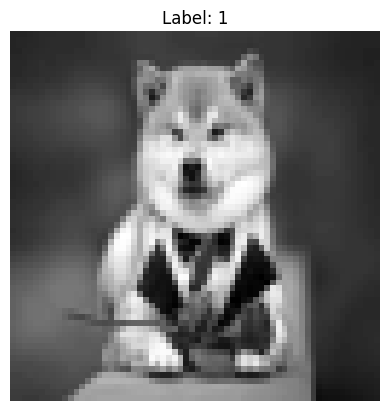

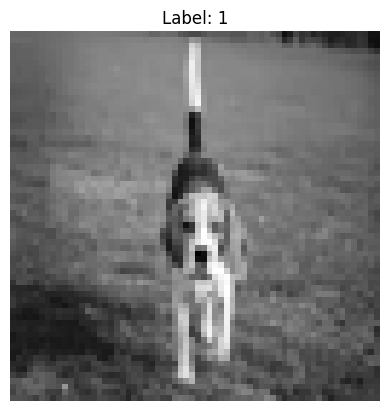

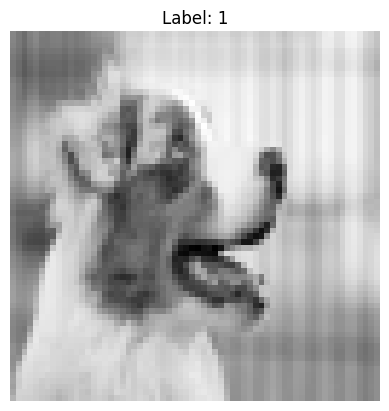

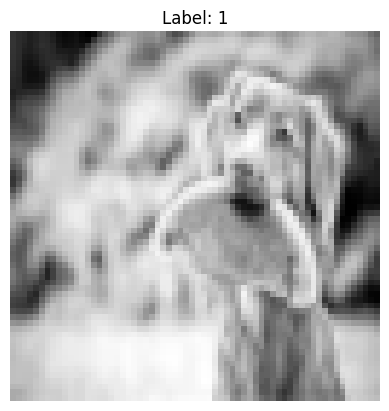

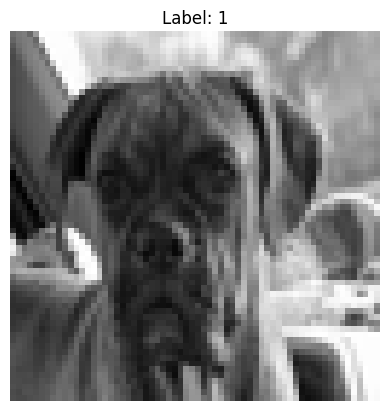

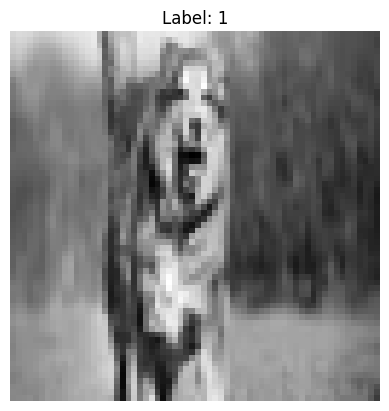

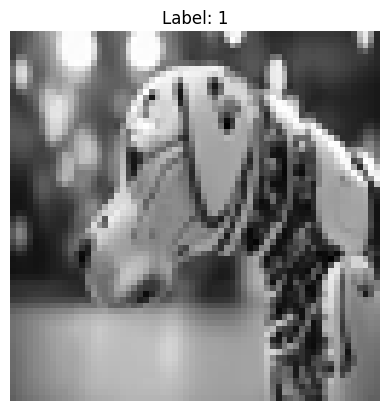

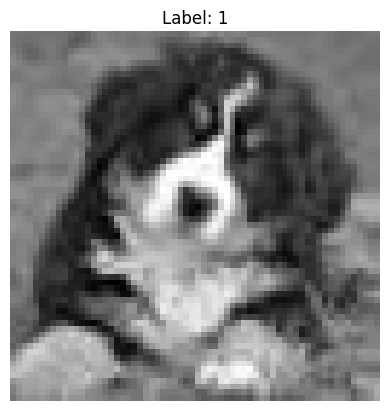

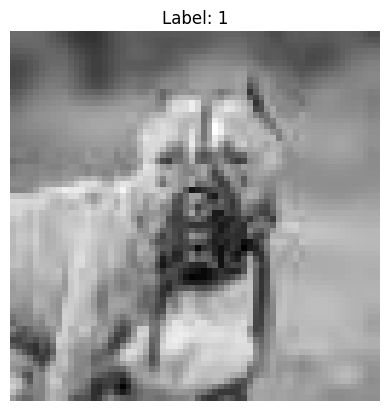

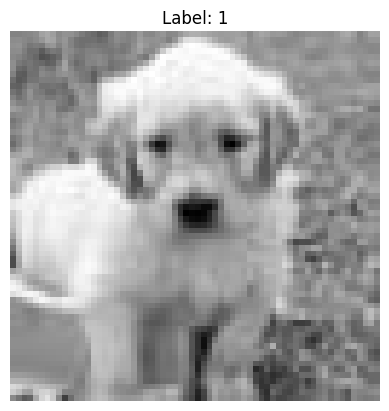

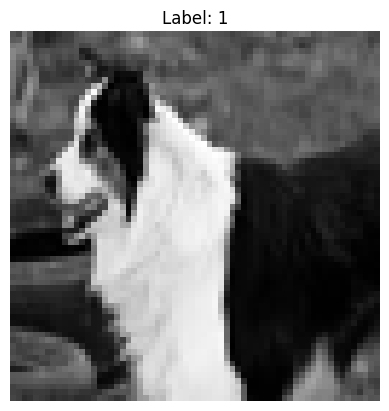

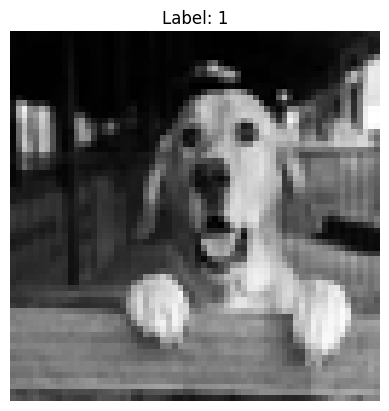

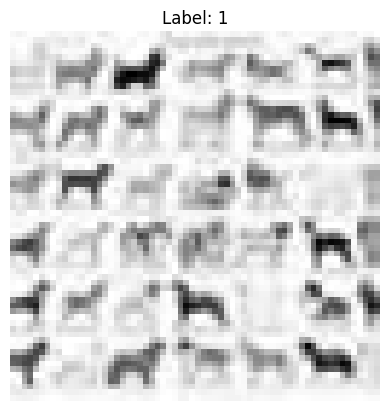

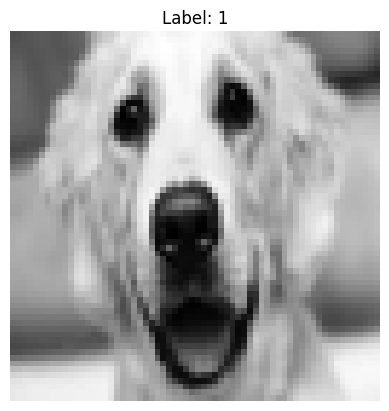

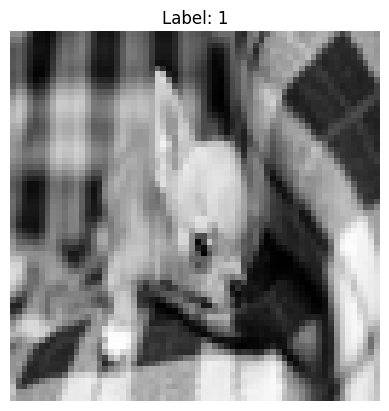

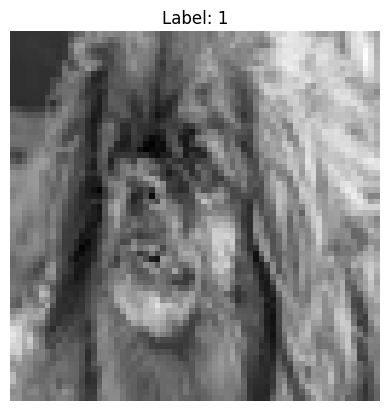

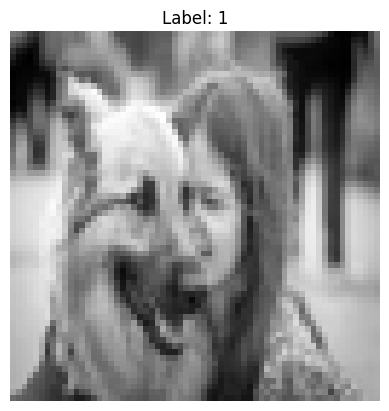

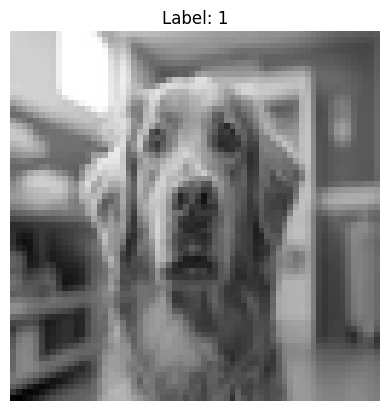

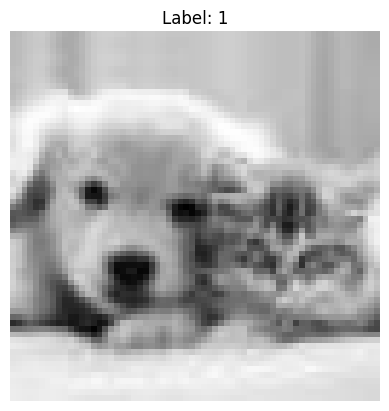

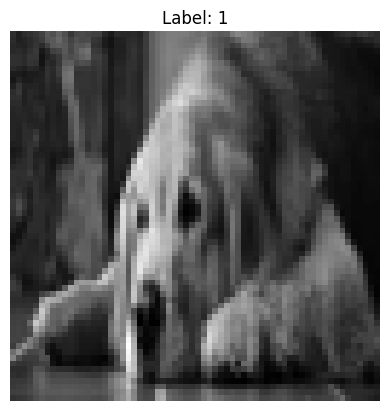

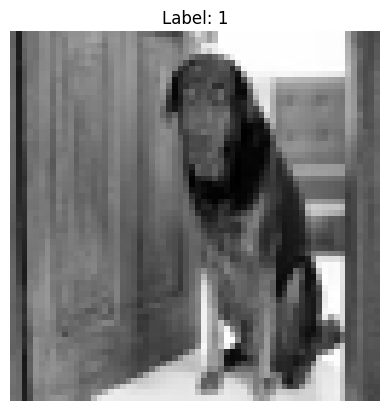

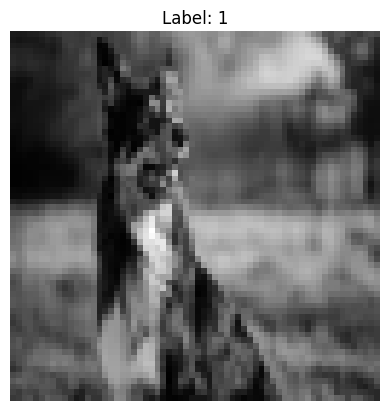

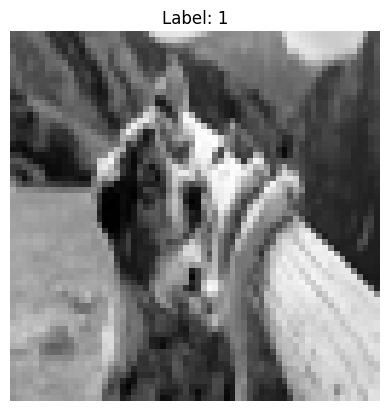

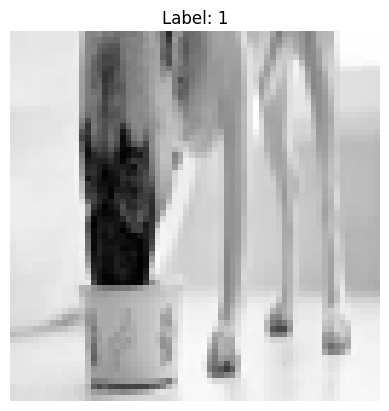

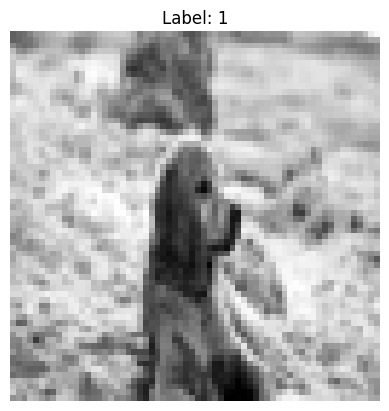

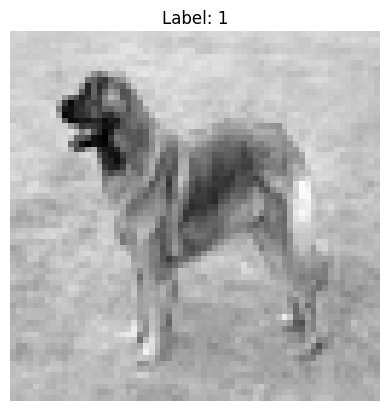

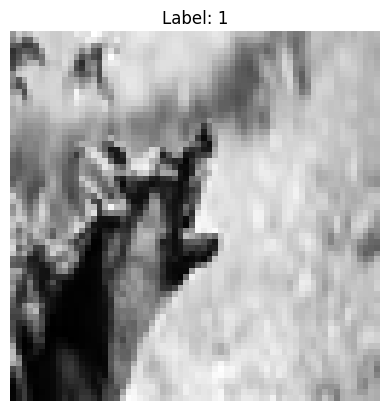

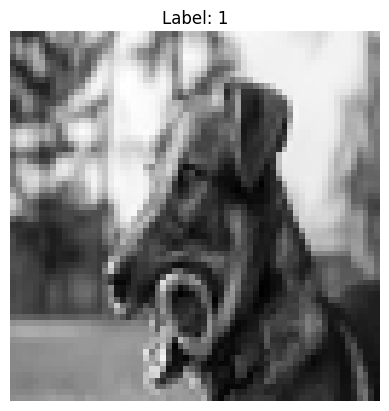

In [10]:
import h5py
import matplotlib.pyplot as plt

# Chemin du fichier HDF5
fichier_hdf5 = "trainset.hdf5"

# Charger le fichier HDF5
with h5py.File(fichier_hdf5, "r") as hdf5_file:
    # Charger les datasets
    X_train = hdf5_file["X_train"][:]
    Y_train = hdf5_file["Y_train"][:]

    # Parcourir les images et leurs labels
    for i in range(len(X_train)):
        image = X_train[i]  # Image 64x64
        label = Y_train[i][0]  # Label correspondant

        # Afficher l'image
        plt.imshow(image, cmap="gray")
        plt.title(f"Label: {label}")
        plt.axis("off")
        plt.show()


In [11]:
import shutil
import os

destination_path_train = "C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets"

if os.path.exists("C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets\\trainset.hdf5"):
    os.remove("C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets\\trainset.hdf5")
if os.path.exists("C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets\\testset.hdf5"):
    os.remove("C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets\\testset.hdf5")
# Déplacer les fichiers en utilisant des doubles barres obliques inverses
shutil.move("trainset.hdf5", "C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets")
shutil.move("testset.hdf5", "C:\\Users\\enzom\\Downloads\\Deep-Learning-Youtube-main\\datasets")

print(f"Les fichiers ont été déplacés vers le dossier datasets")



Les fichiers ont été déplacés vers le dossier datasets
